In [1]:
# end module exam
# suraj ghaytidak

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE

# imported required libraries

In [84]:
df= pd.read_csv('/ExamData.csv')  # loaded data into data frame

In [85]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [86]:
df.columns    # all columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [87]:
df.info()    # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [88]:
df.isnull().sum().sum()   # checked all null values


0

In [89]:
# their is no null values in the data

In [90]:
df.duplicated().sum()  # no duplicate data

0

In [91]:
df.corr()  # checked correlation of columns

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

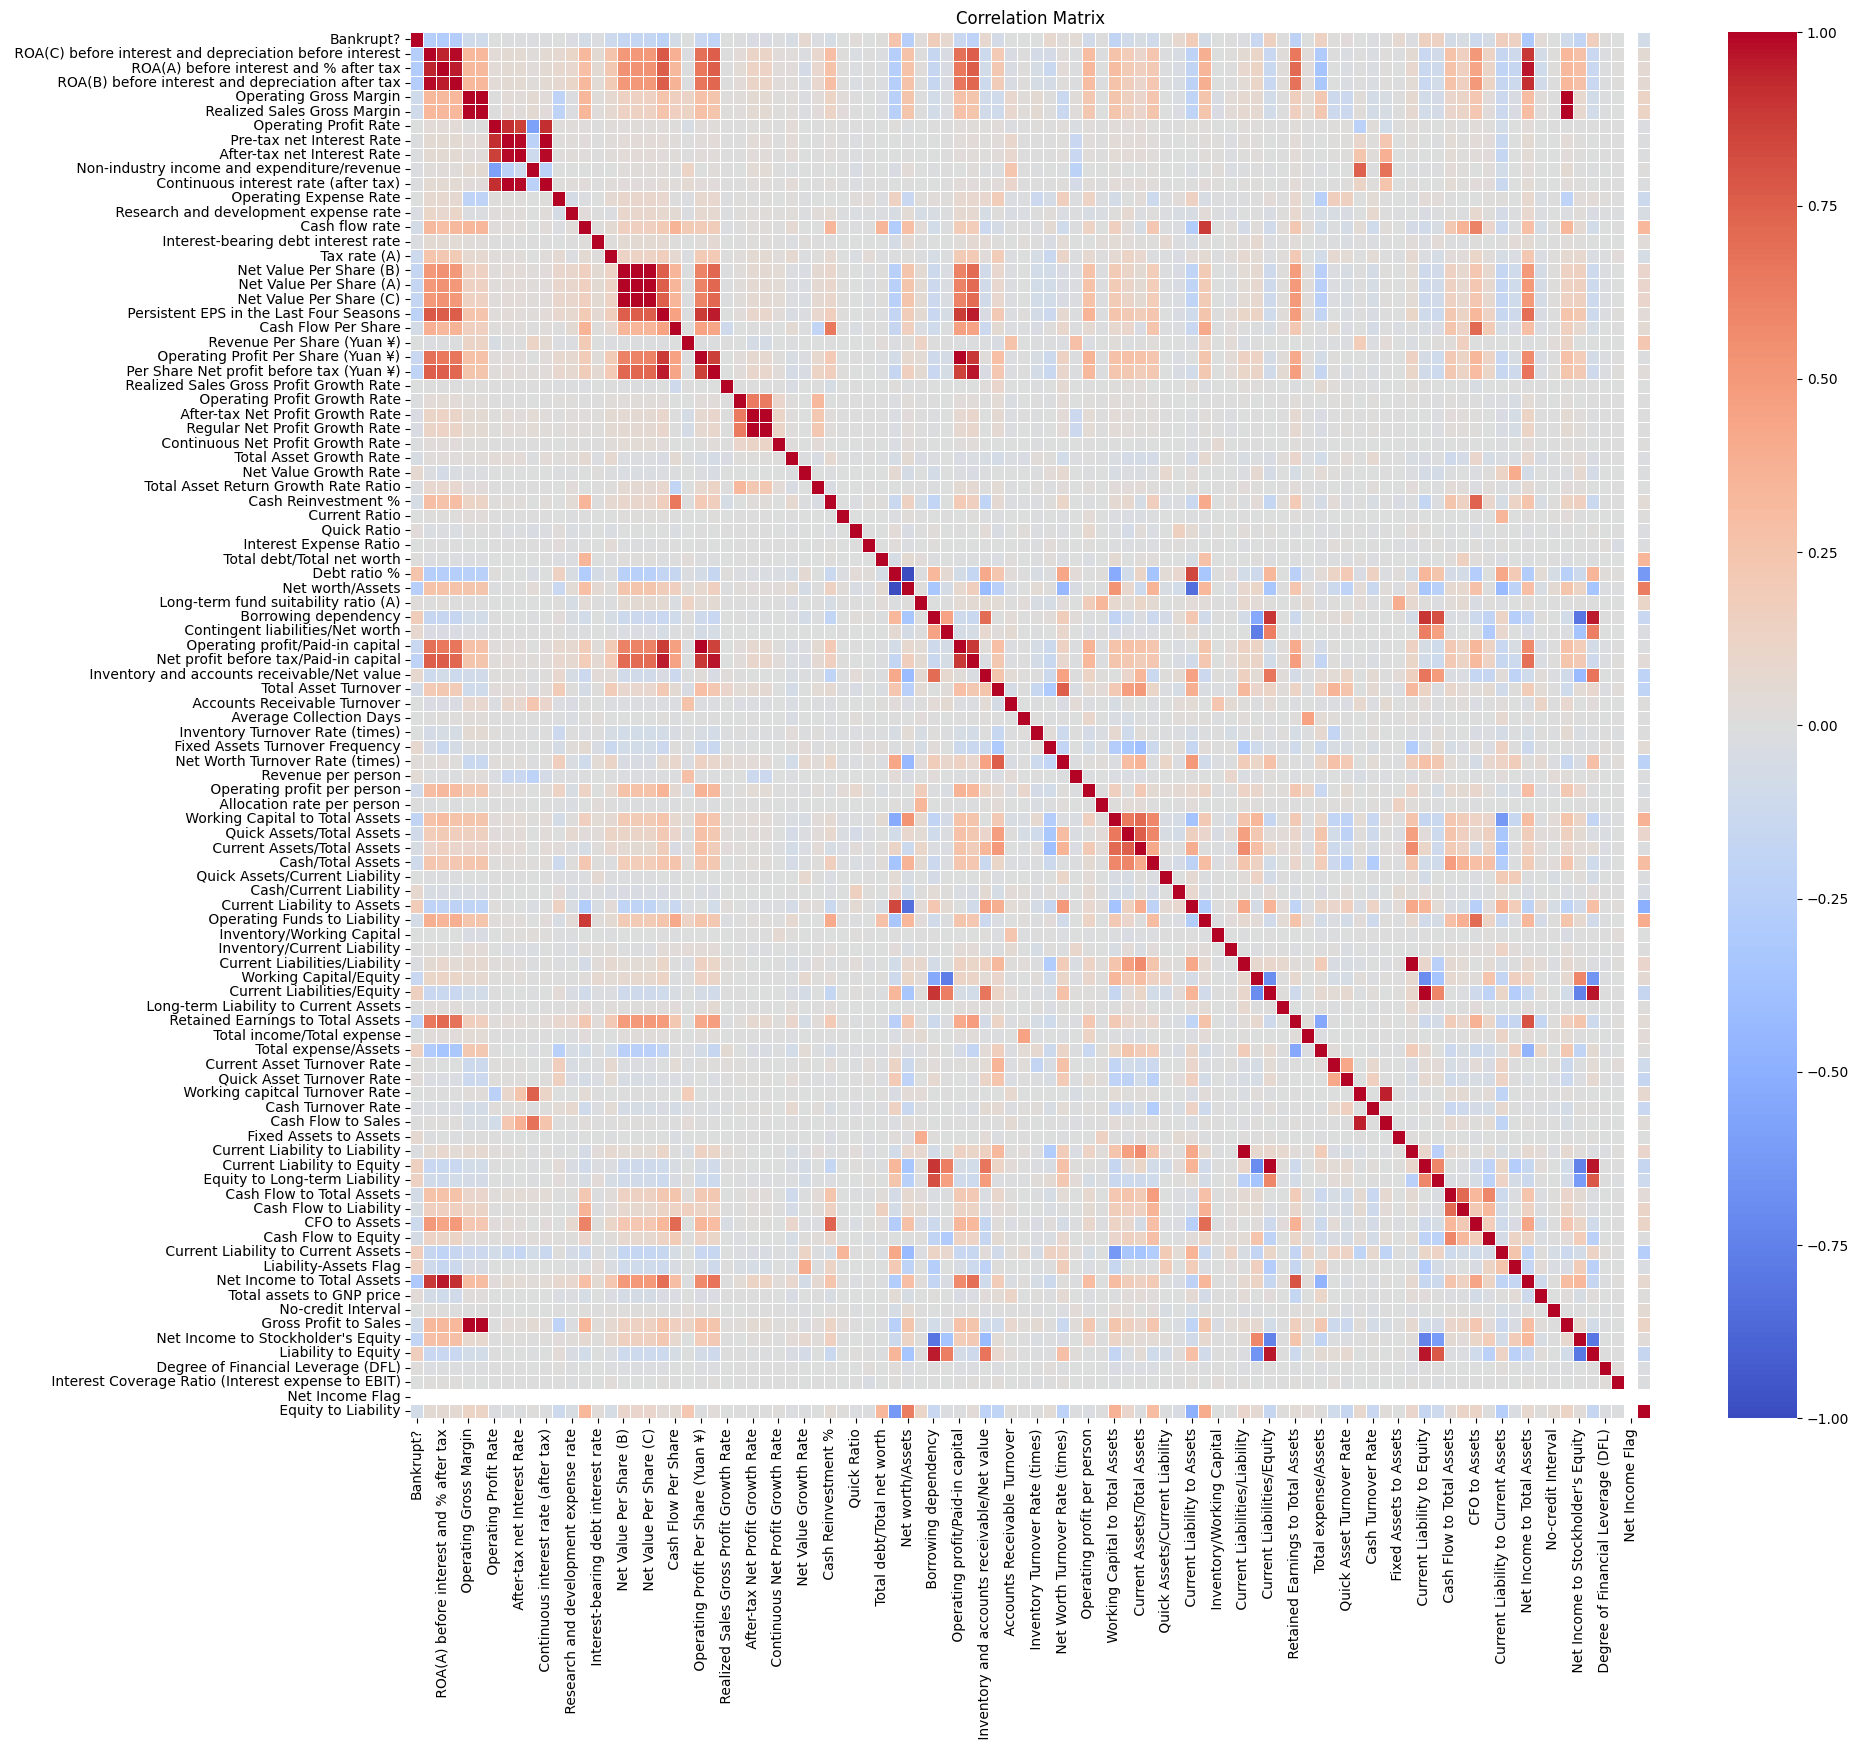

In [92]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# created heatmap to check correlation of features


In [93]:
correlation=df.corr()

In [94]:
correlation

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

In [95]:
new_df=df.drop(['Bankrupt?',' Net Income Flag',' Liability-Assets Flag'],axis=1)   # droped categorical data bcuz we need to to check outliers

In [96]:
columns=new_df.columns

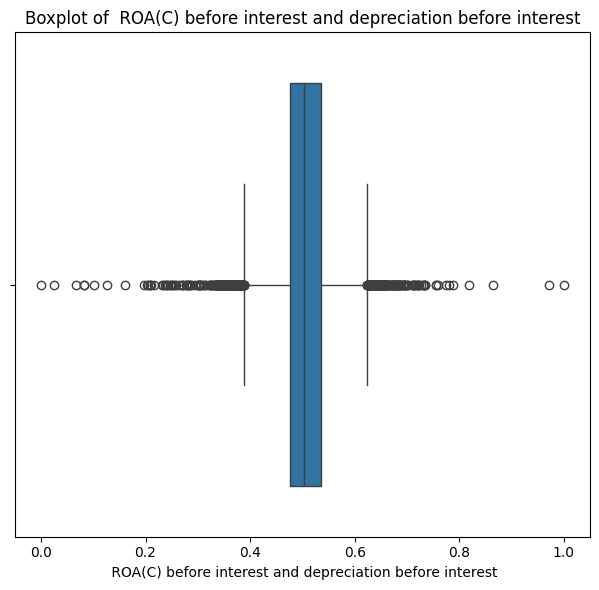

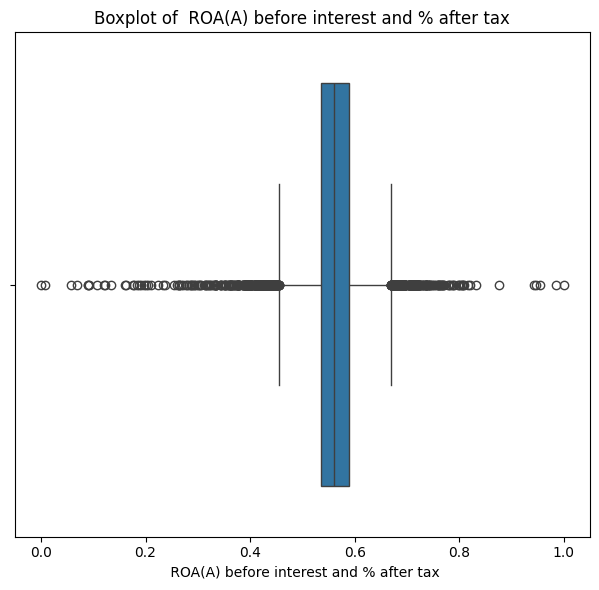

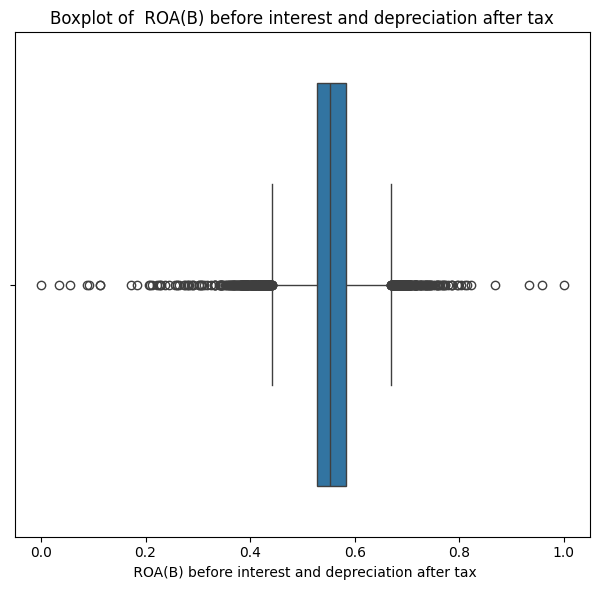

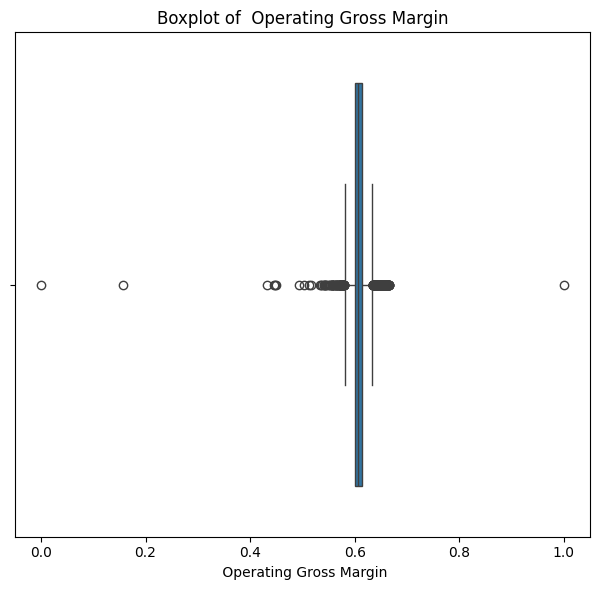

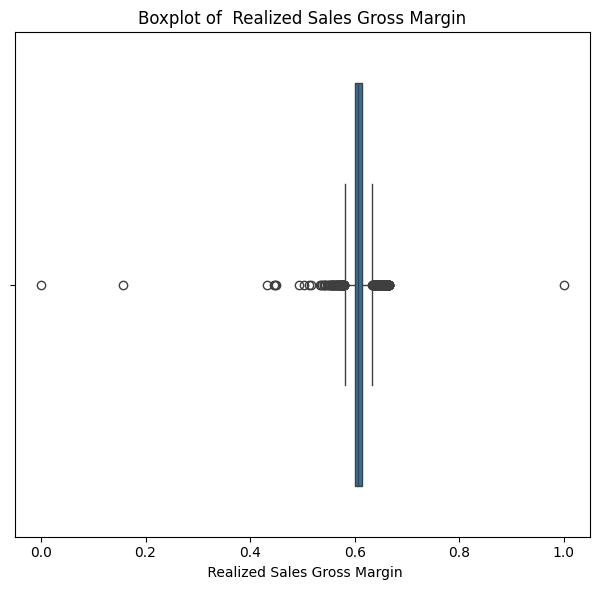

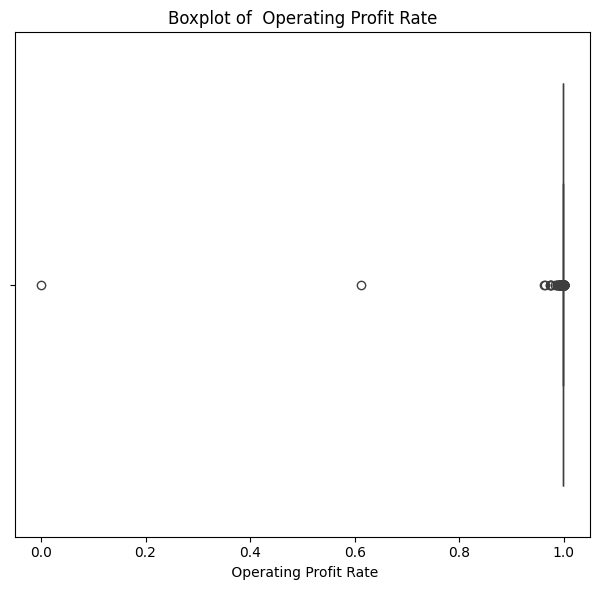

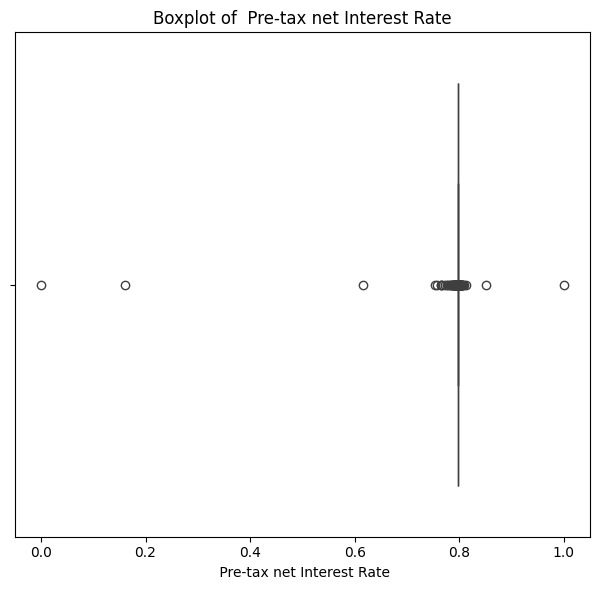

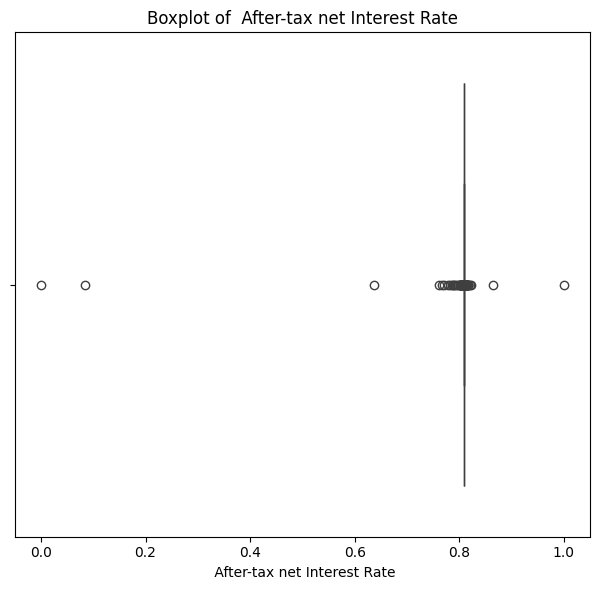

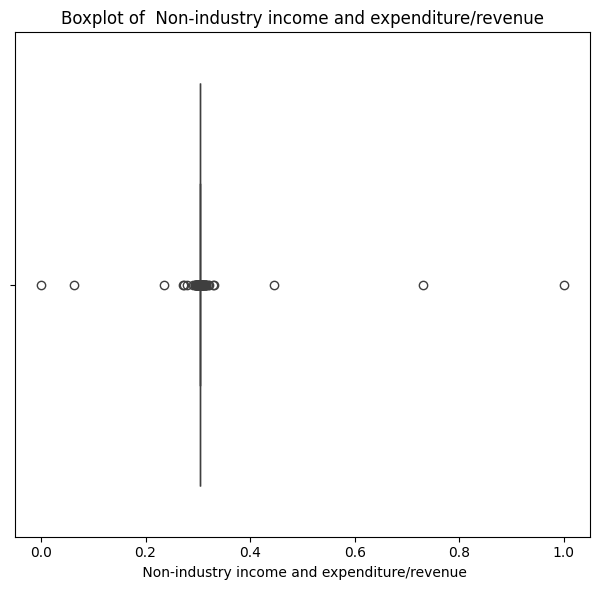

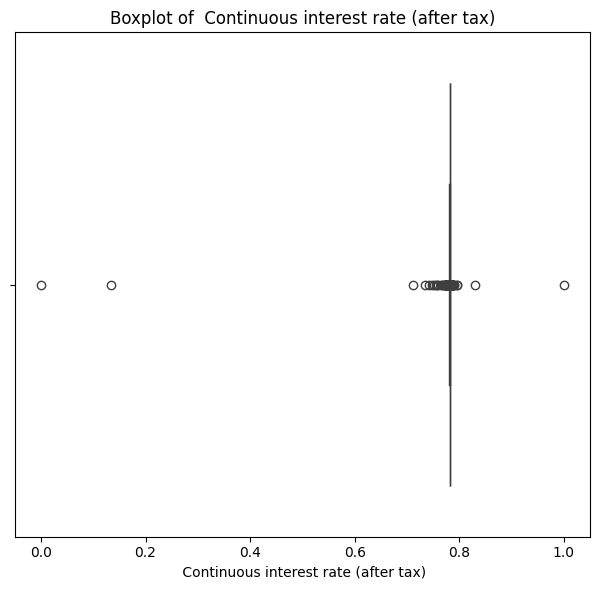

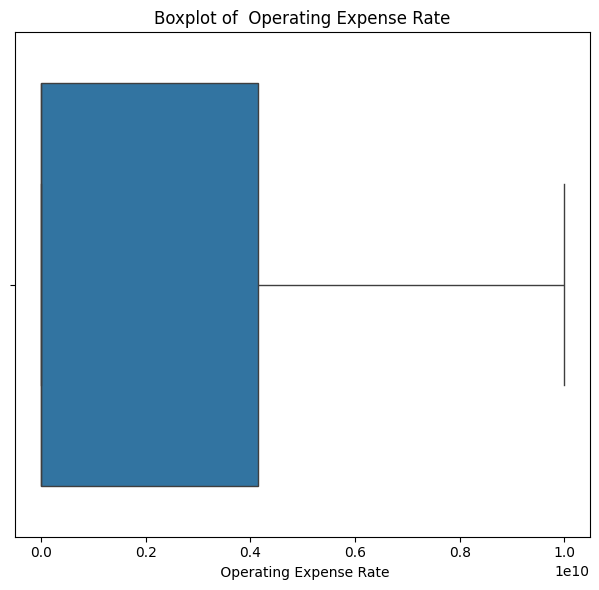

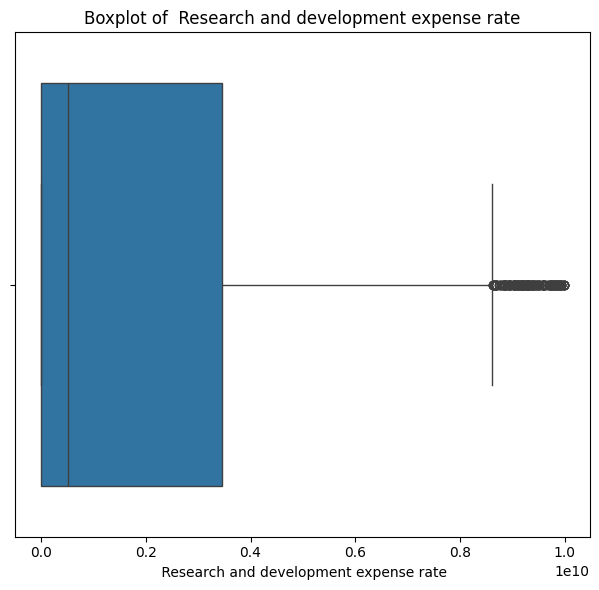

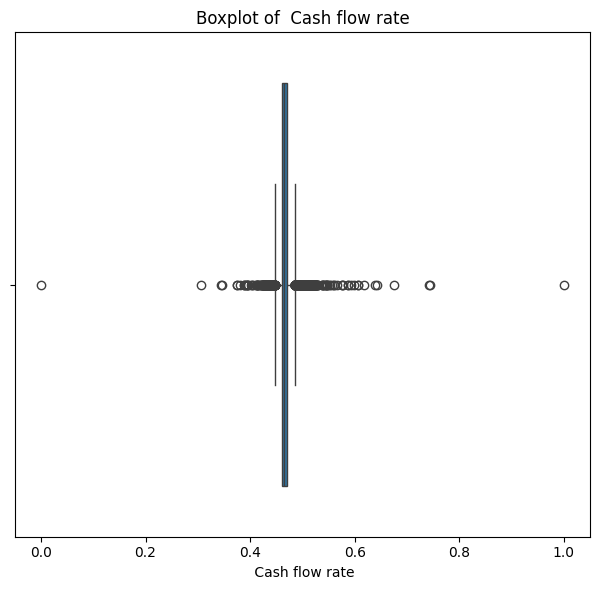

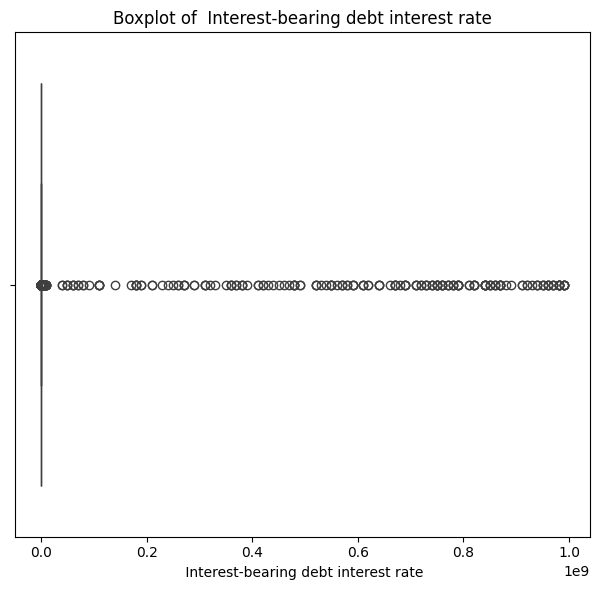

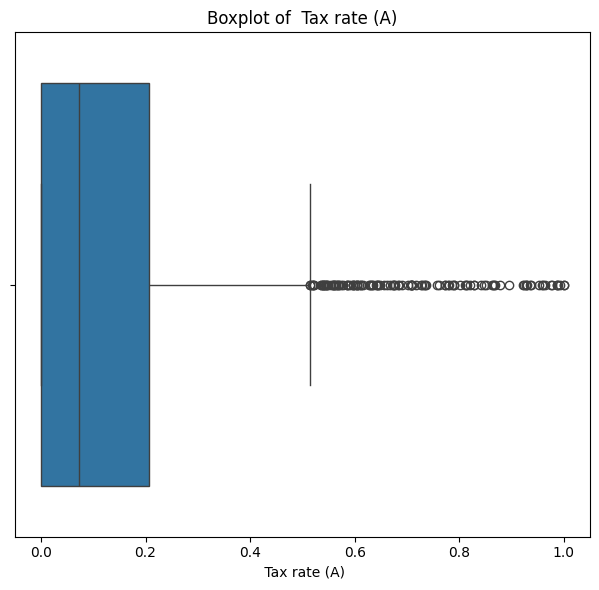

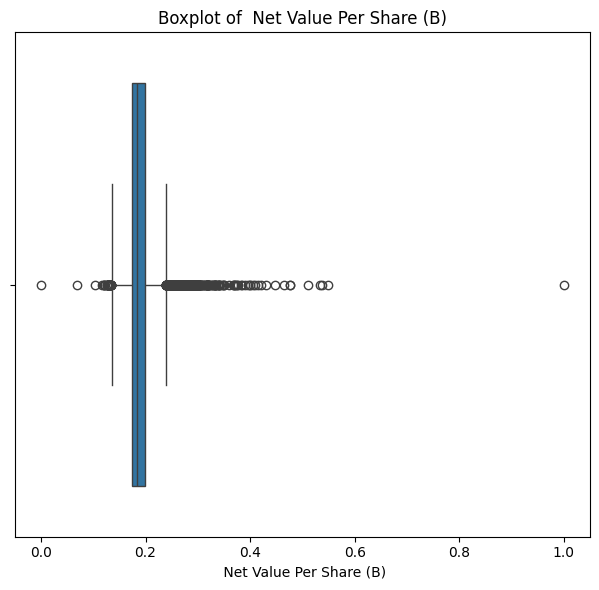

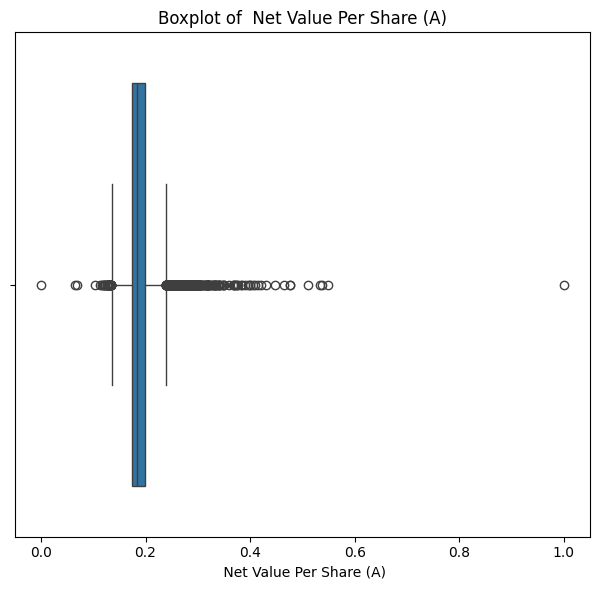

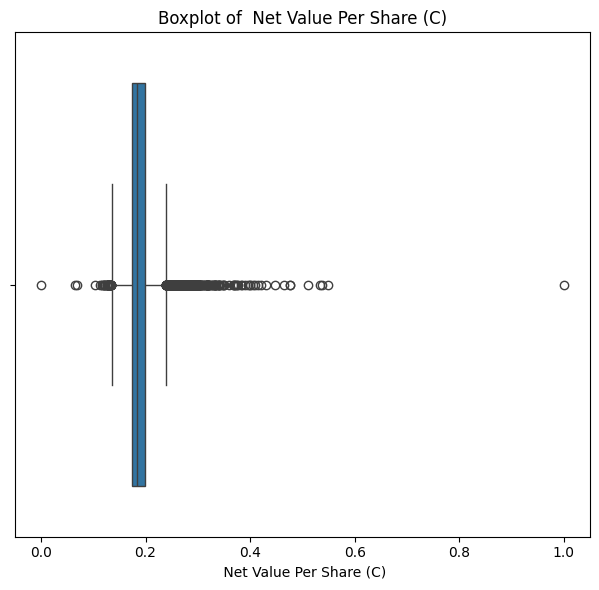

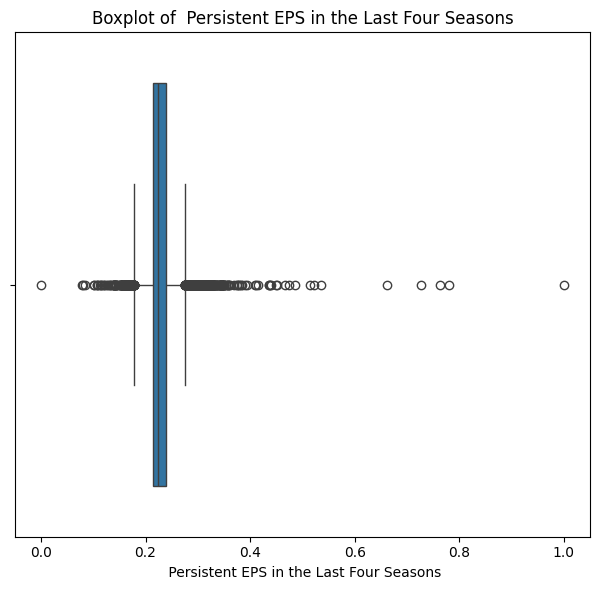

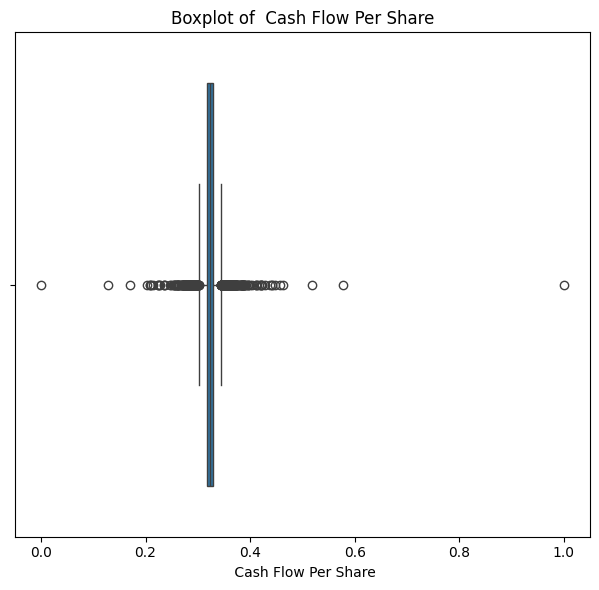

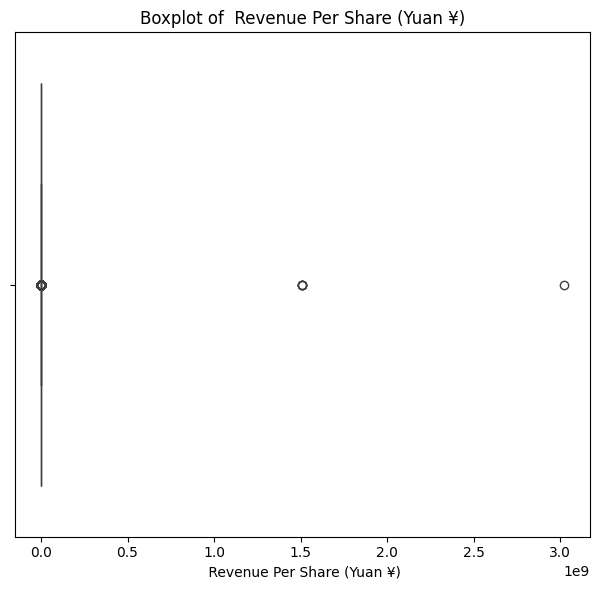

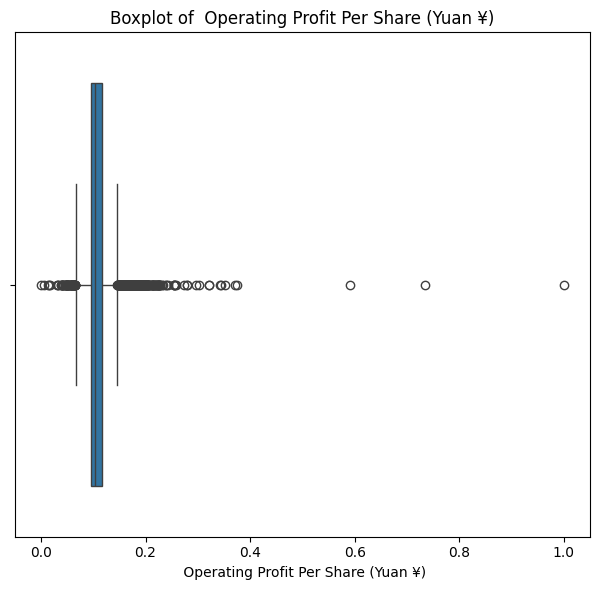

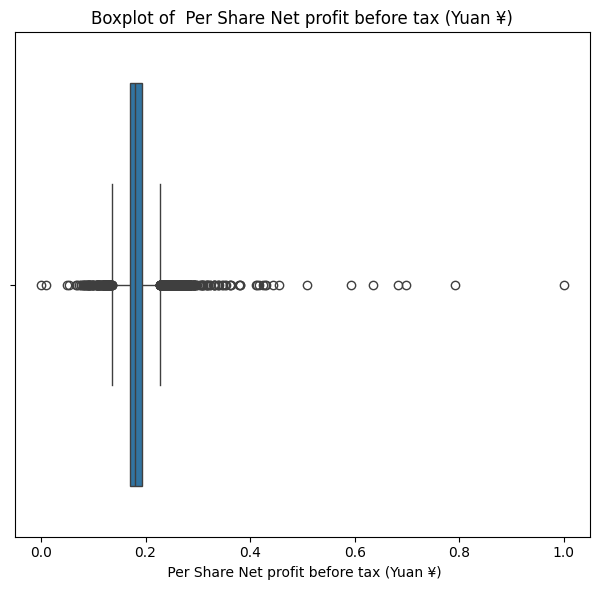

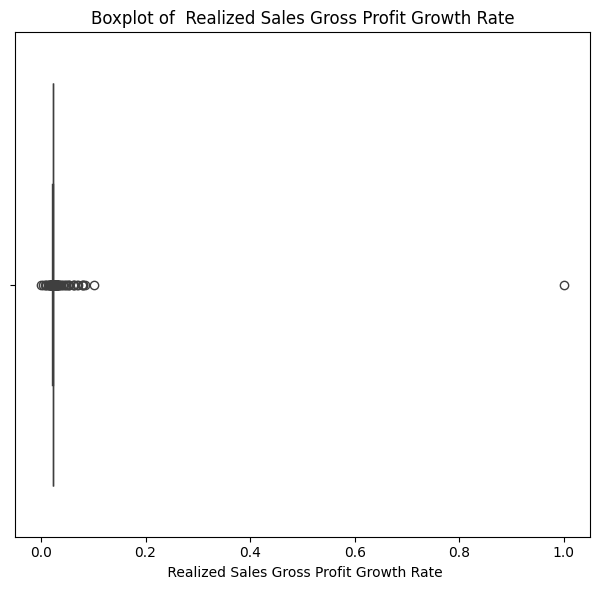

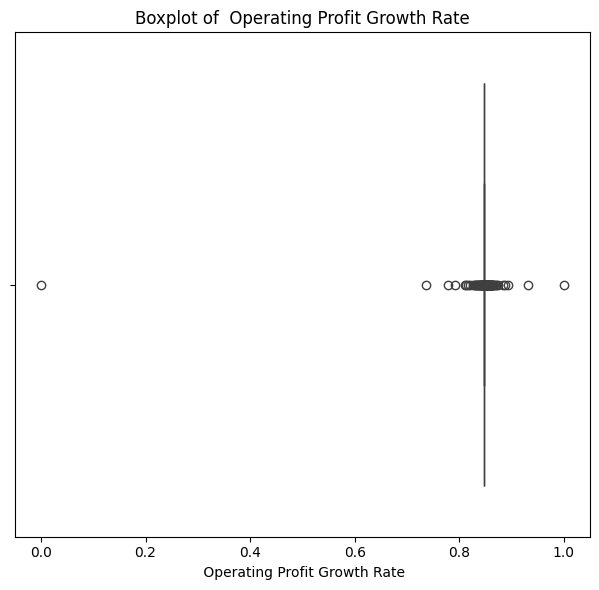

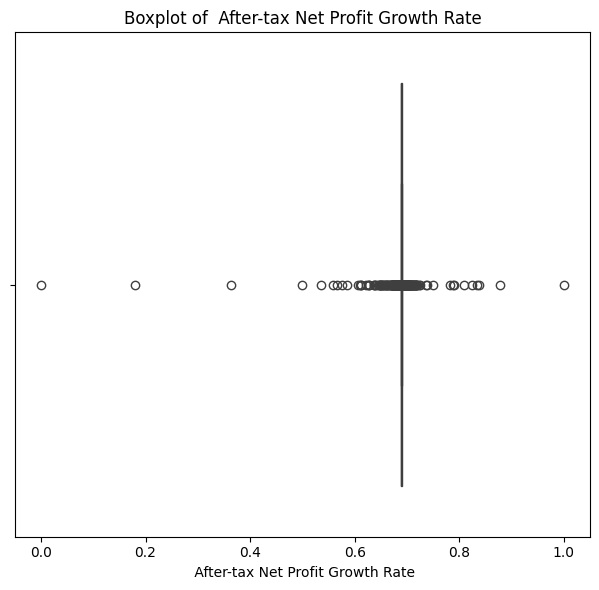

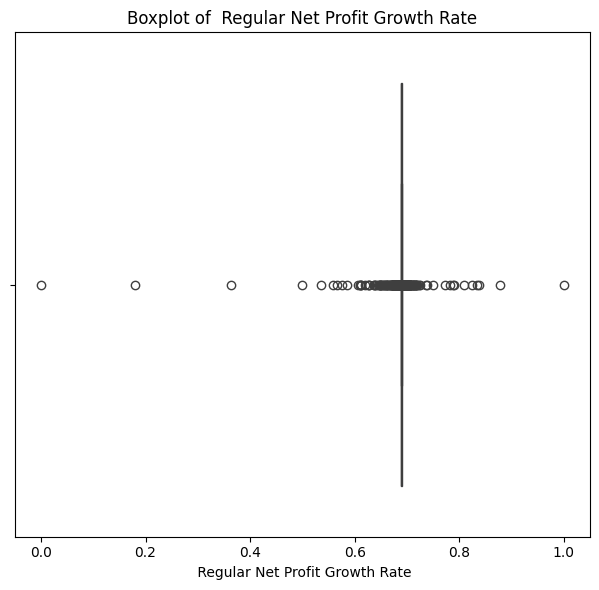

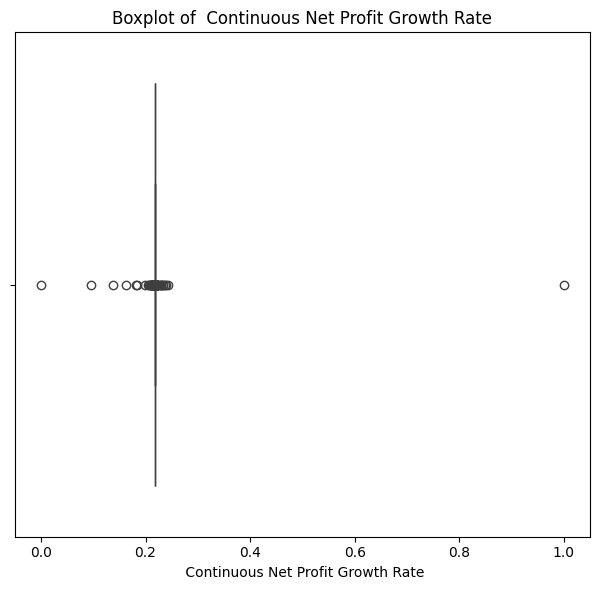

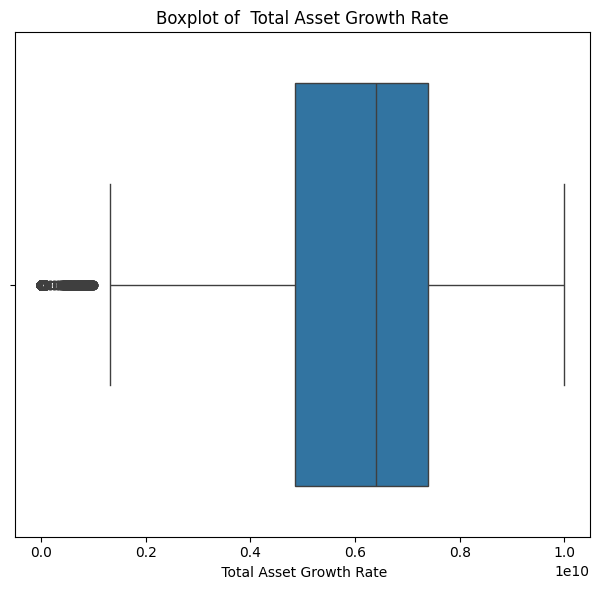

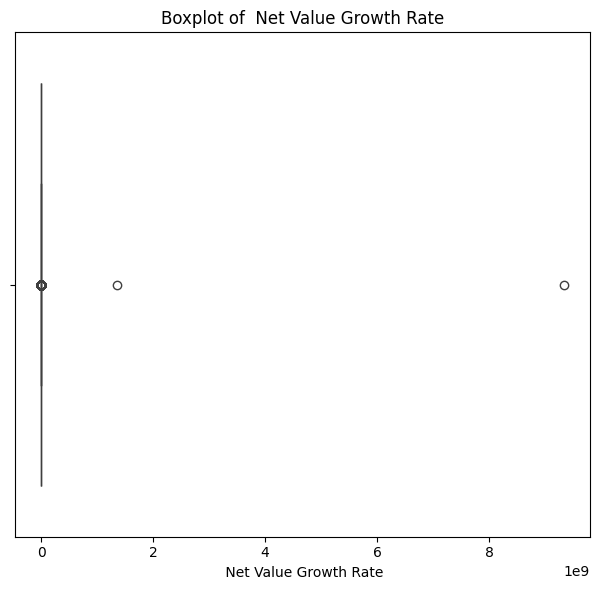

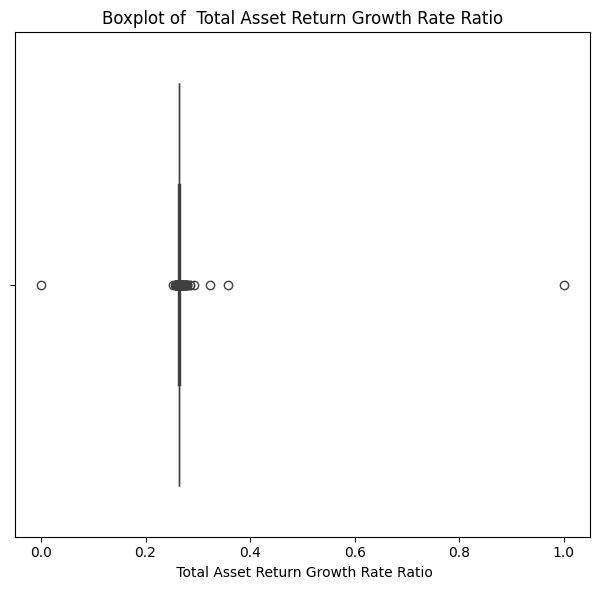

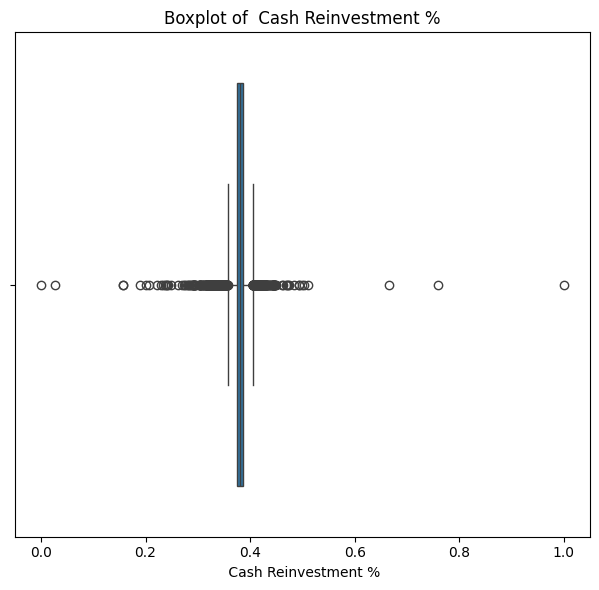

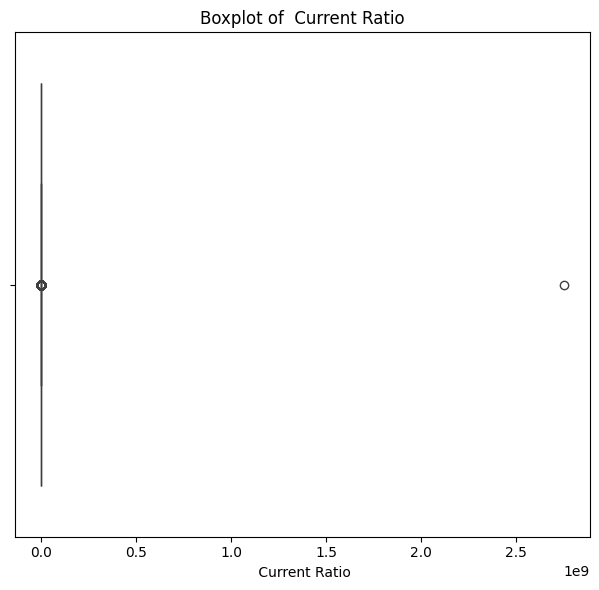

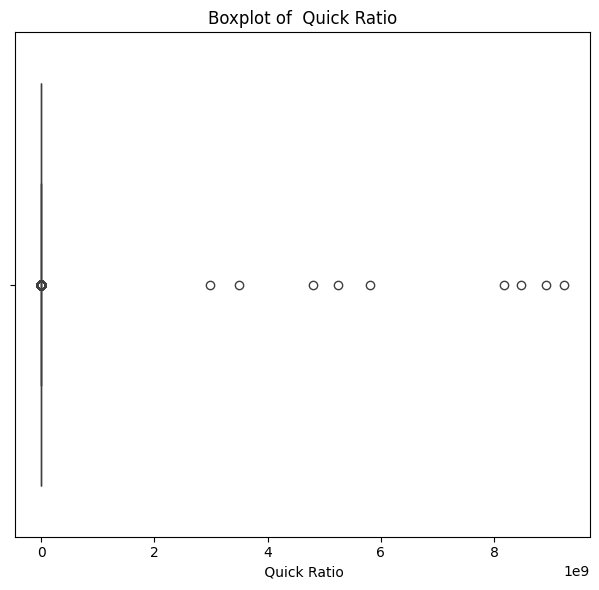

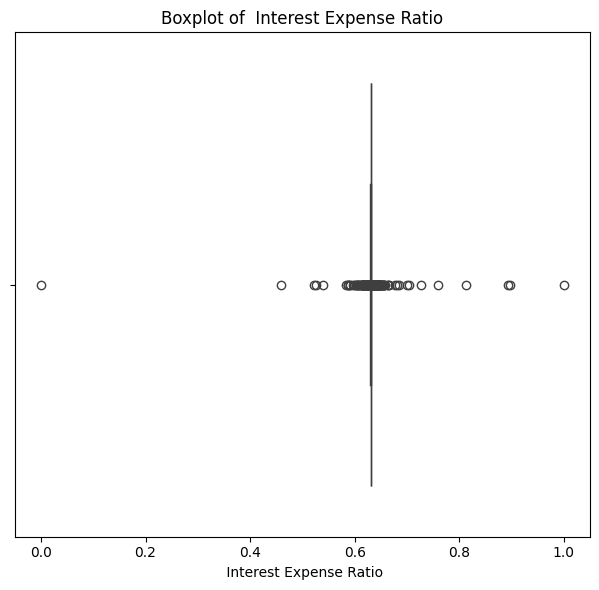

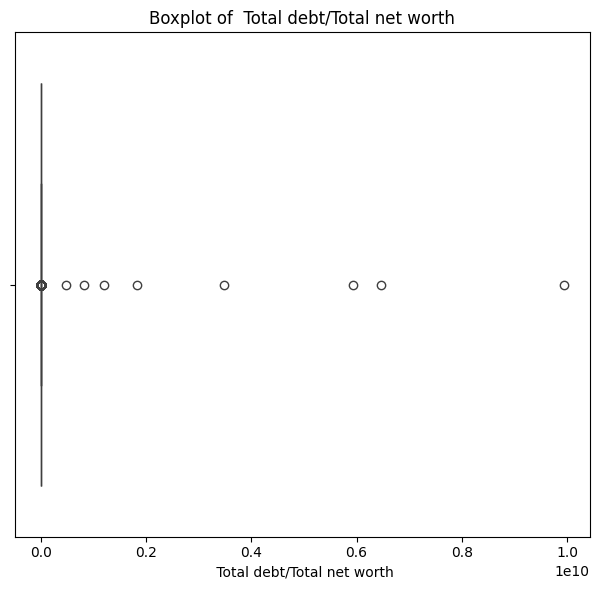

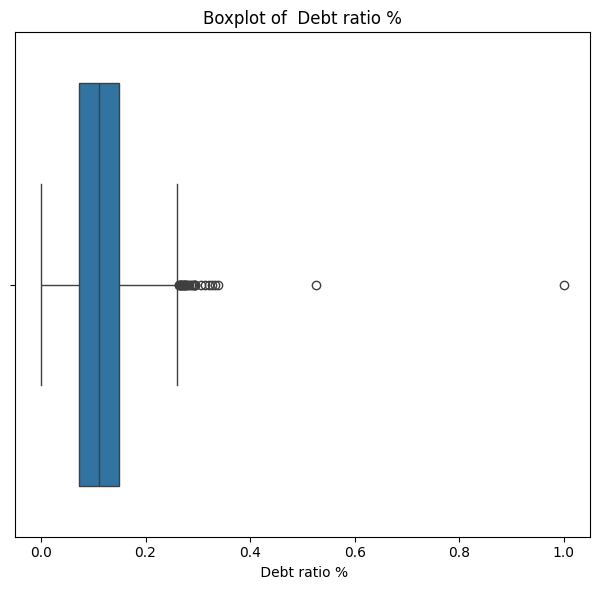

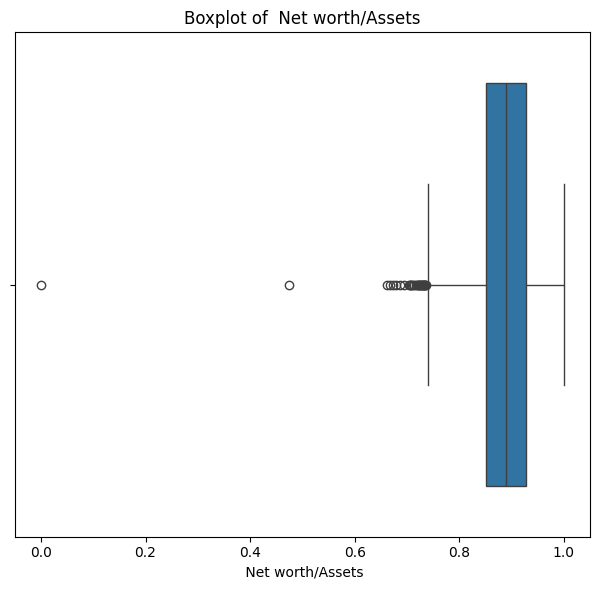

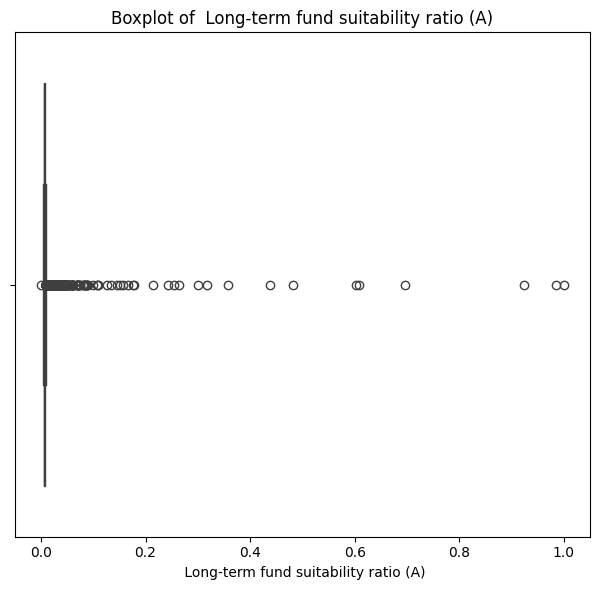

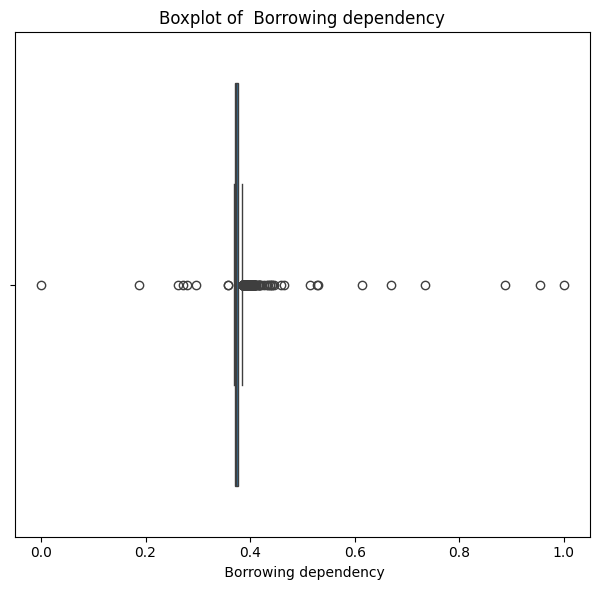

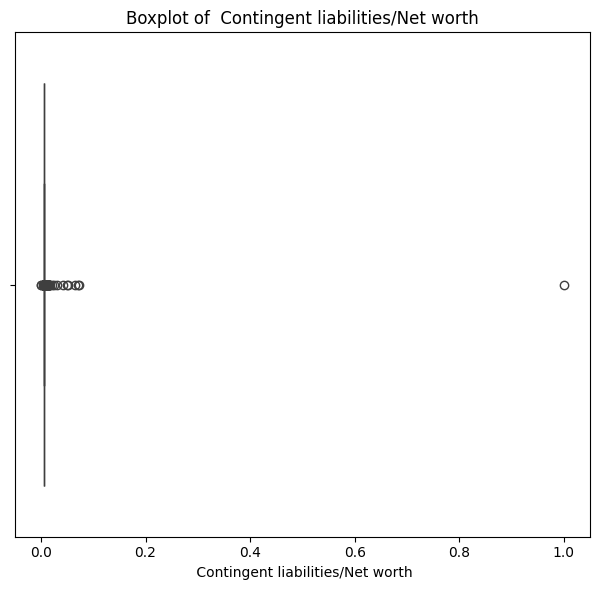

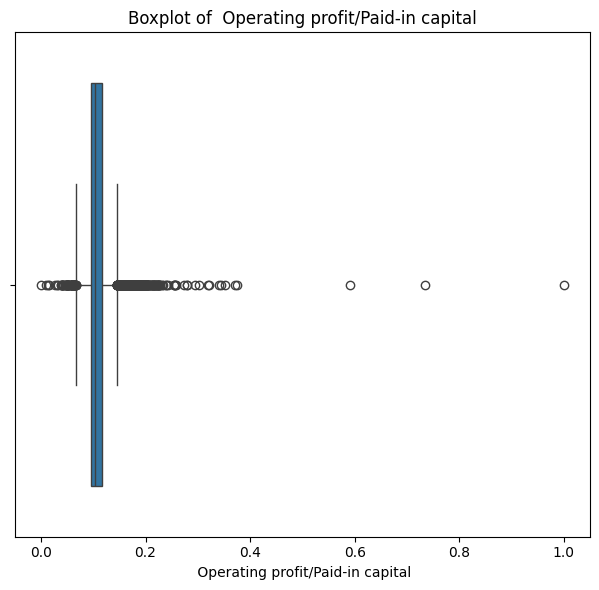

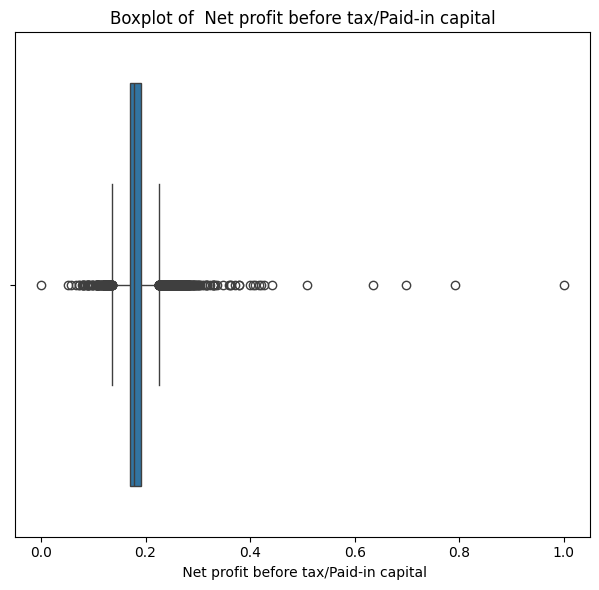

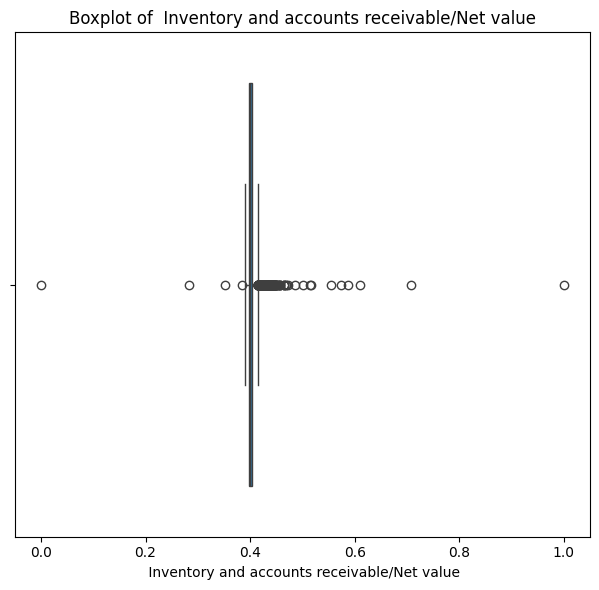

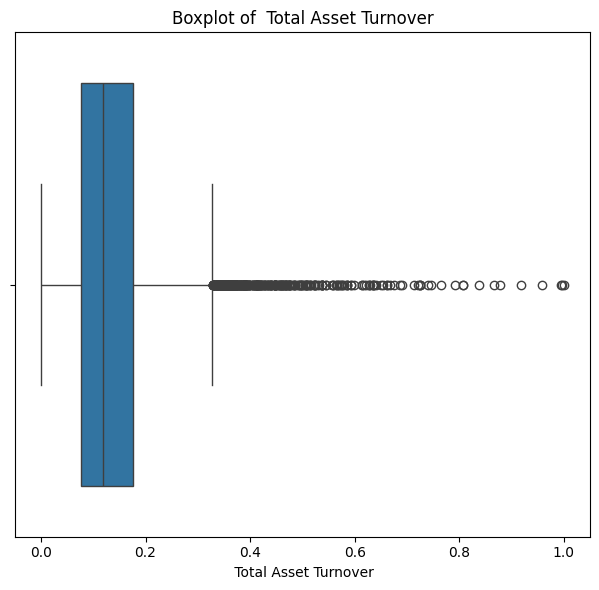

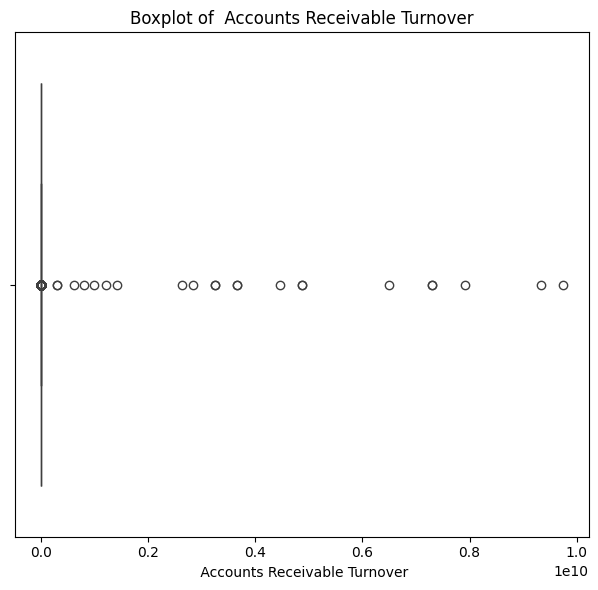

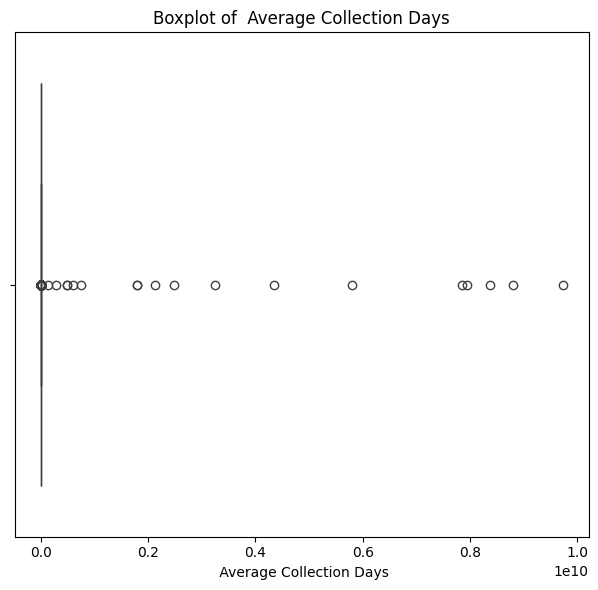

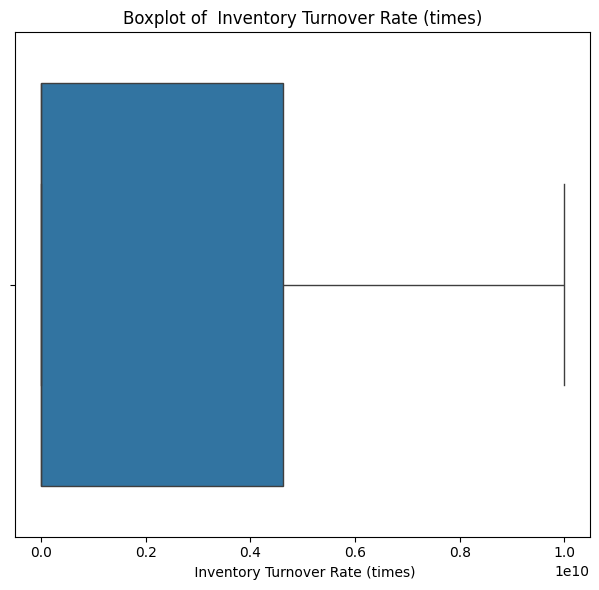

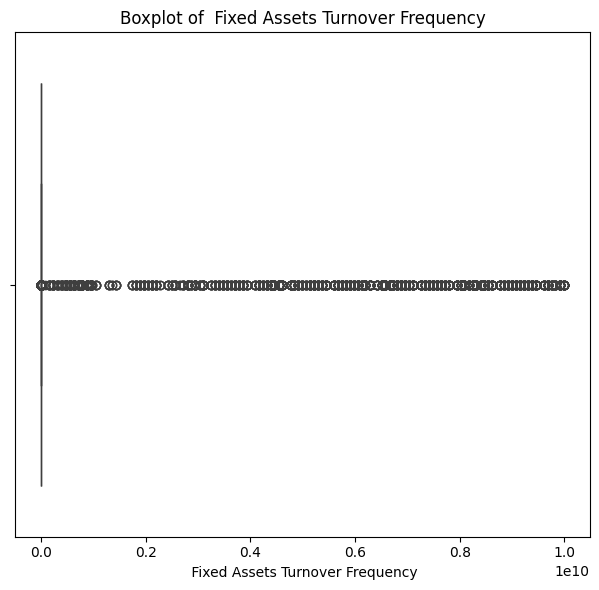

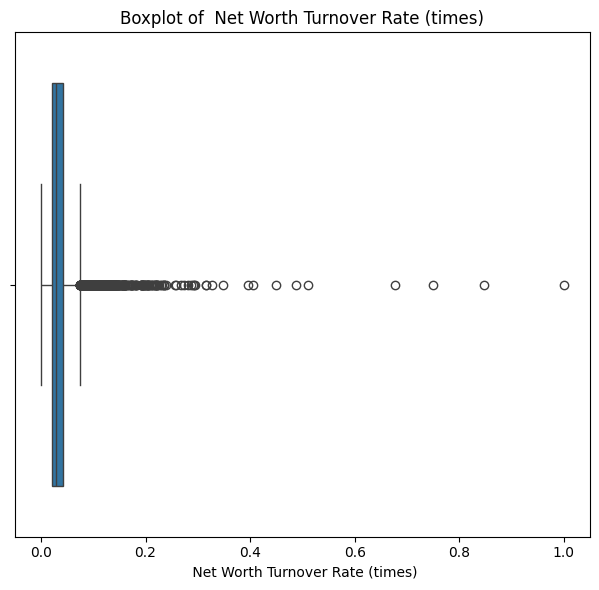

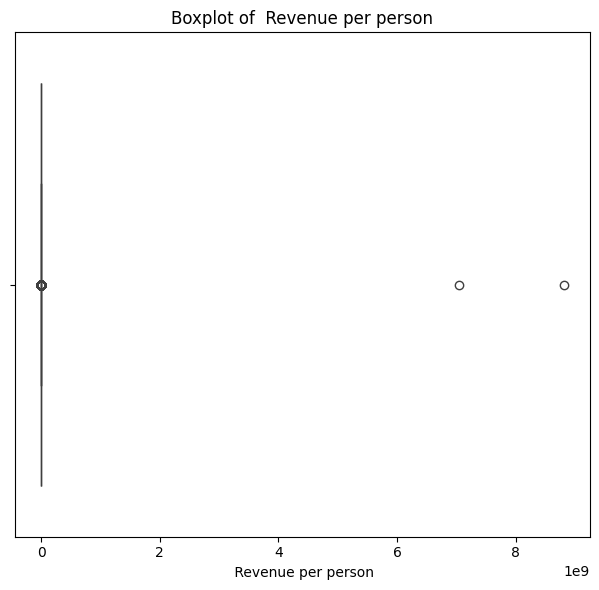

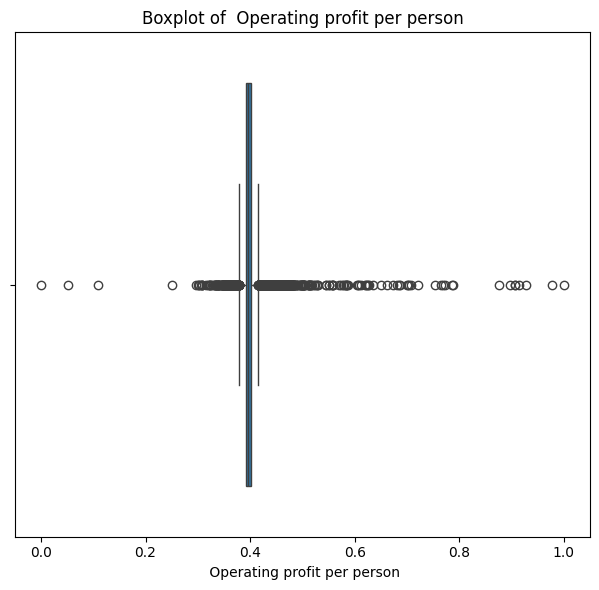

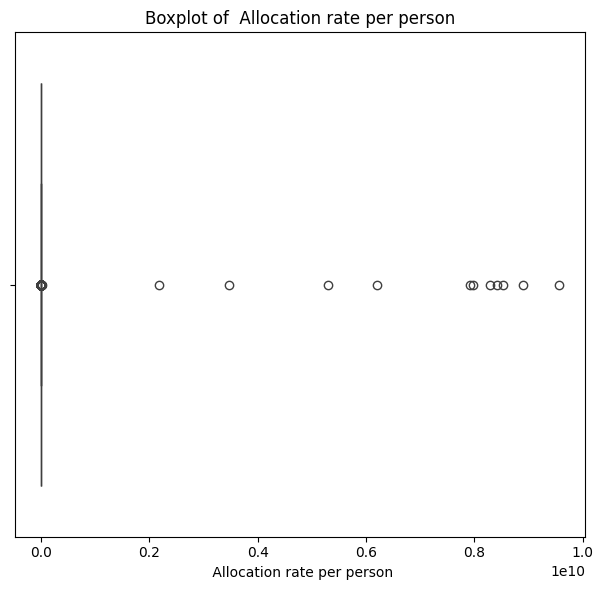

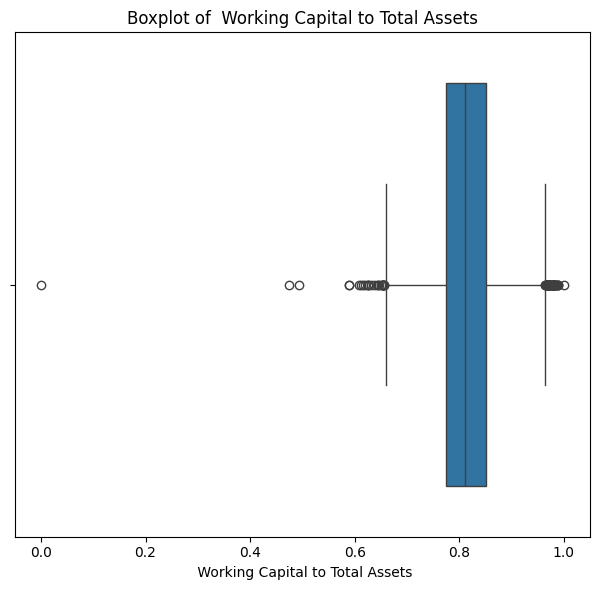

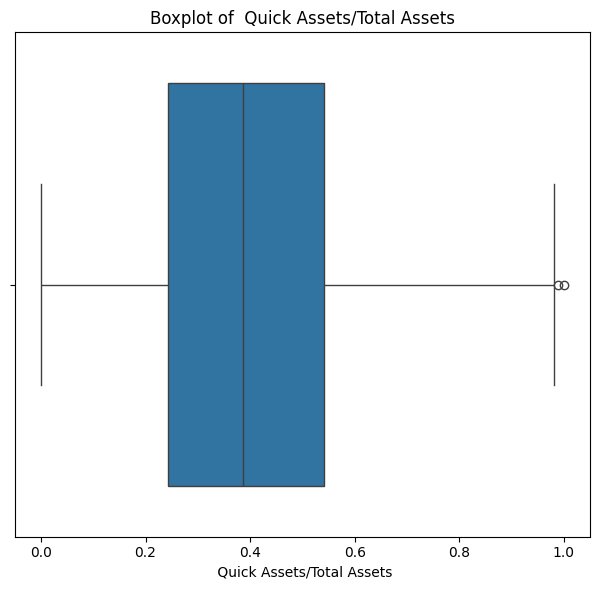

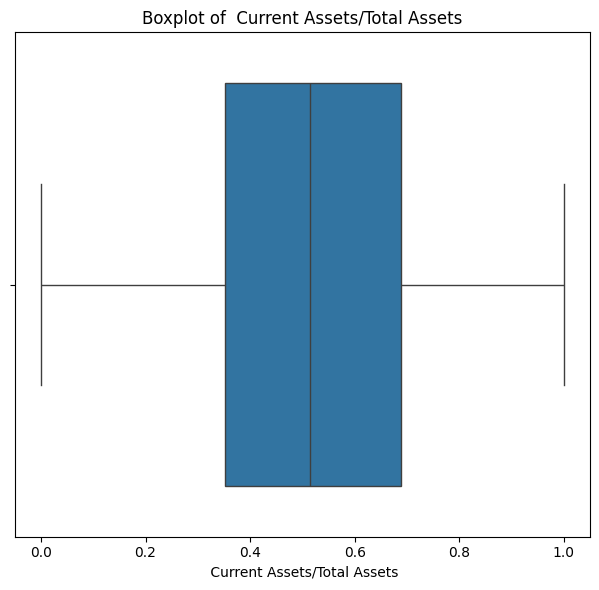

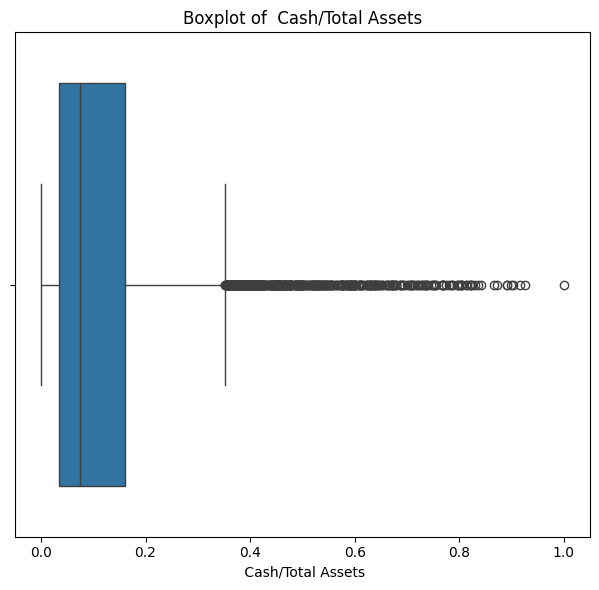

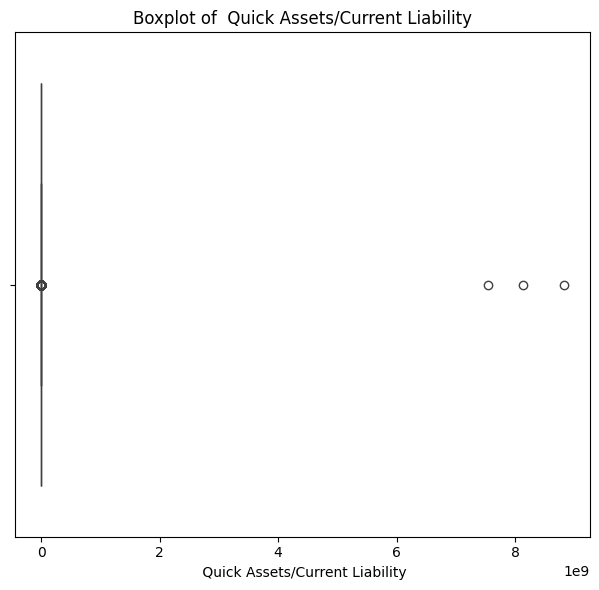

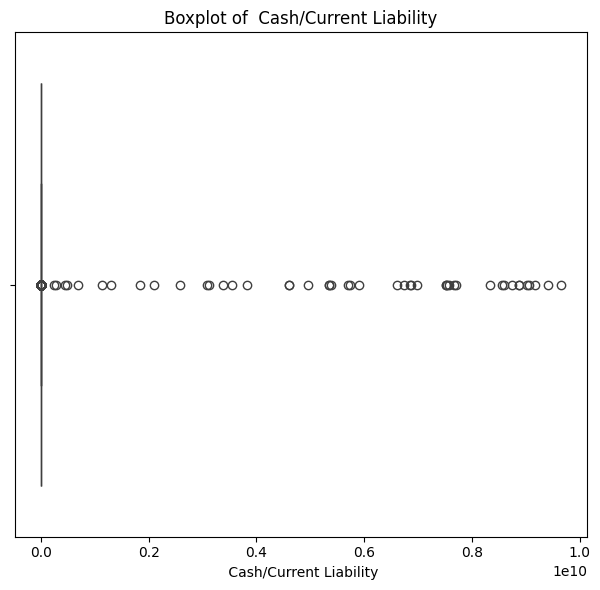

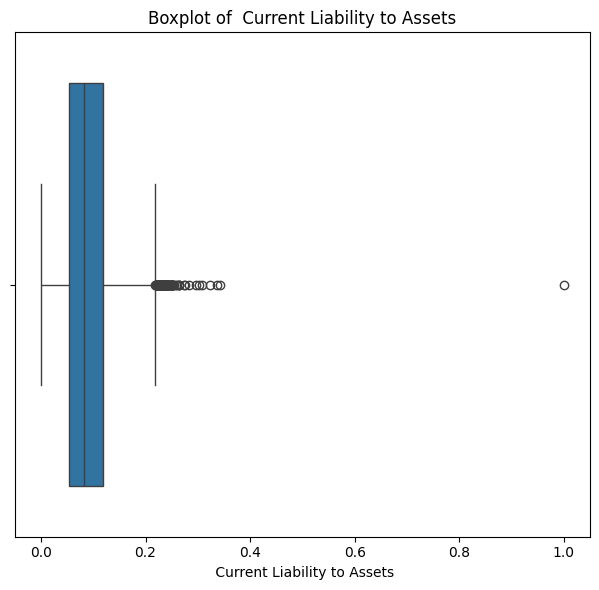

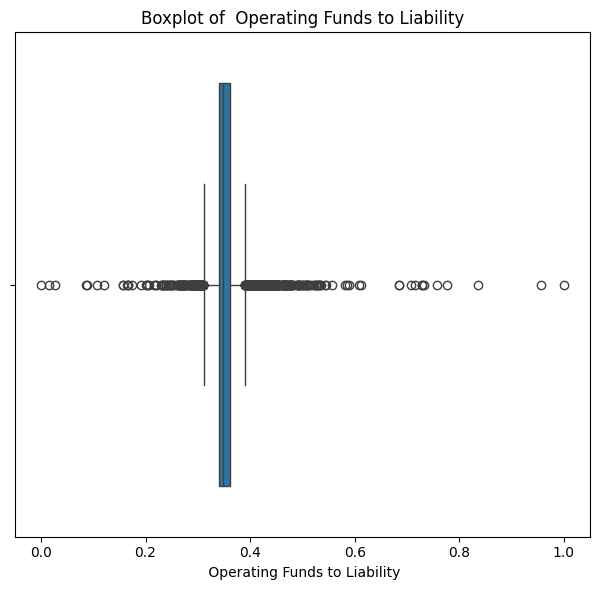

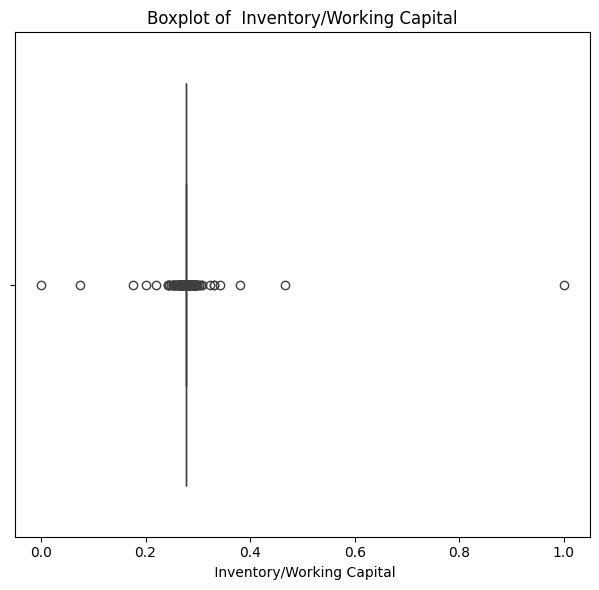

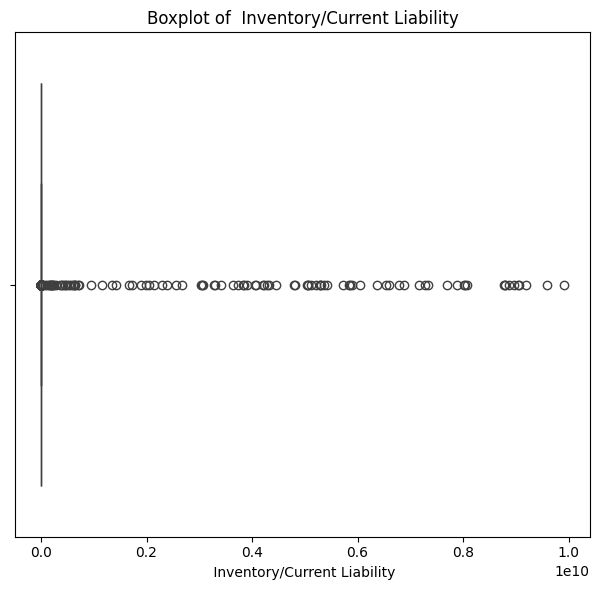

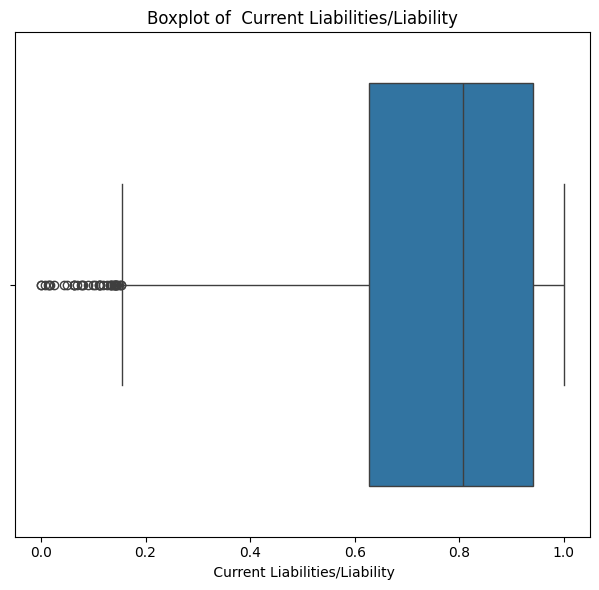

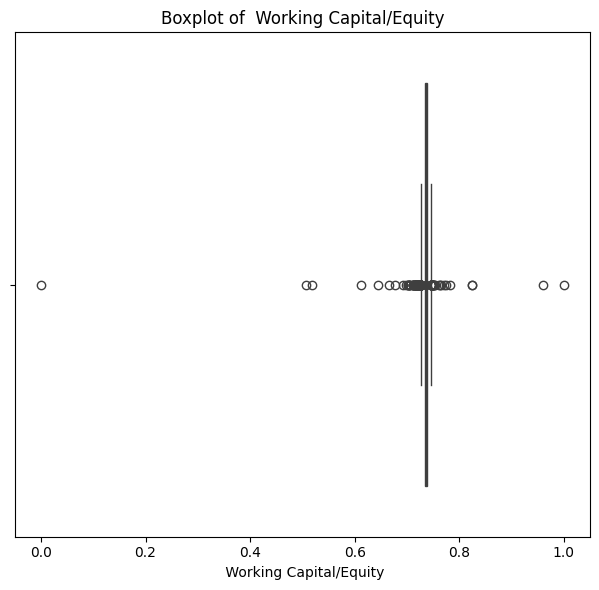

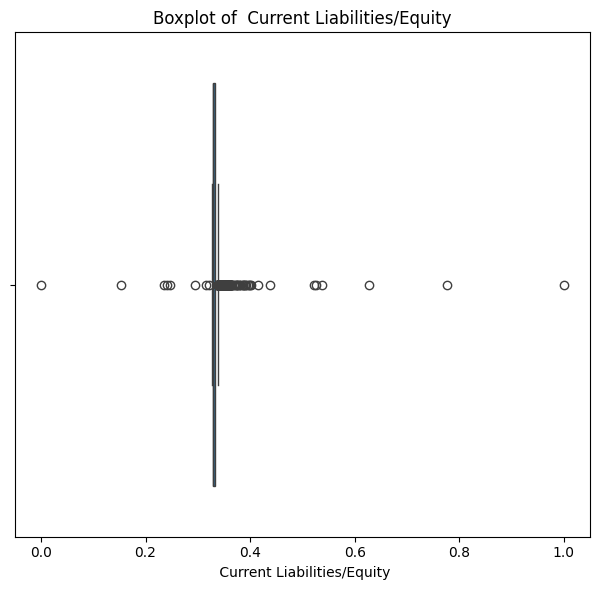

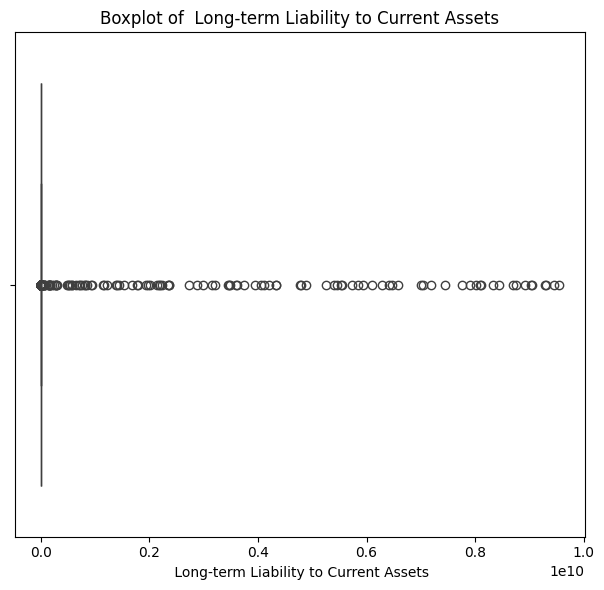

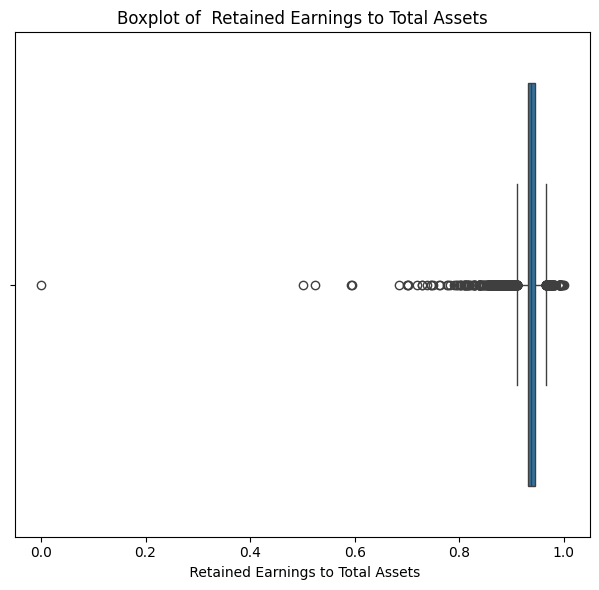

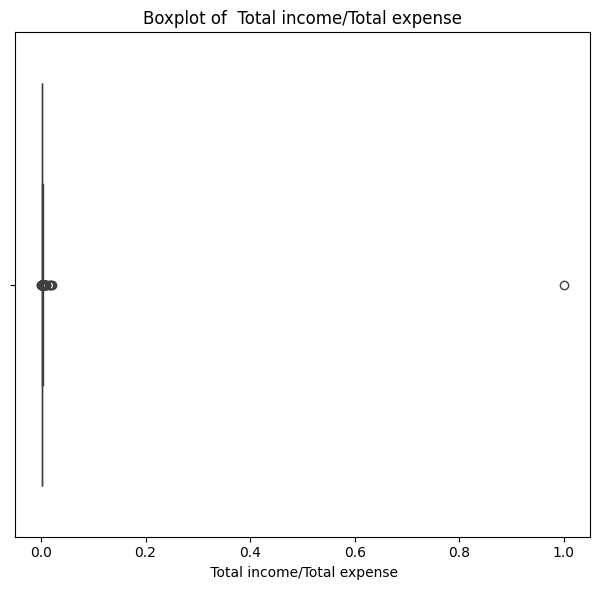

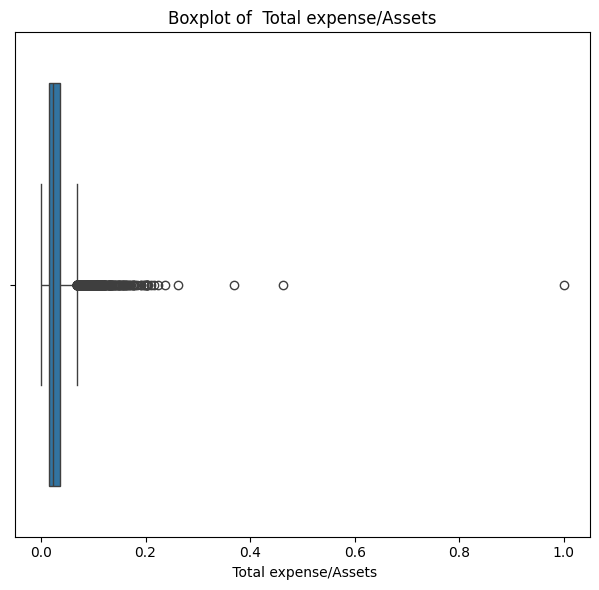

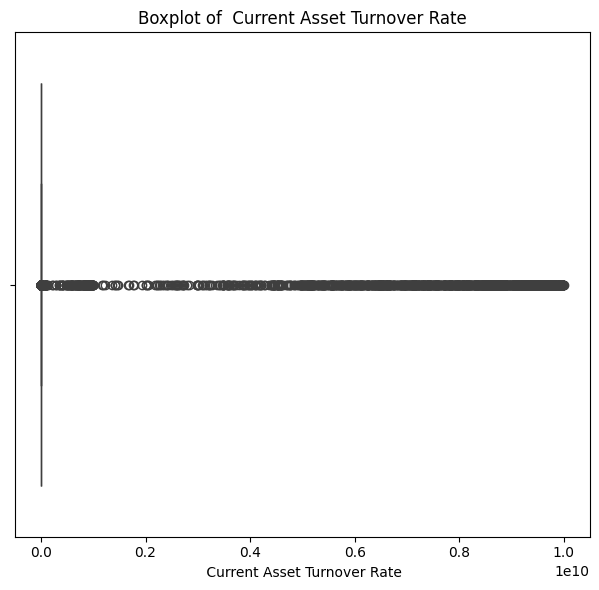

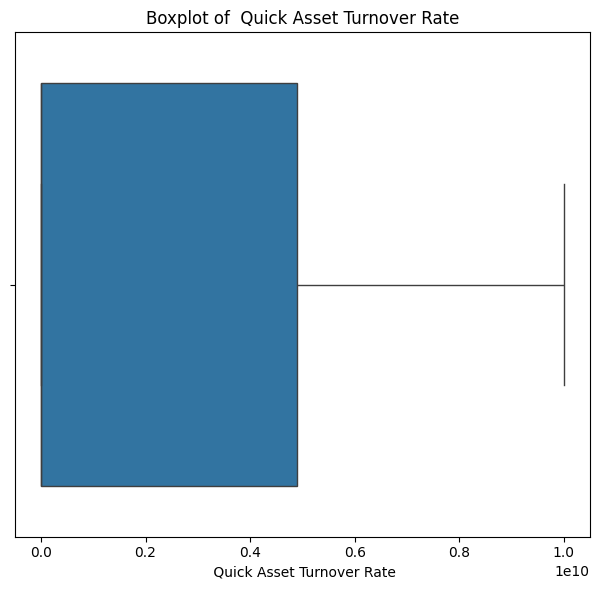

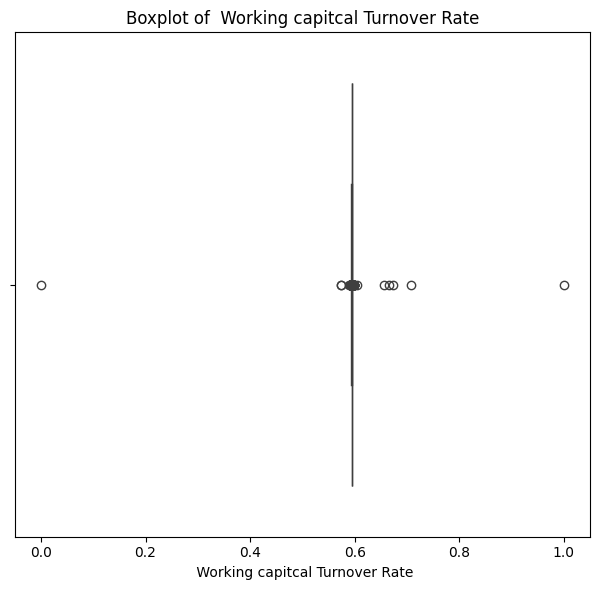

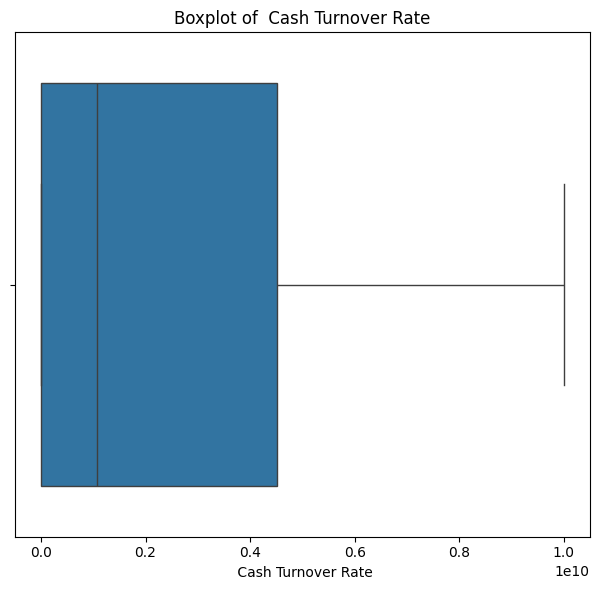

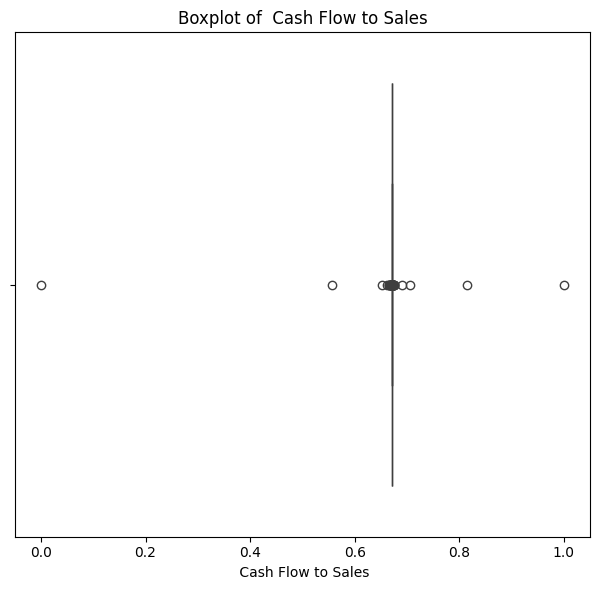

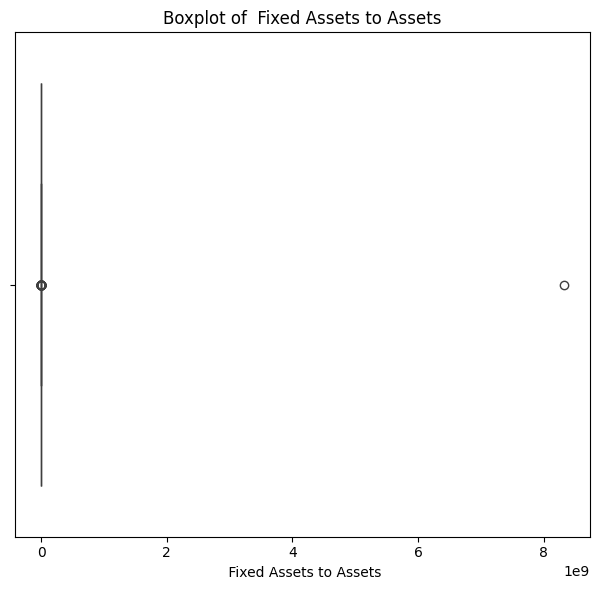

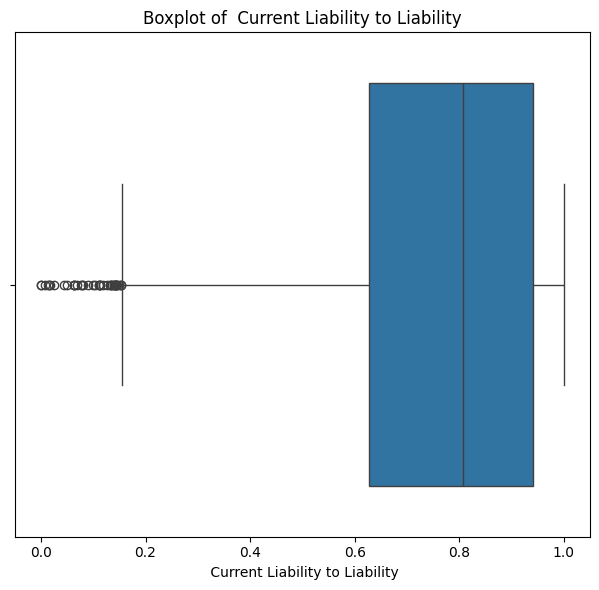

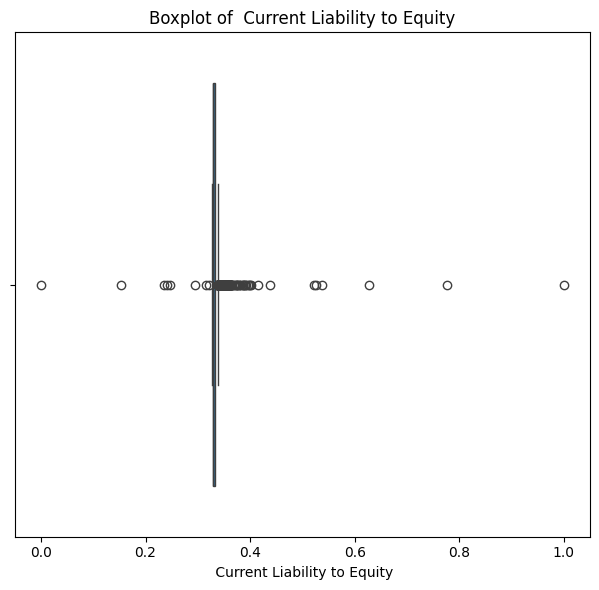

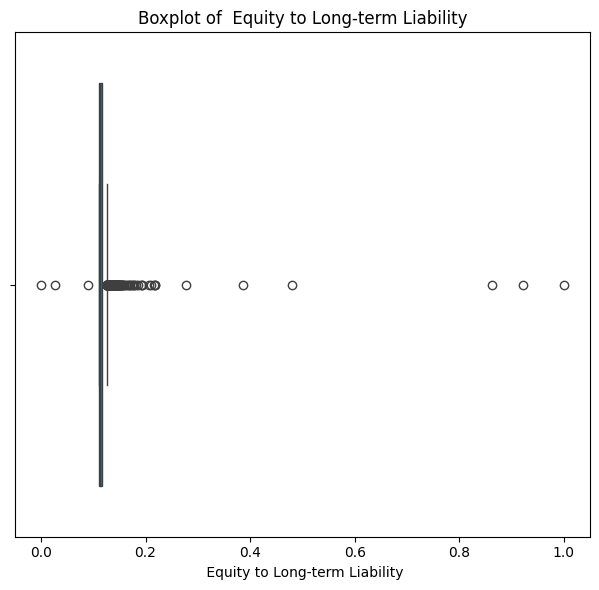

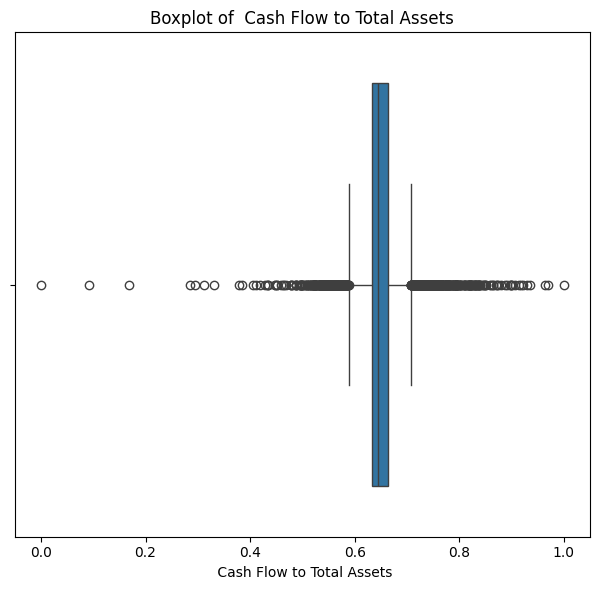

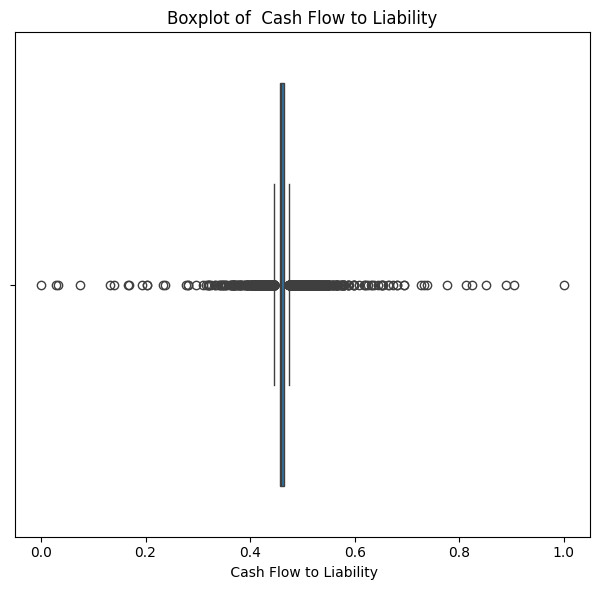

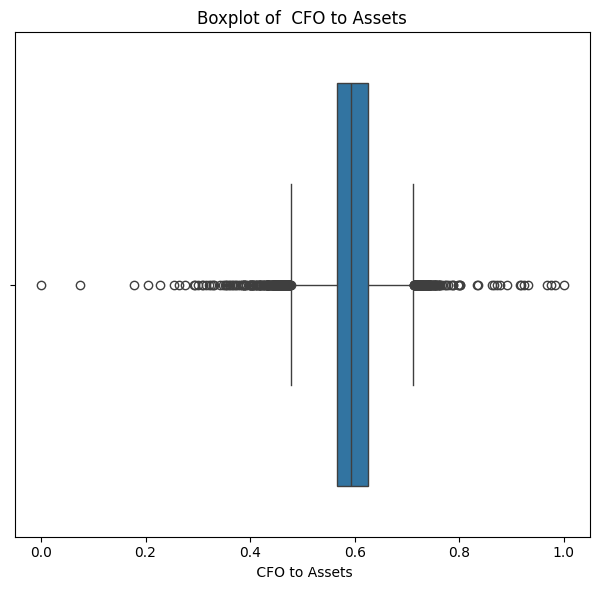

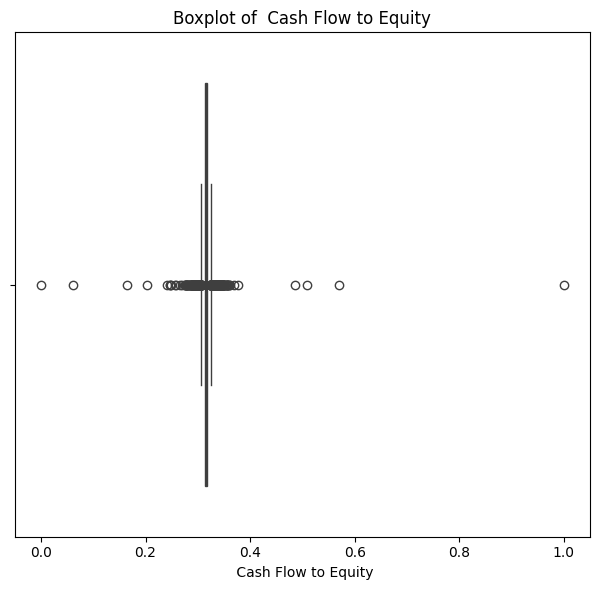

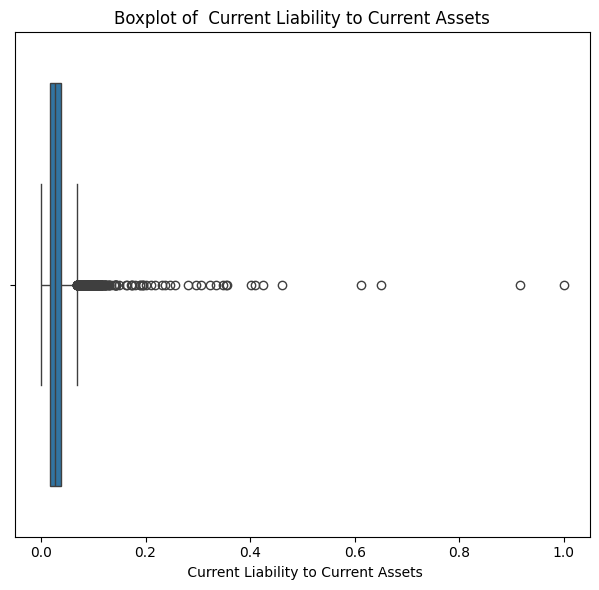

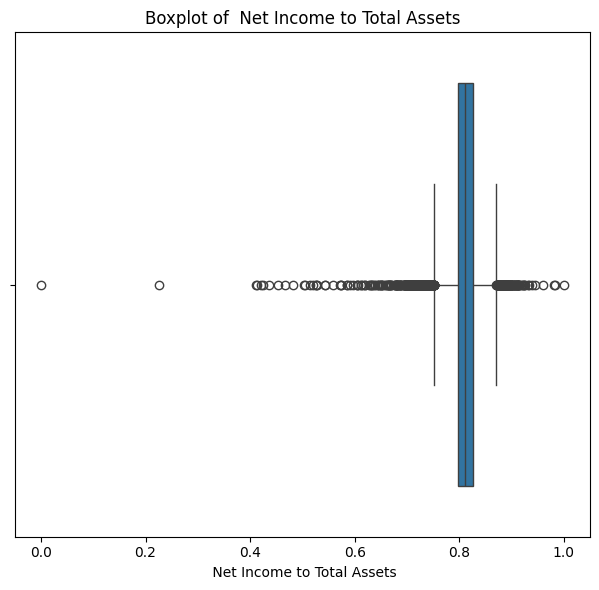

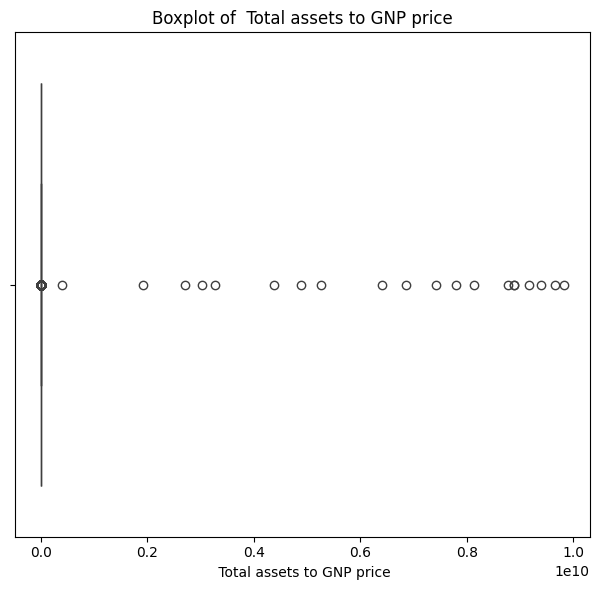

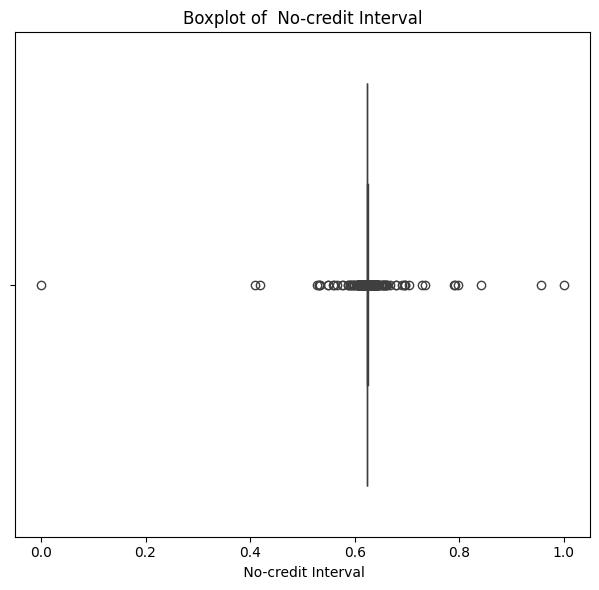

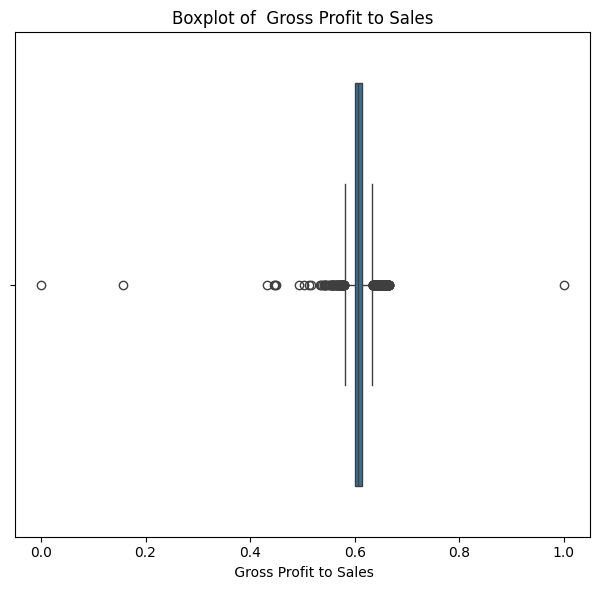

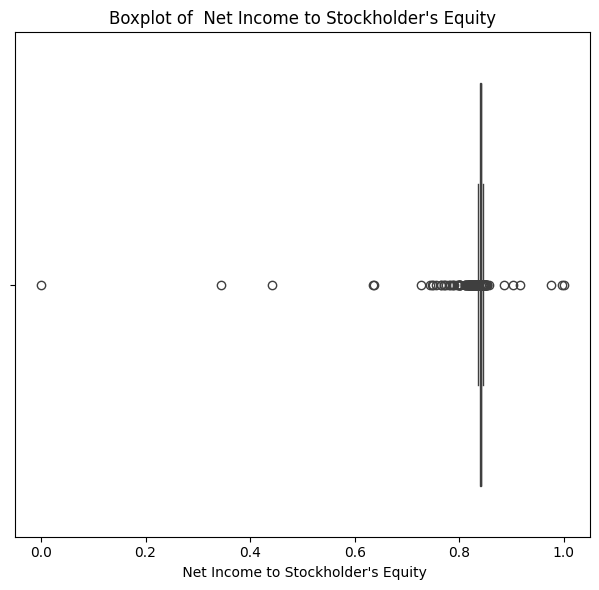

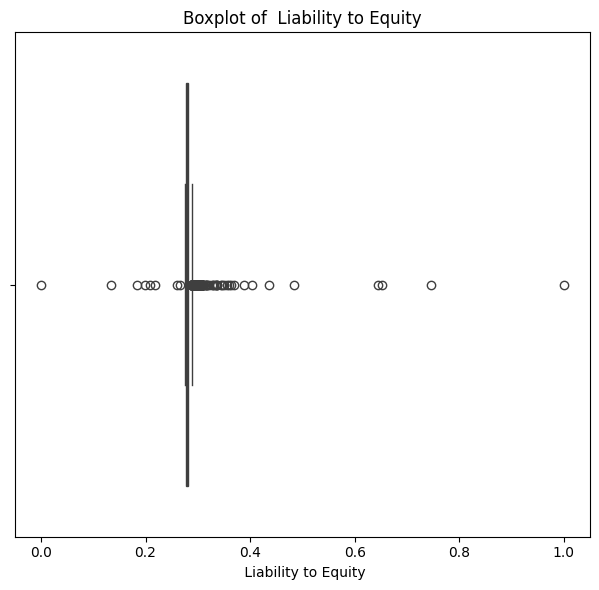

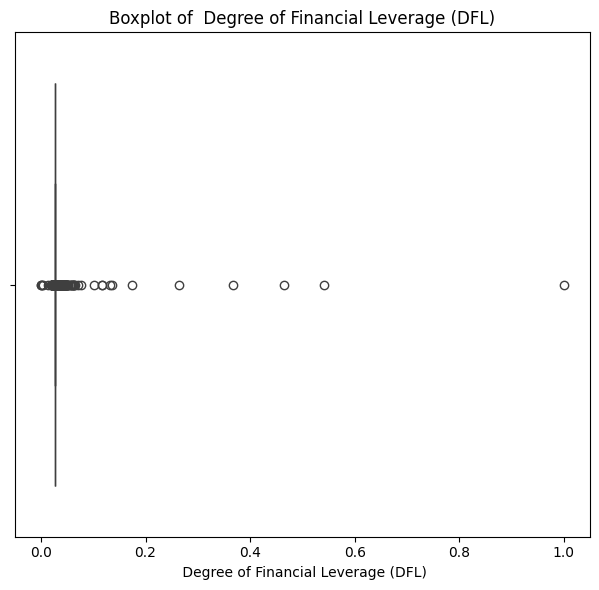

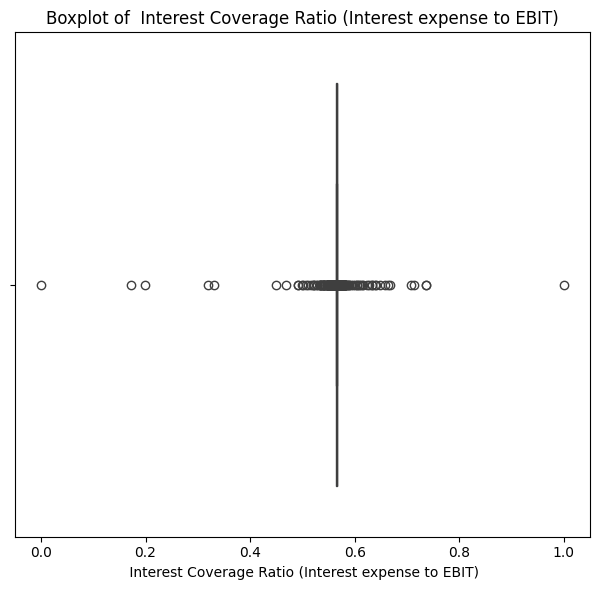

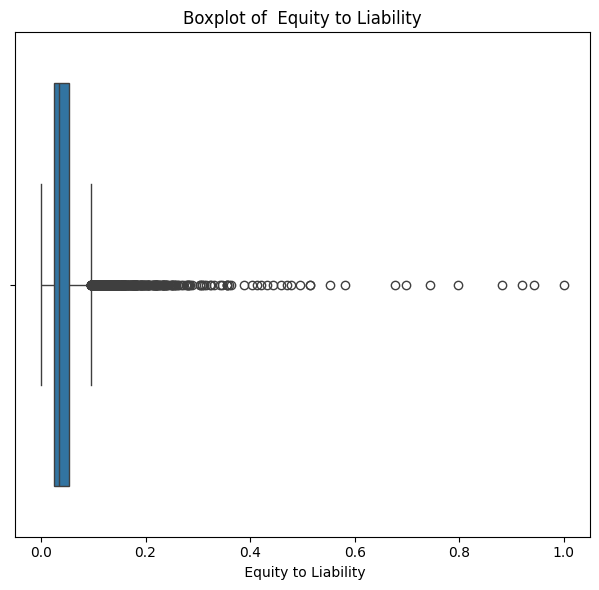

In [97]:
for col in columns:
    plt.figure(figsize=(12, 6))
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()
    # created a boxplot to check outliers in the features


In [98]:
#we can see there are many outliers are present in our data so we need to manage outliers
#no of outliers are high so we can't remove them so we need to handle outliers.

In [99]:
def outliers(x):
    Q3=df[x].quantile(0.75)     # Q3 = 75th percentile
    Q1=df[x].quantile(0.25)     # Q1 = 25th percentile
    IQR=Q3-Q1                      # IQR Inter Quartile Range to calculate lower upper bond
    lb=Q1-1.5*(IQR)                 # lower bond
    ub=Q3+1.5*(IQR)                 # upper bond
    idx=np.where(df[x]>ub)
    df[x].iloc[idx]=ub        # replace outliers with upper bond
    idx=np.where(df[x]<lb)
    df[x].iloc[idx]=lb       # replace outliers with lower bond




In [100]:
# created a function to replace outliers
# using for loop we can replace outliers

In [101]:
for col in columns:
    outliers(col)

<ipython-input-99-55010532acd4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x].iloc[idx]=ub        # replace outliers with upper bond
<ipython-input-99-55010532acd4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x].iloc[idx]=lb       # replace outliers with lower bond
<ipython-input-99-55010532acd4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x].iloc[idx]=ub        # replace outliers with upper bond
<ipython-inpu

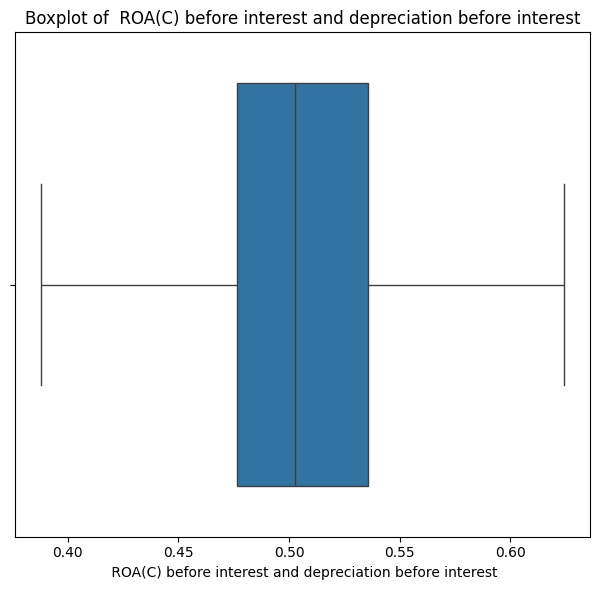

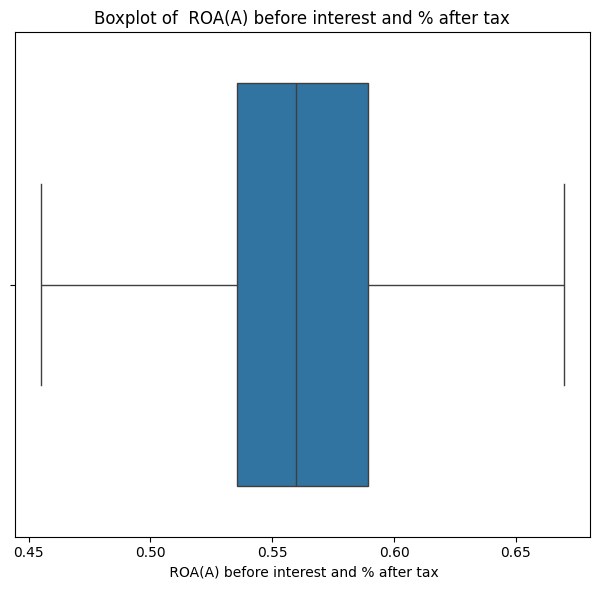

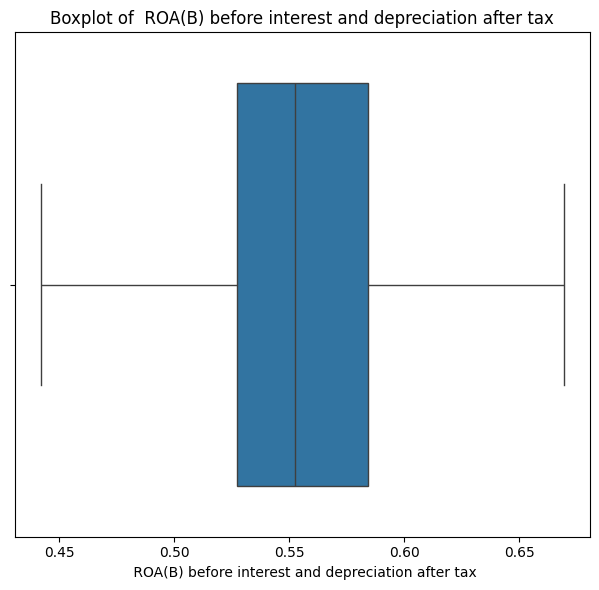

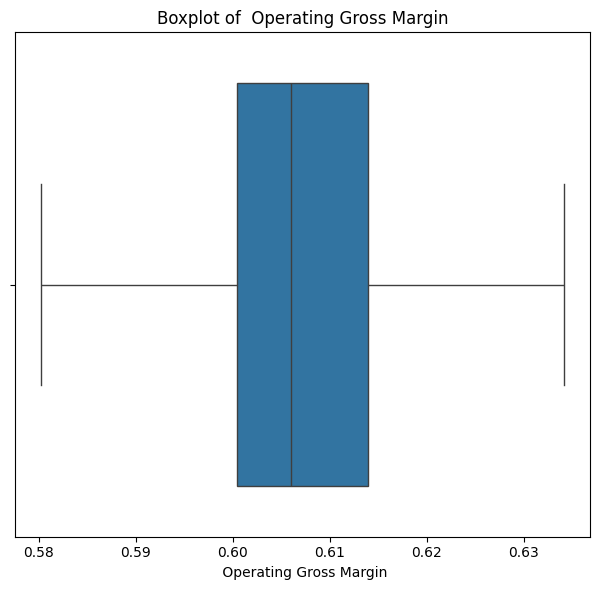

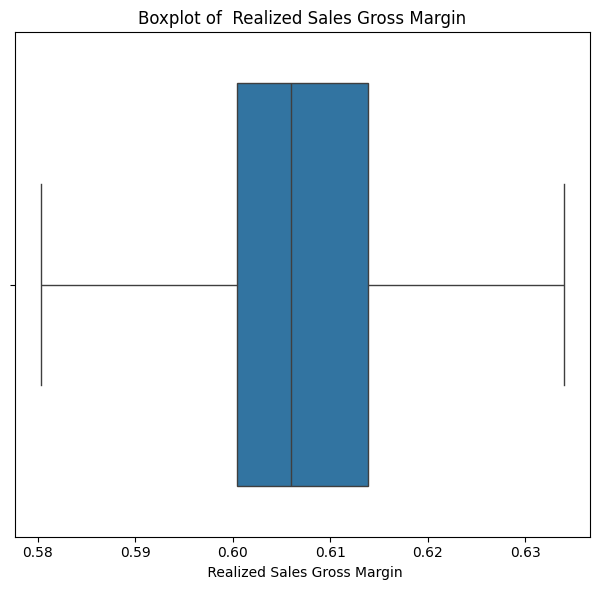

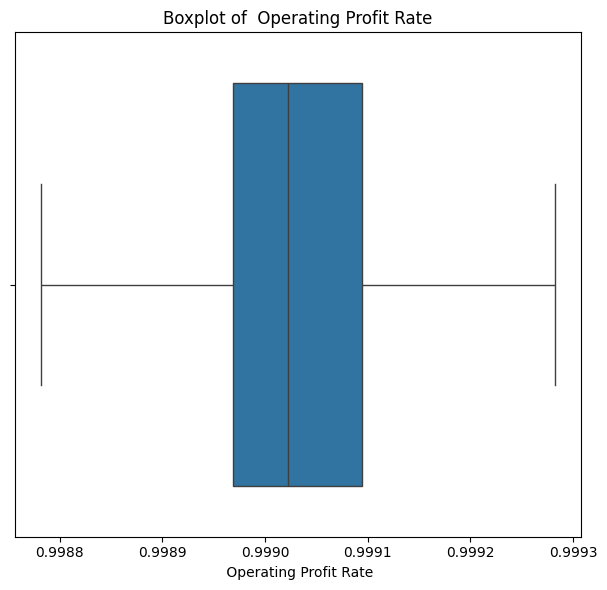

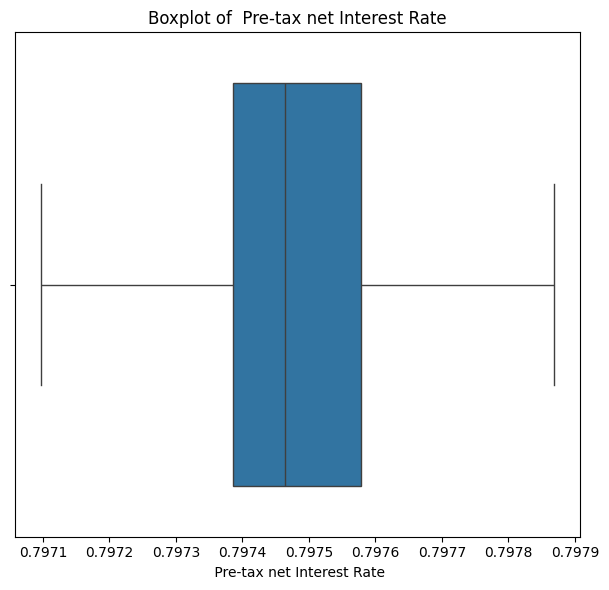

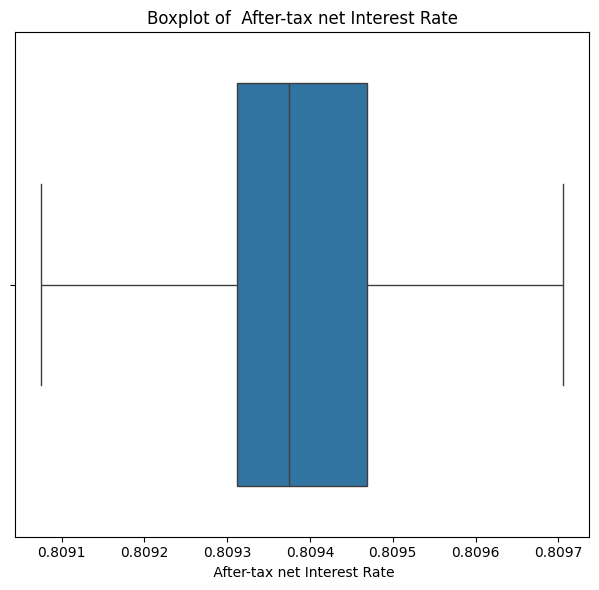

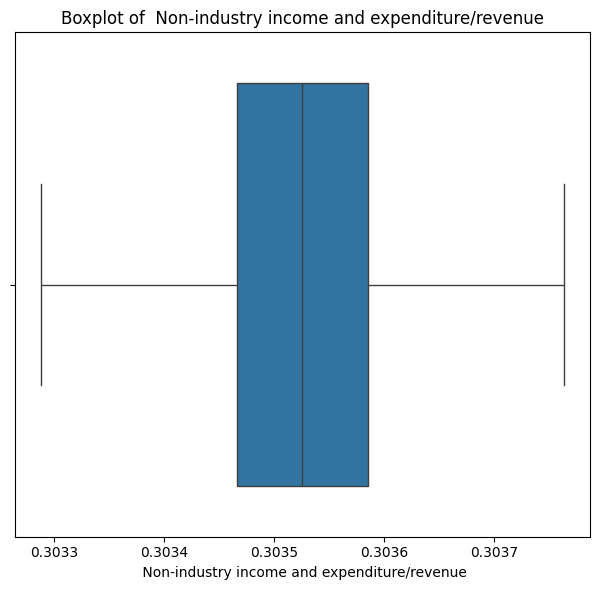

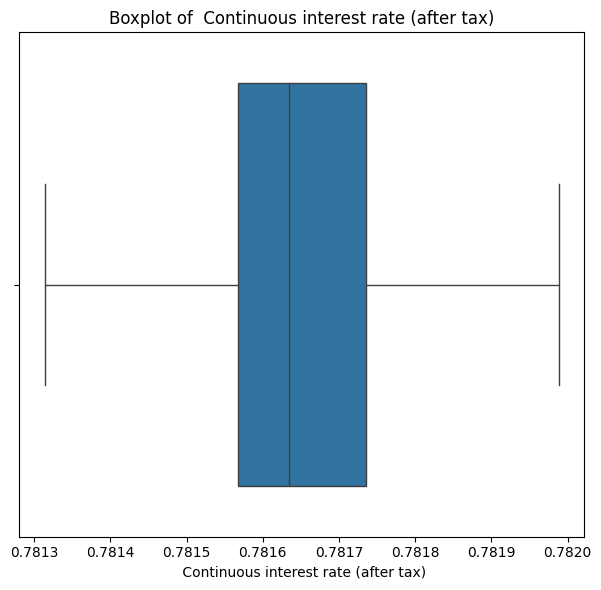

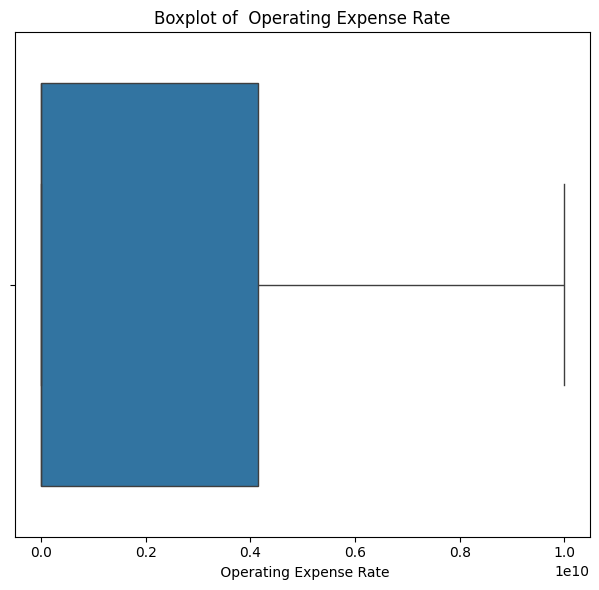

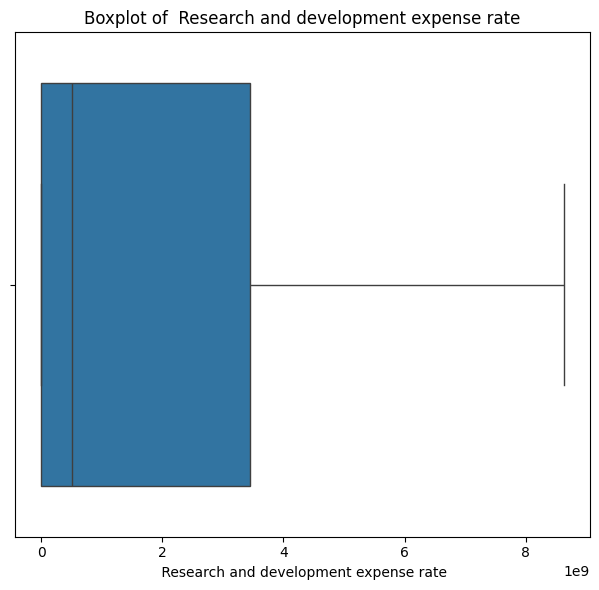

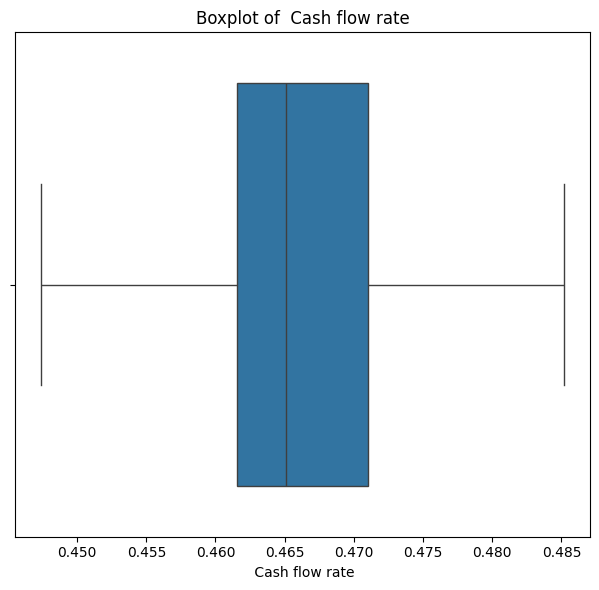

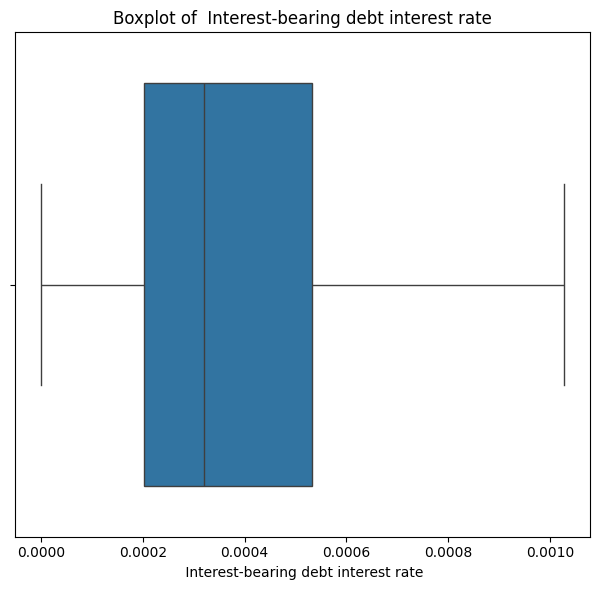

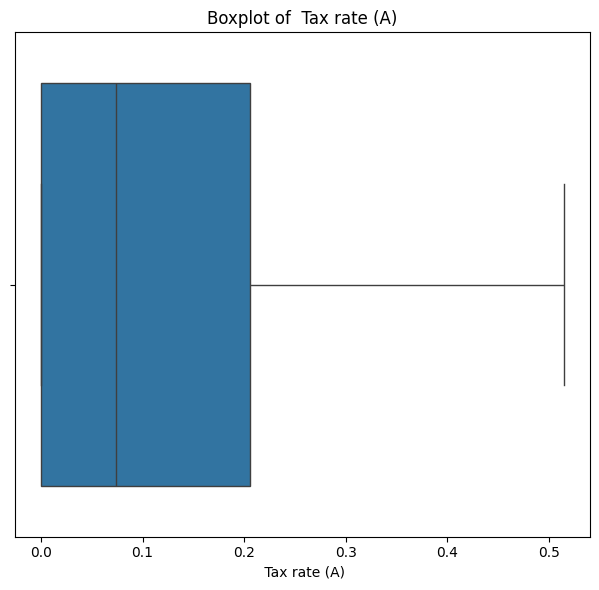

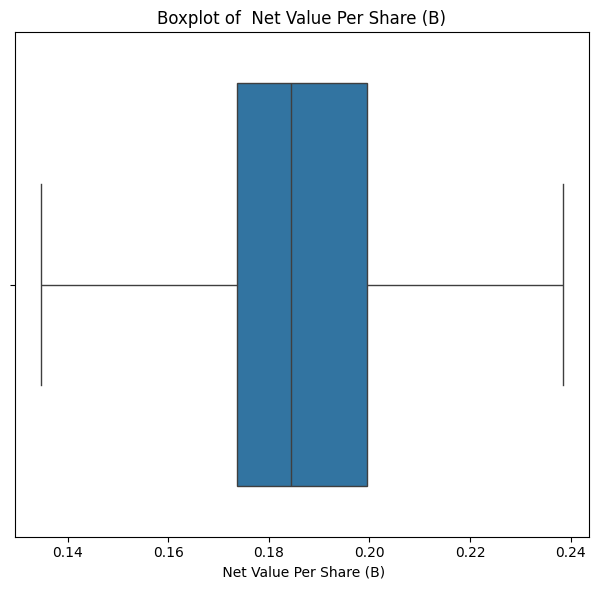

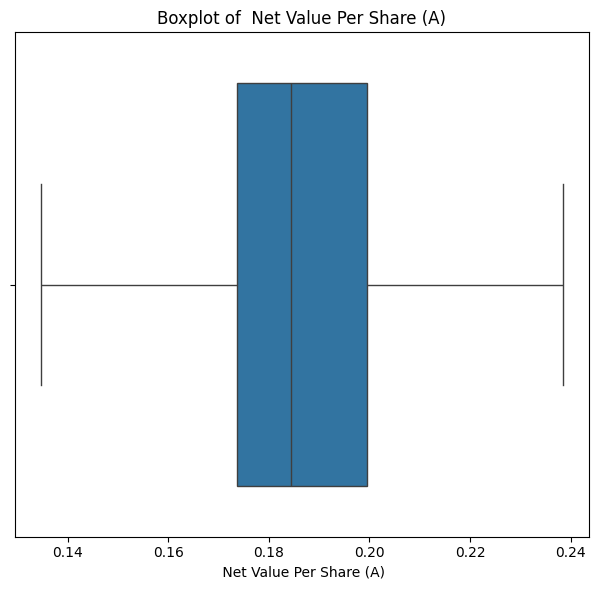

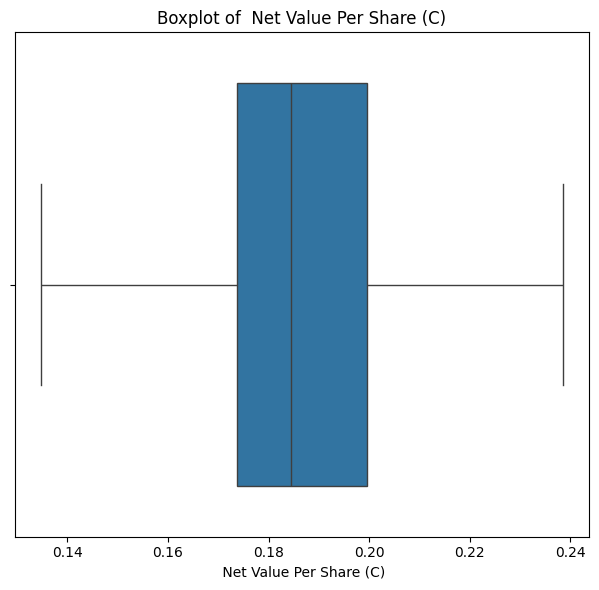

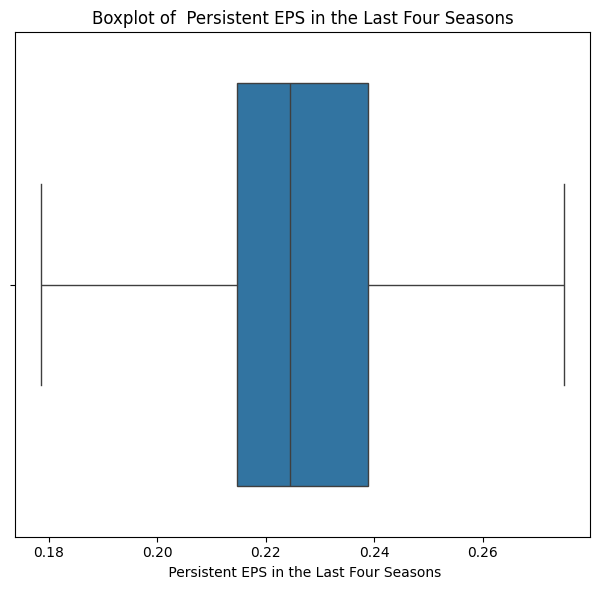

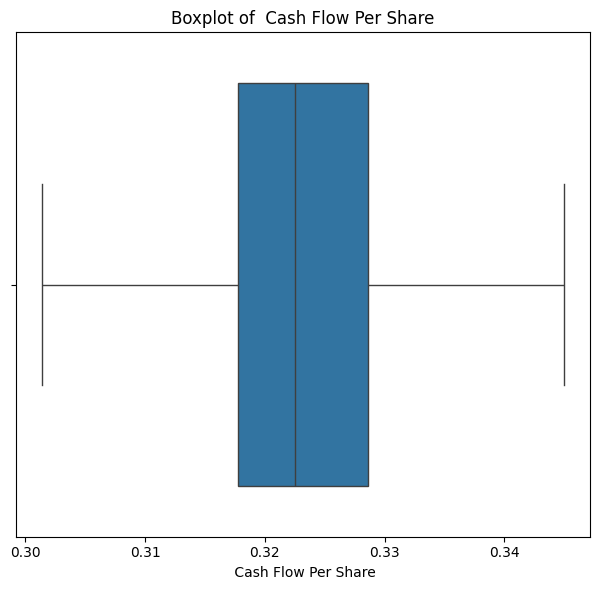

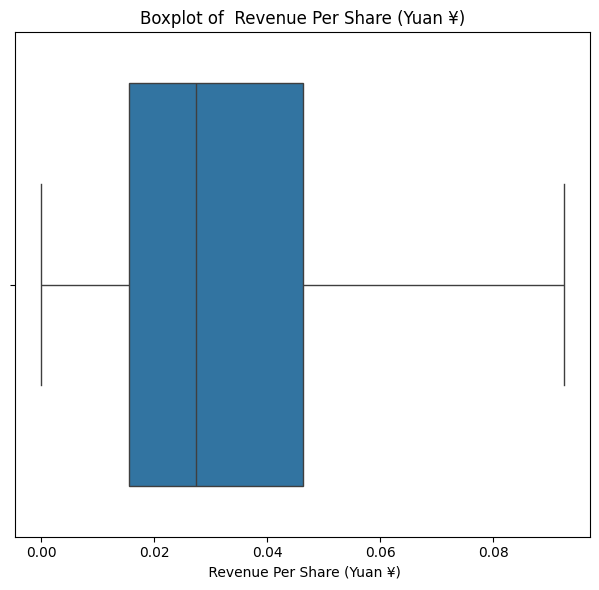

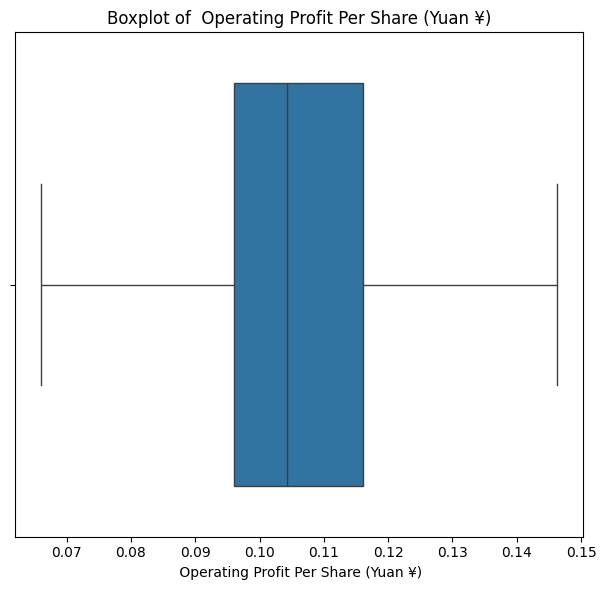

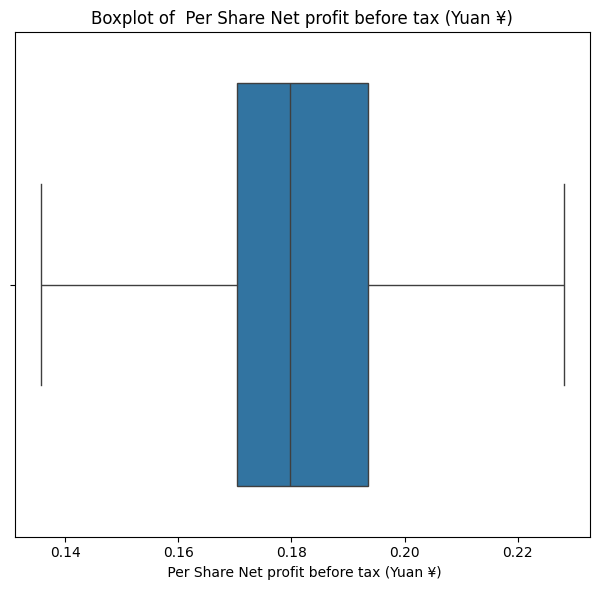

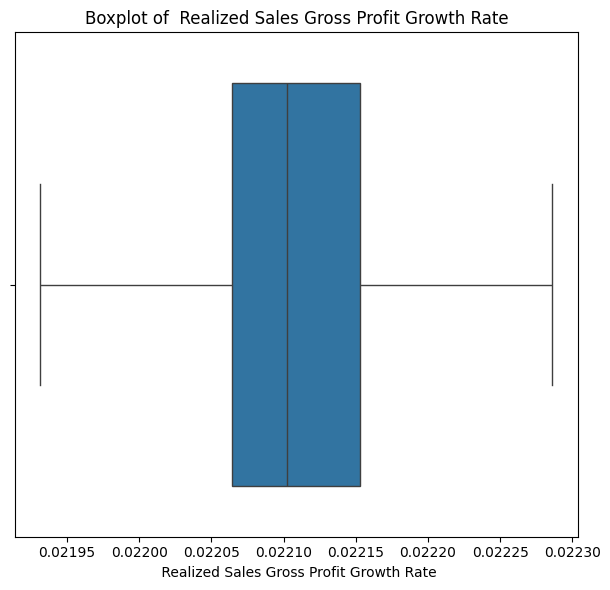

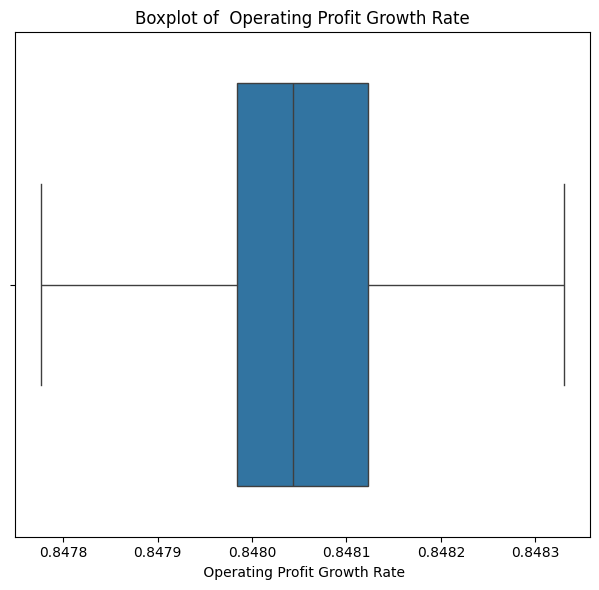

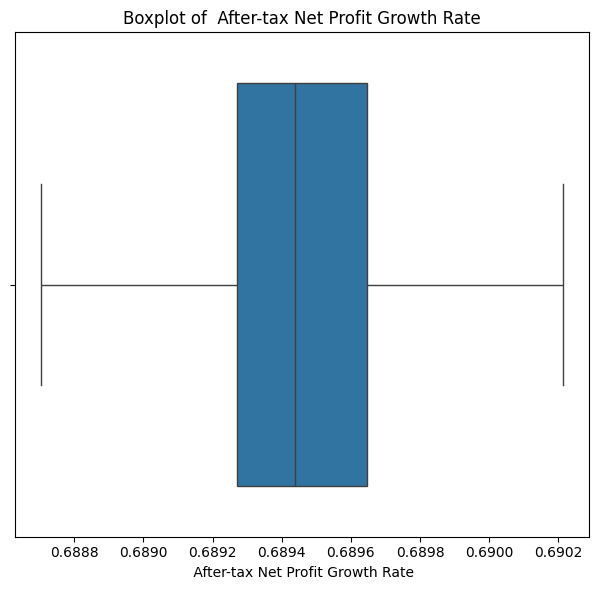

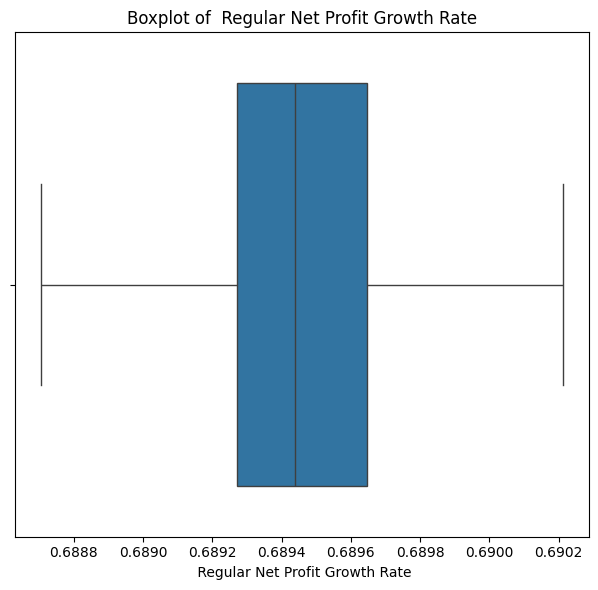

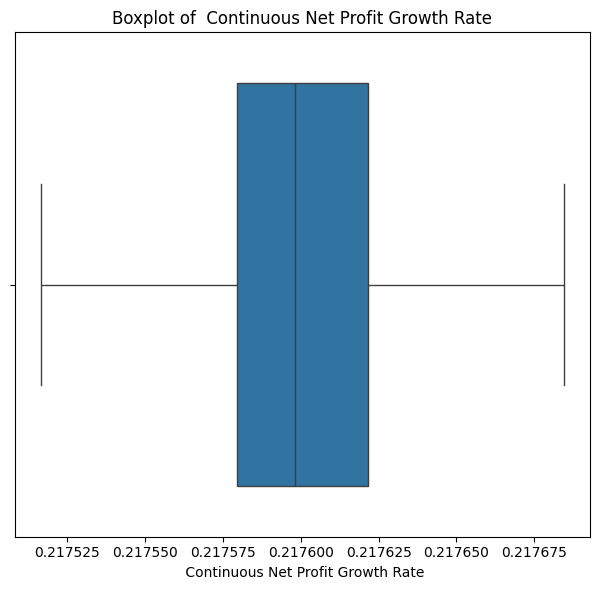

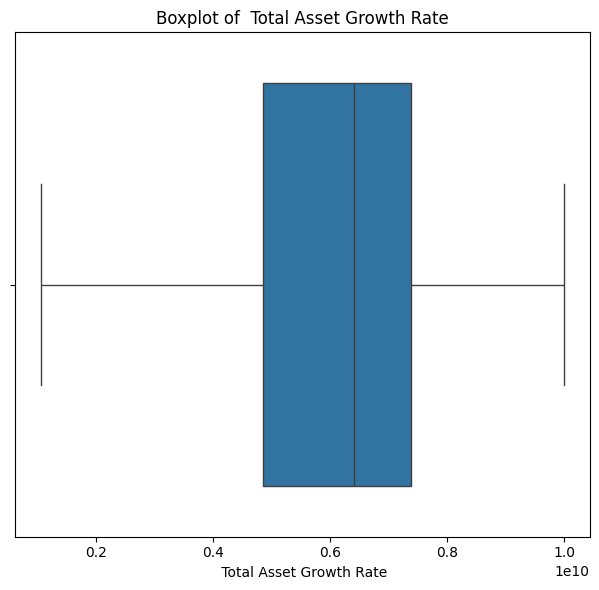

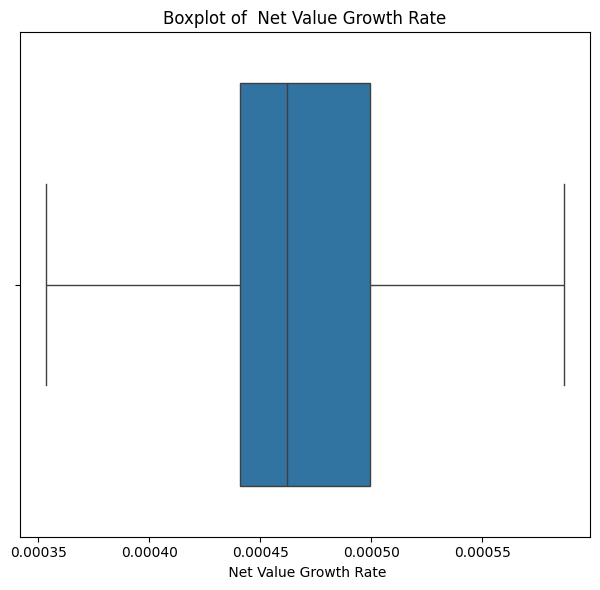

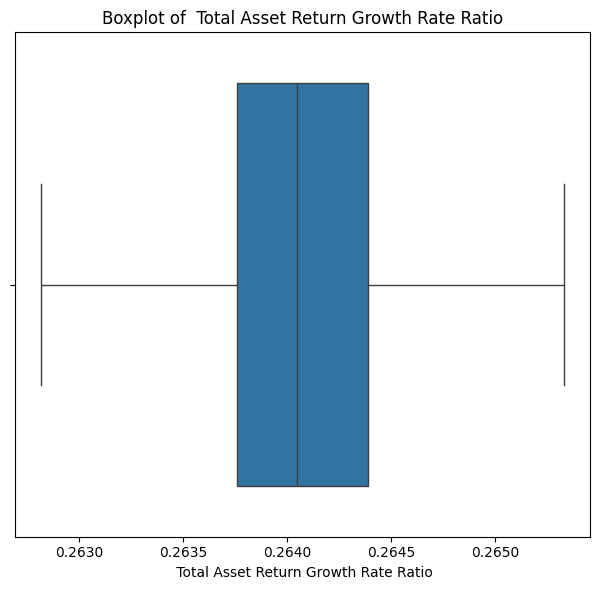

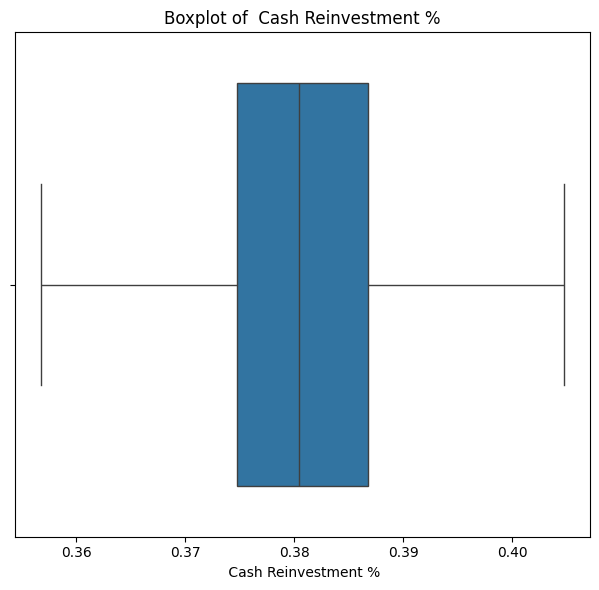

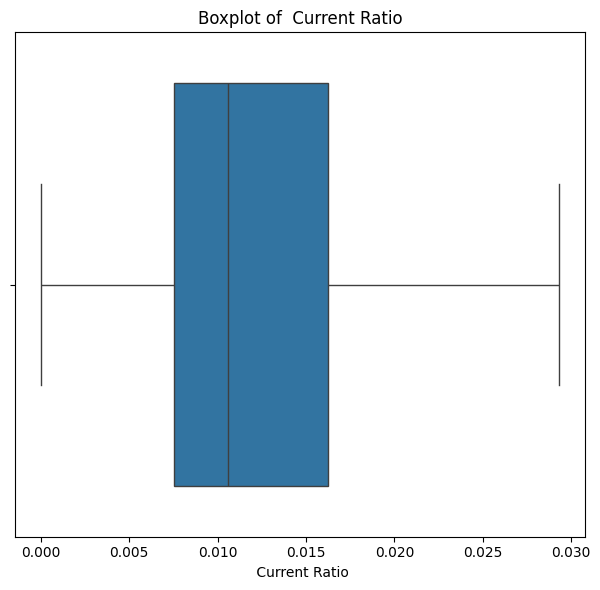

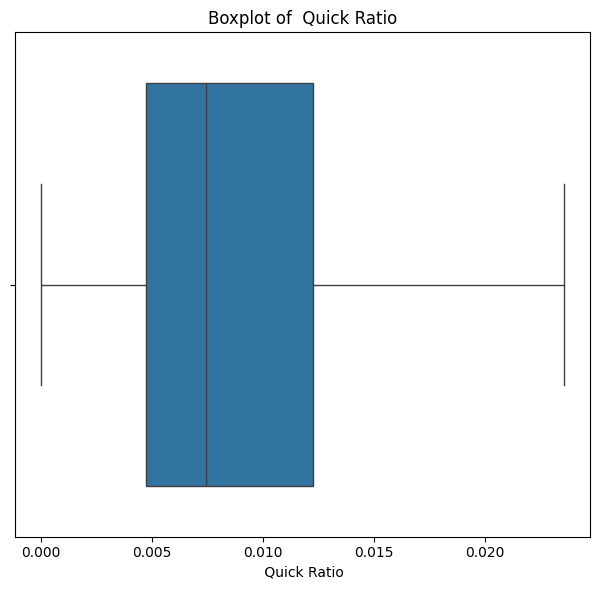

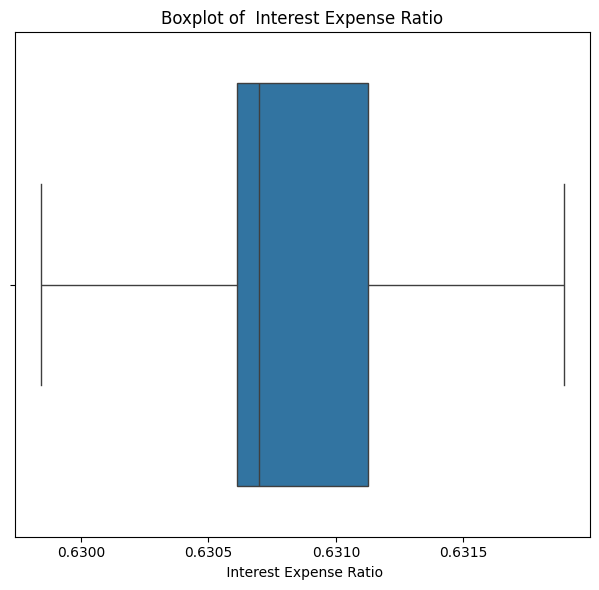

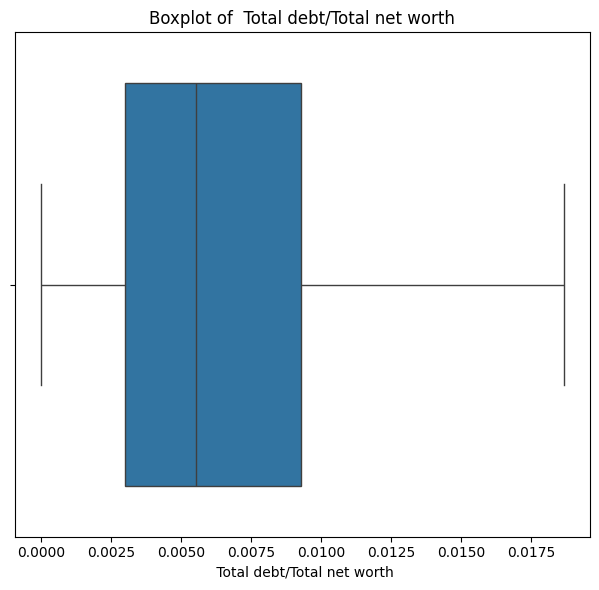

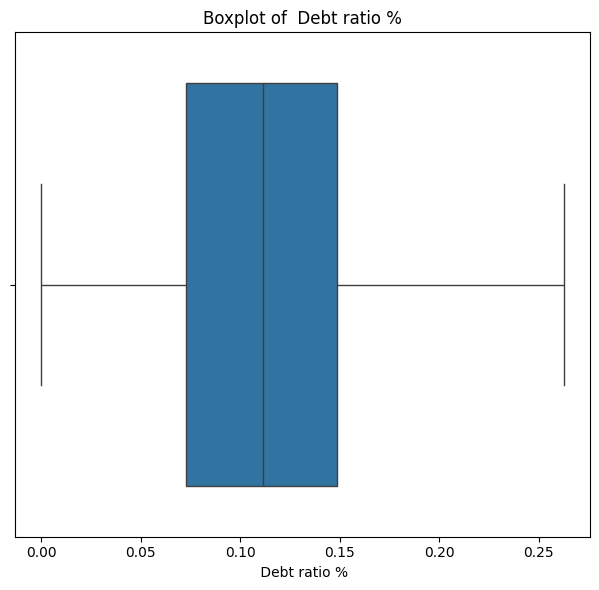

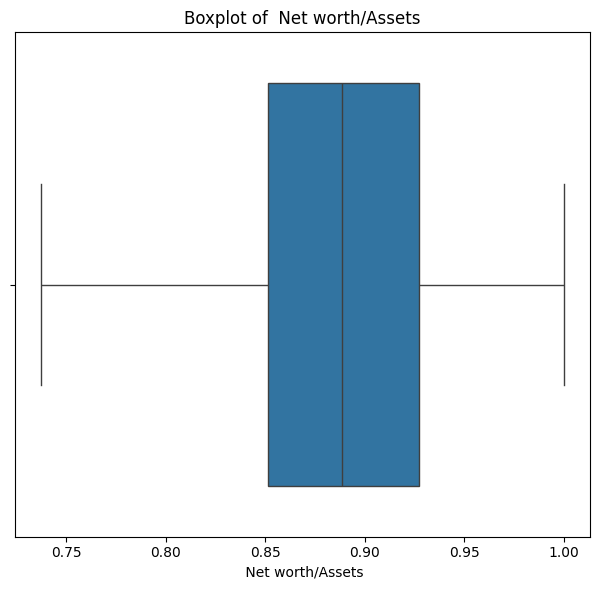

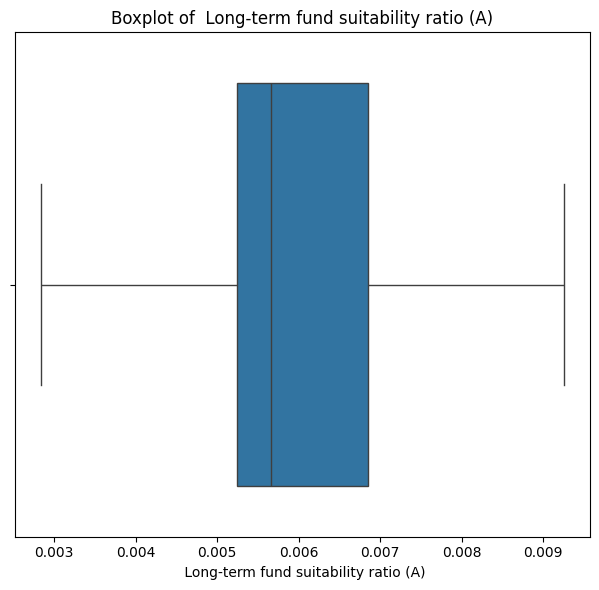

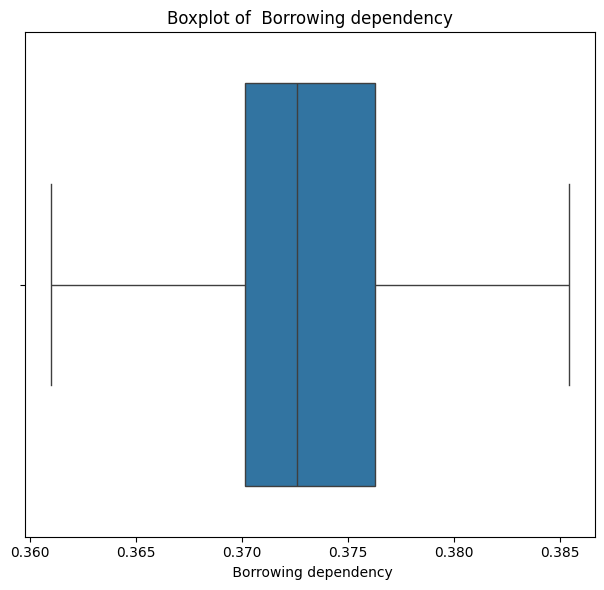

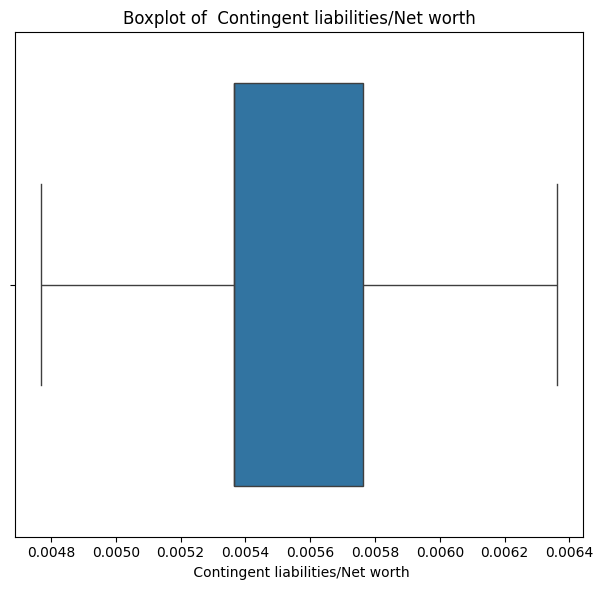

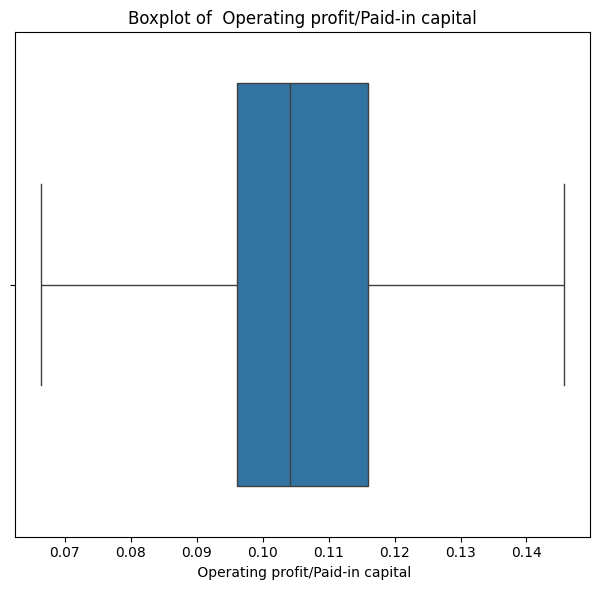

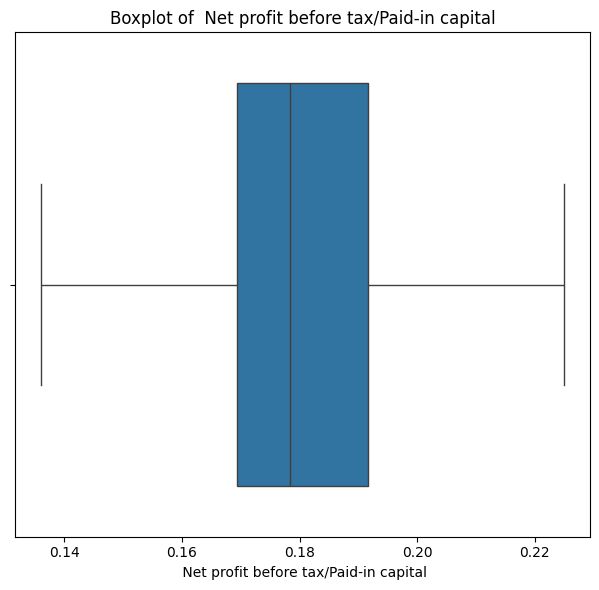

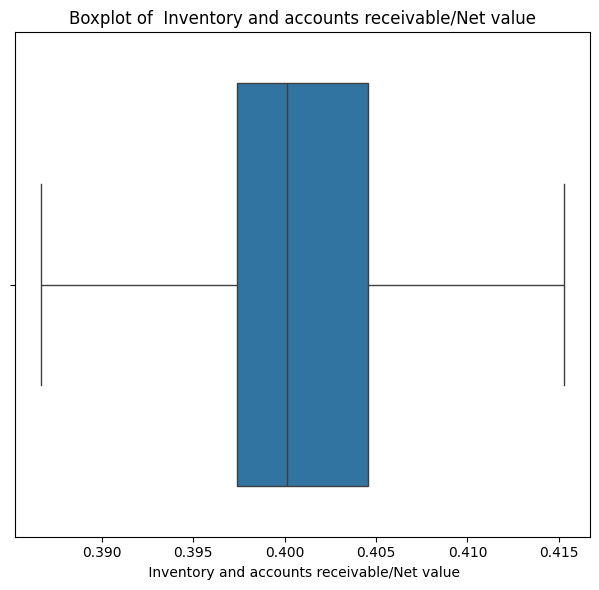

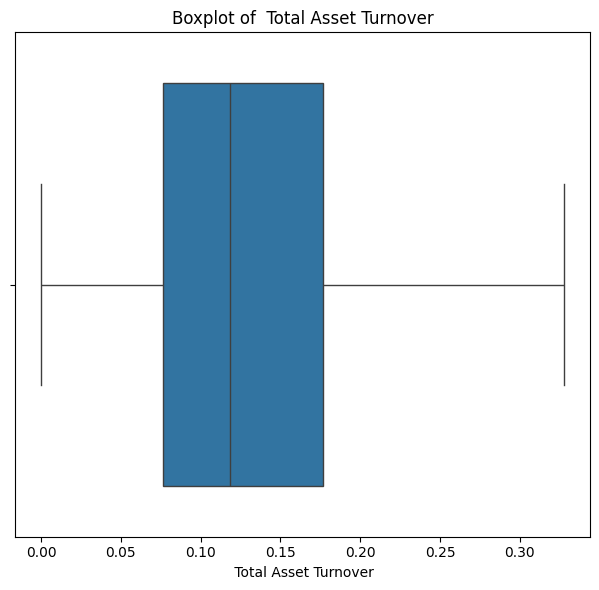

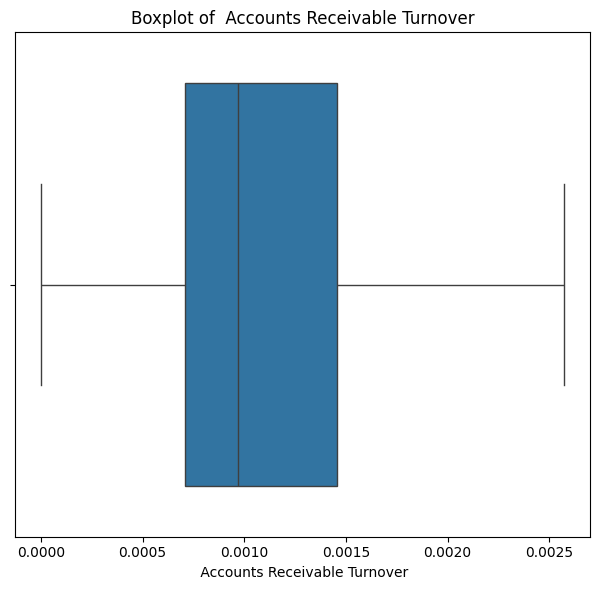

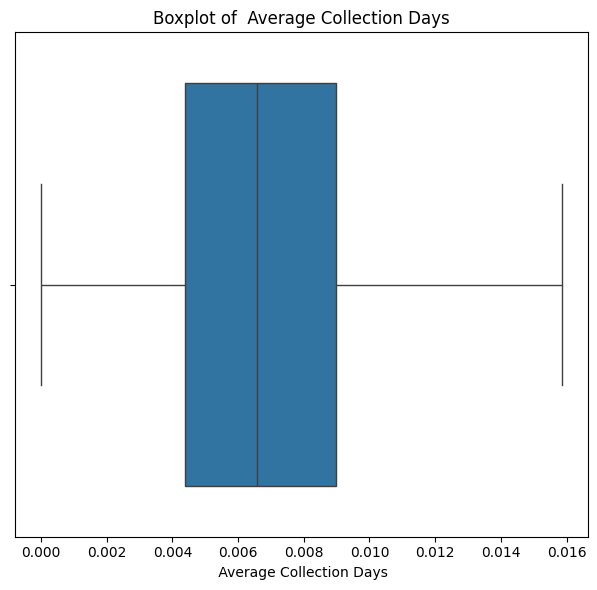

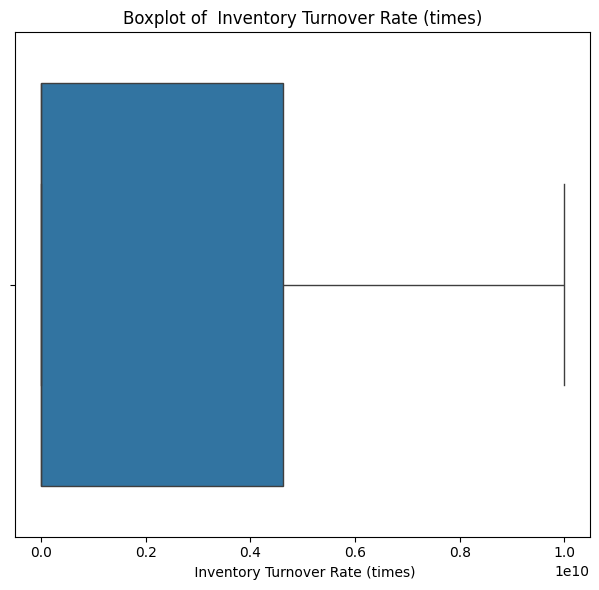

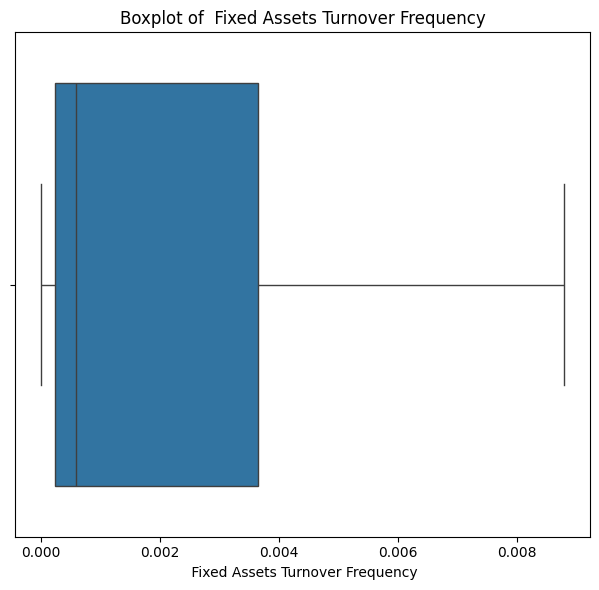

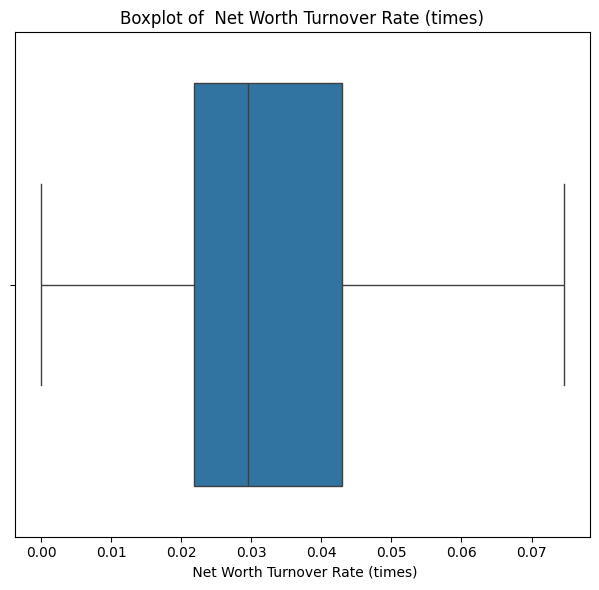

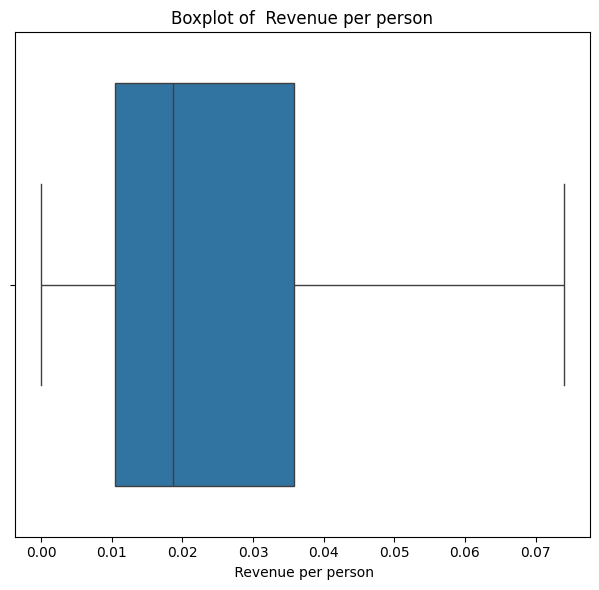

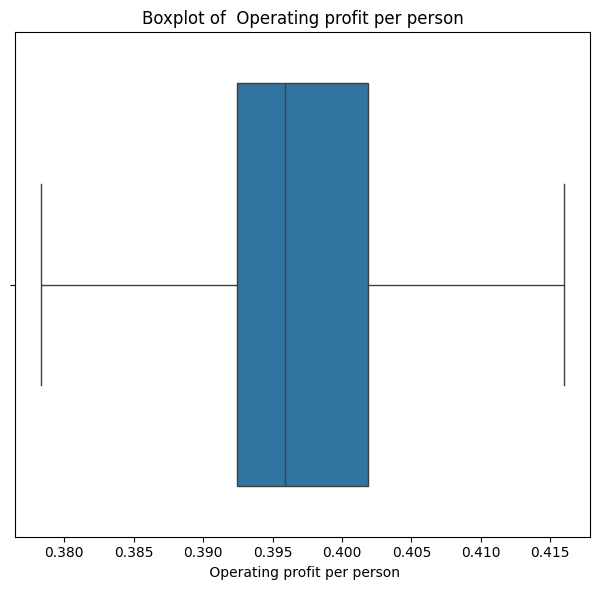

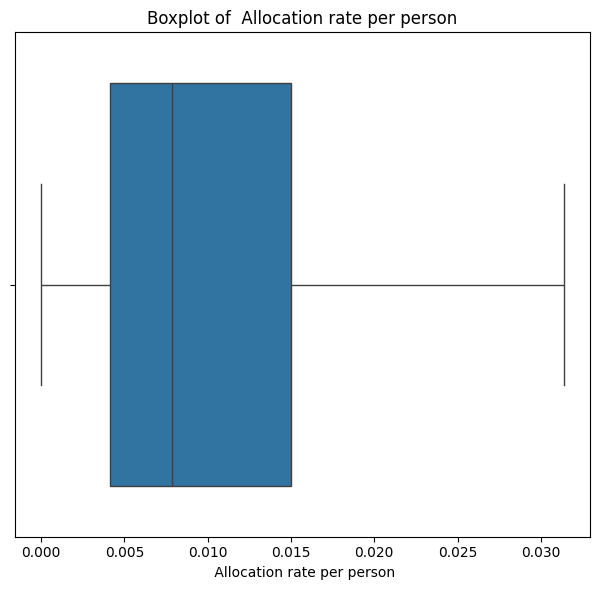

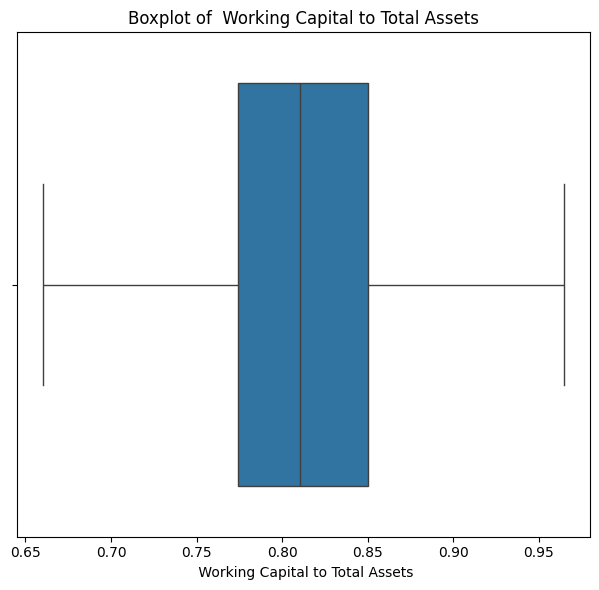

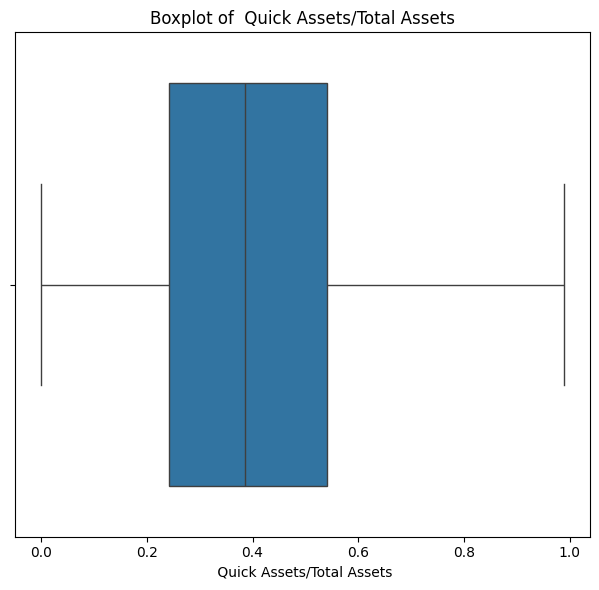

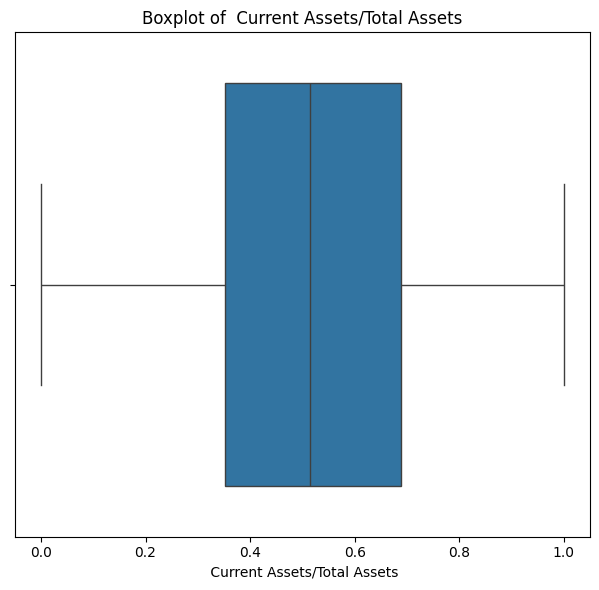

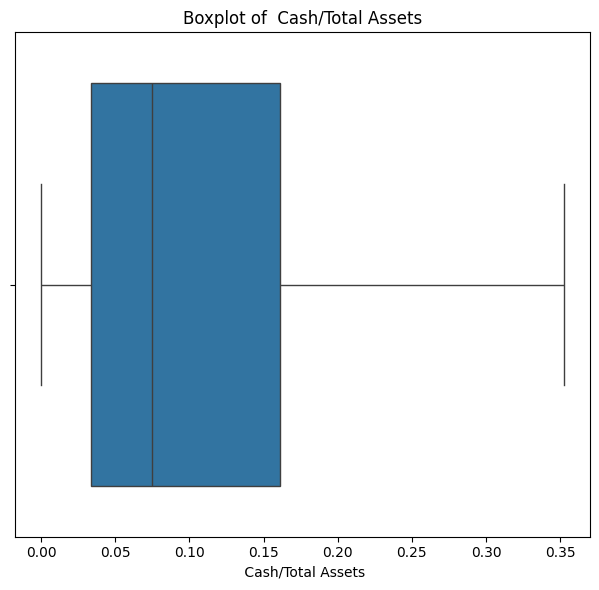

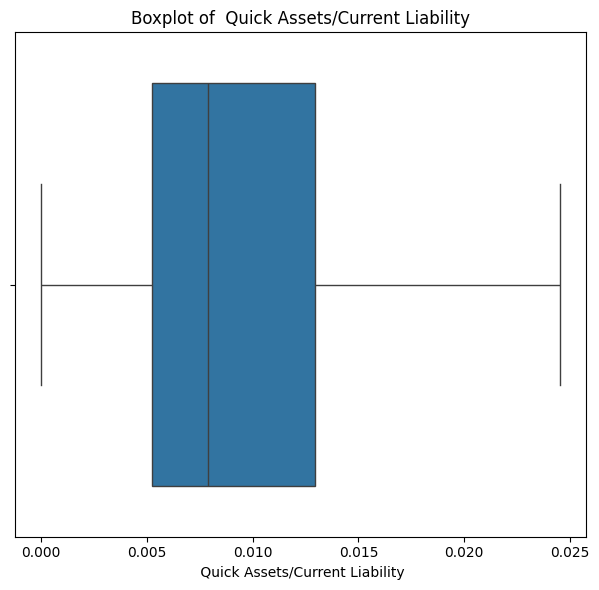

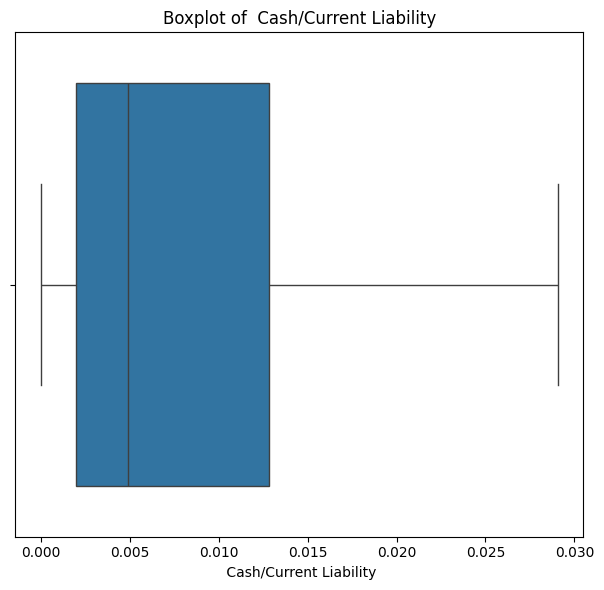

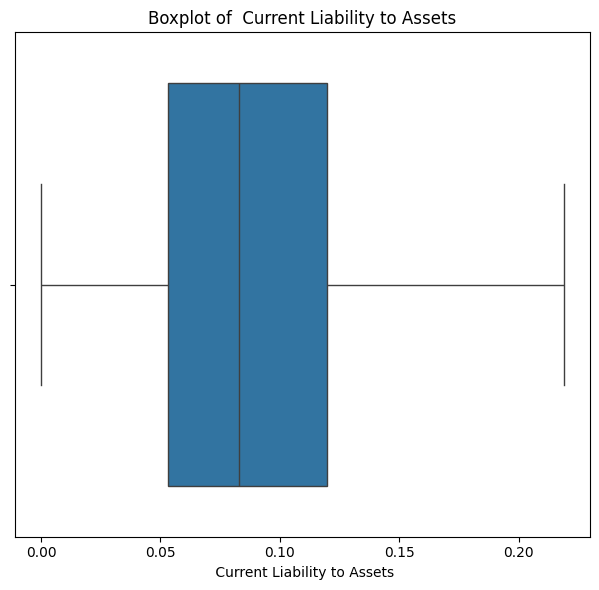

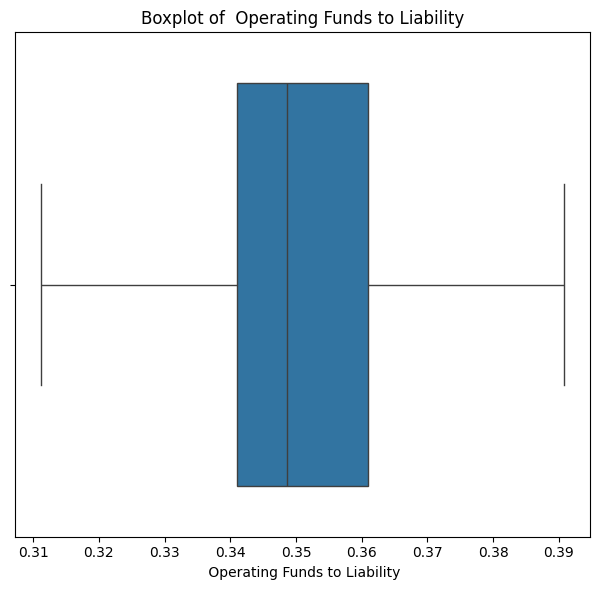

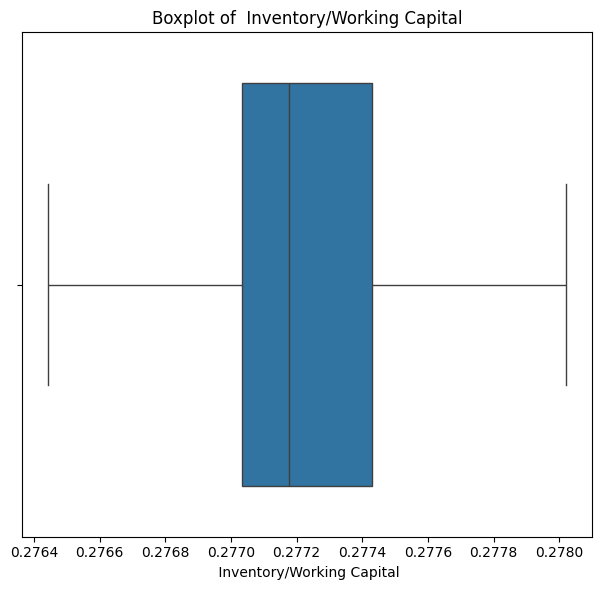

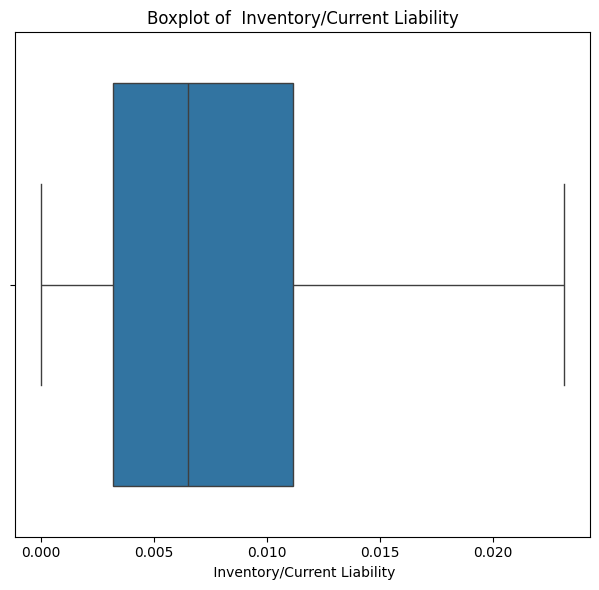

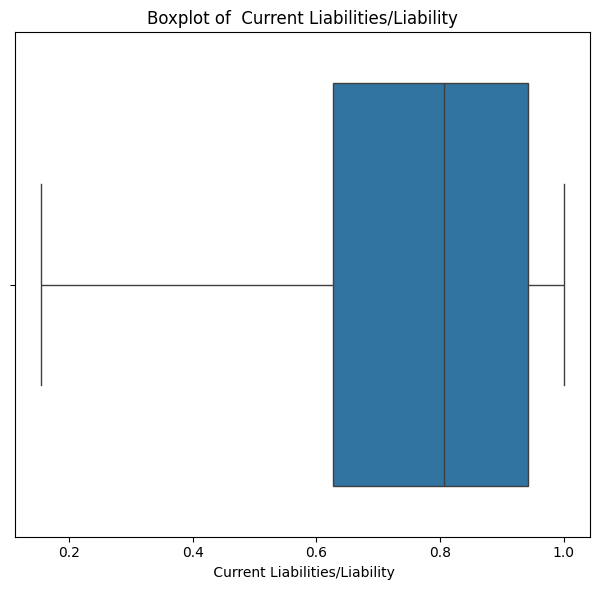

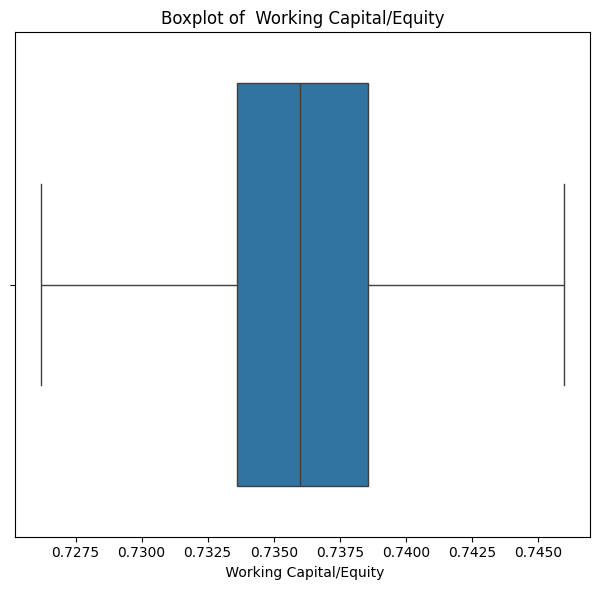

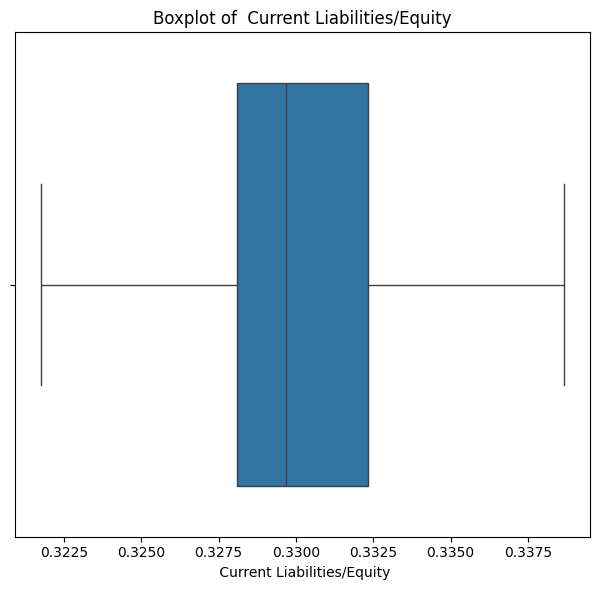

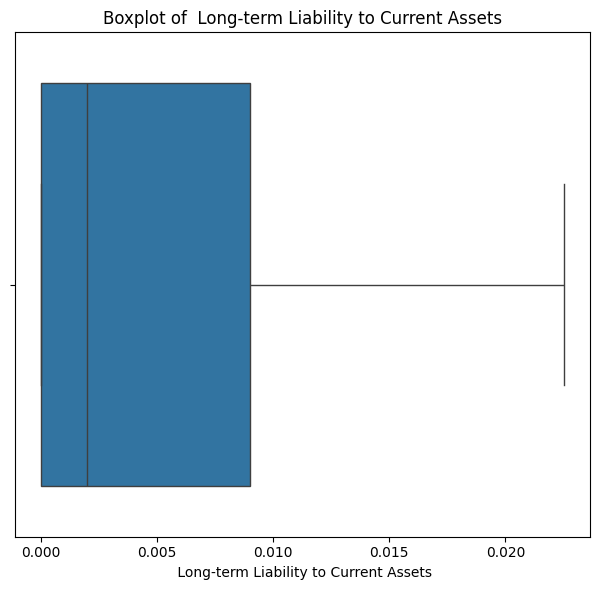

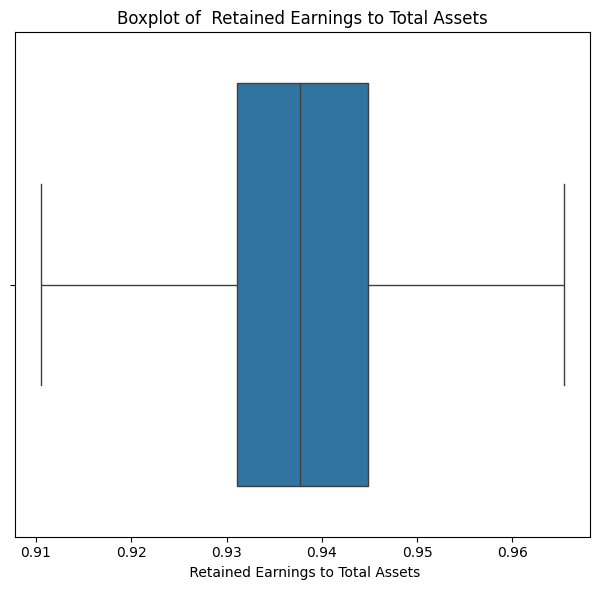

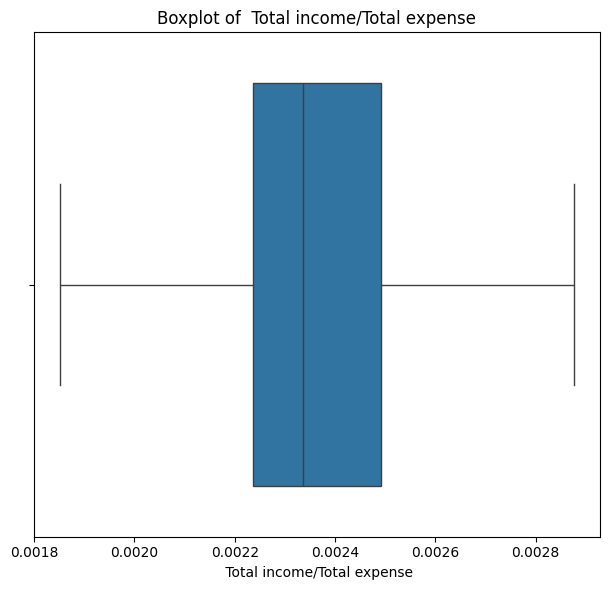

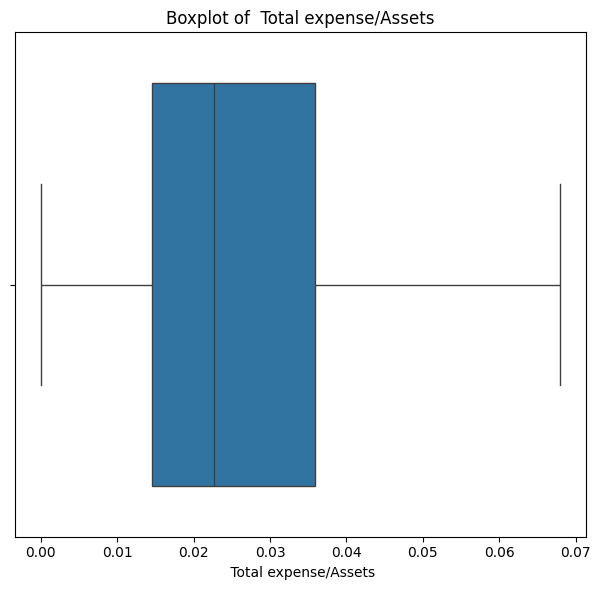

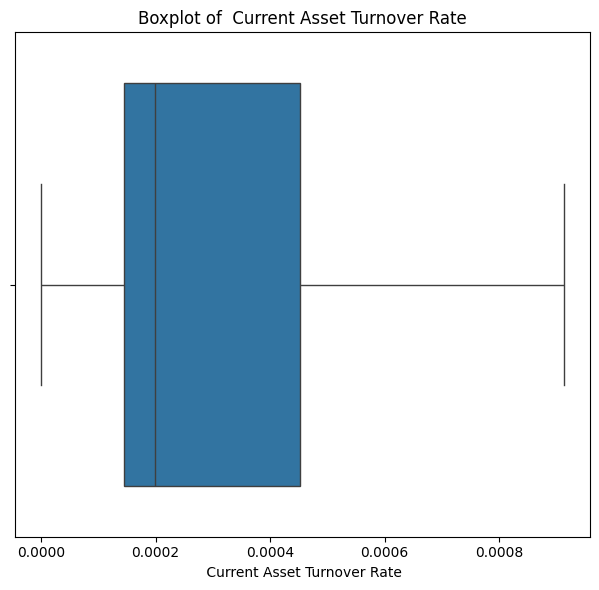

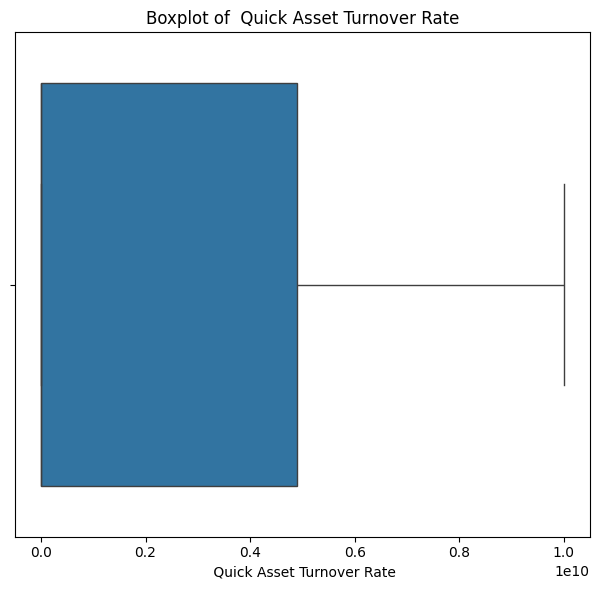

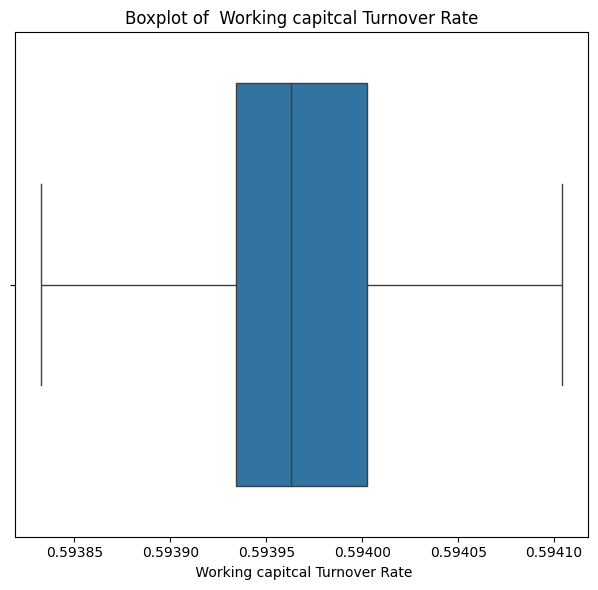

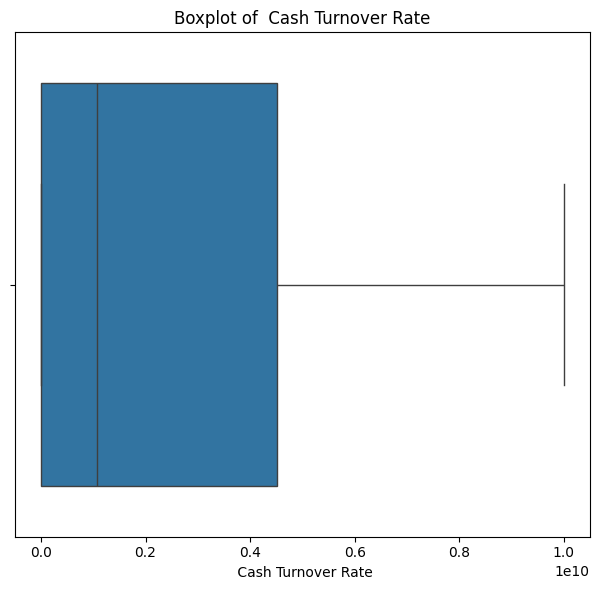

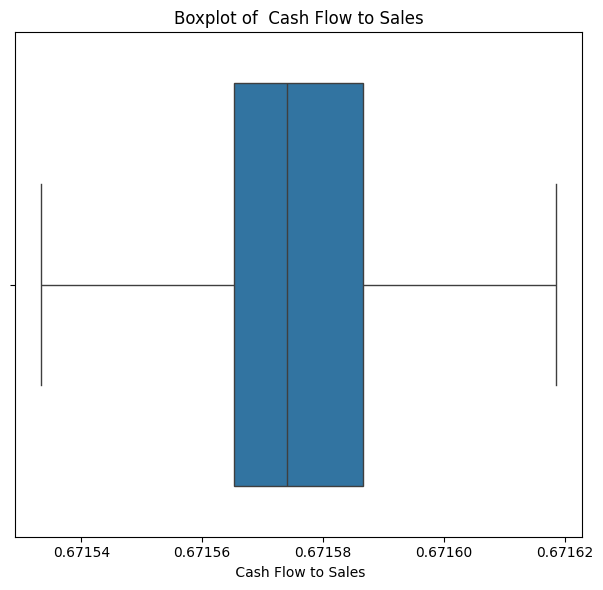

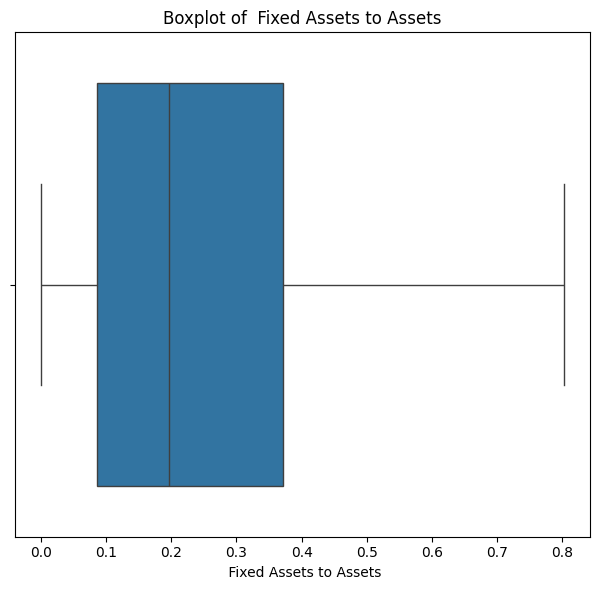

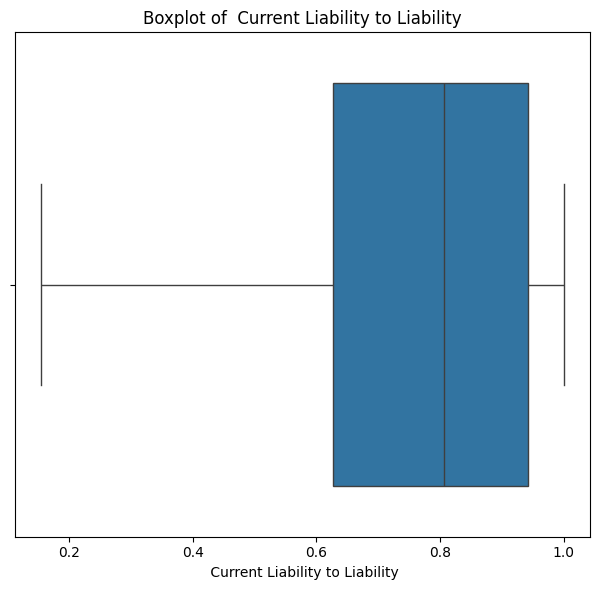

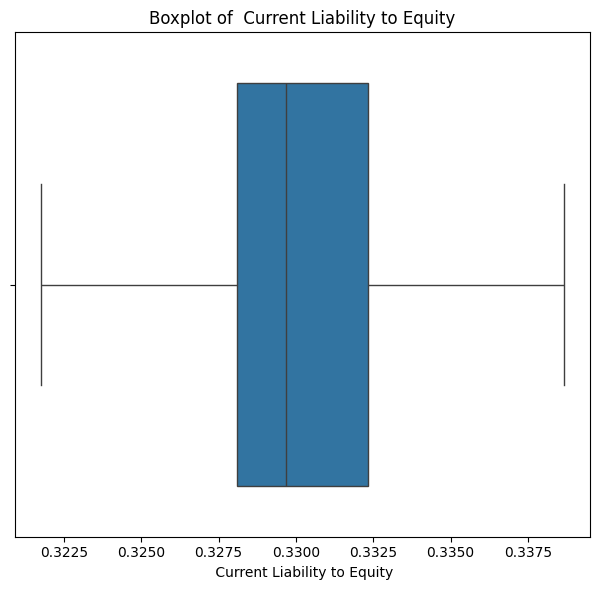

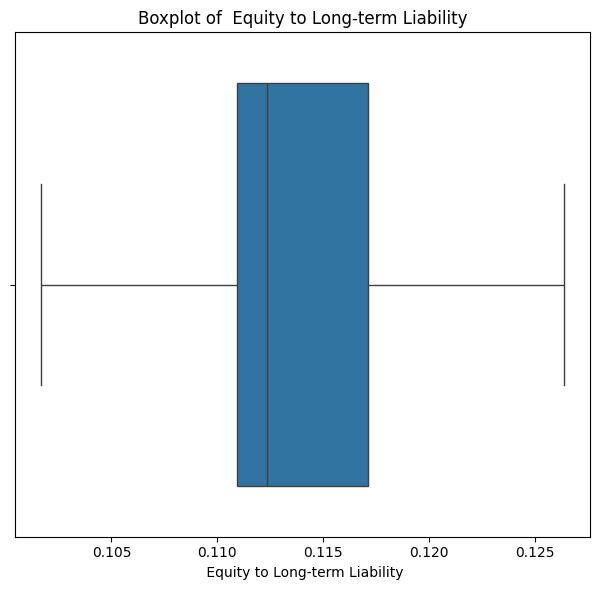

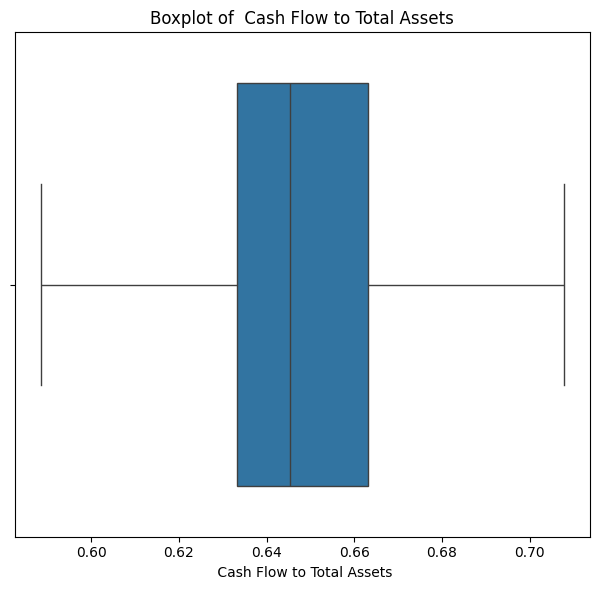

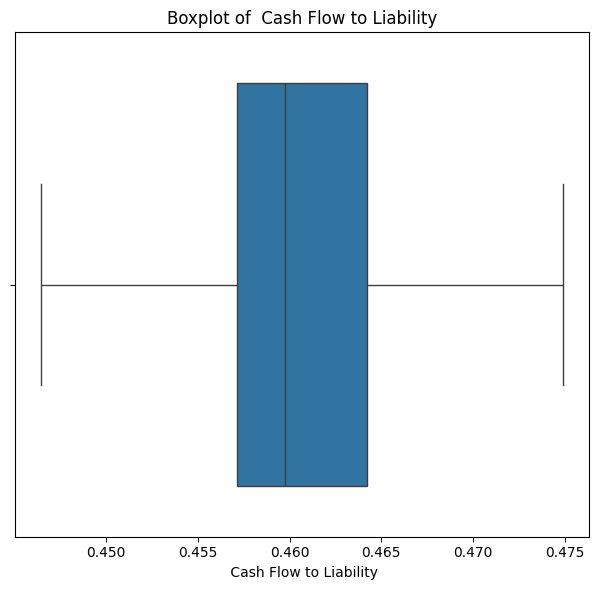

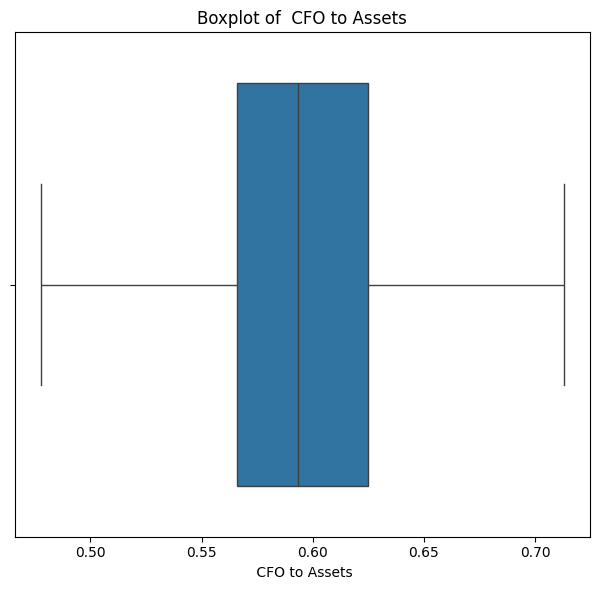

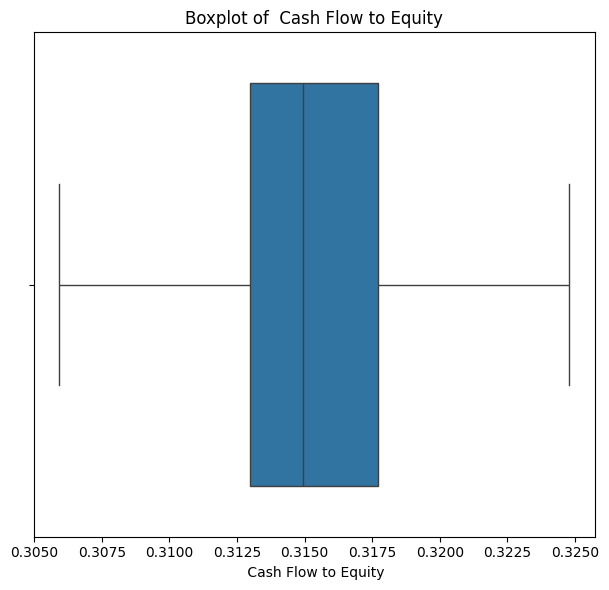

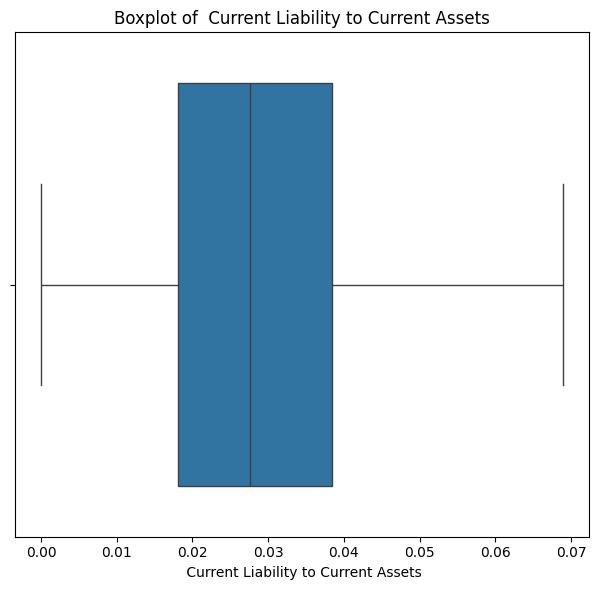

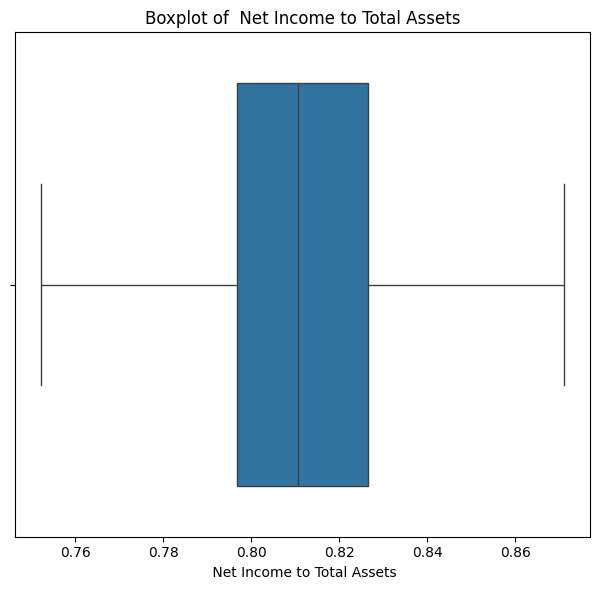

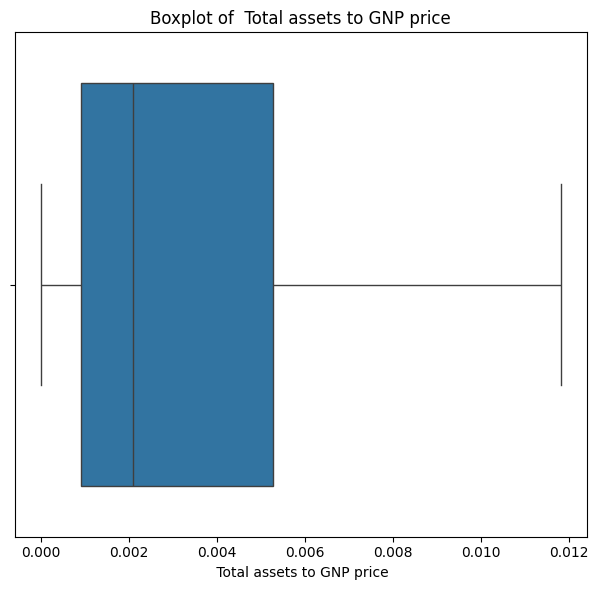

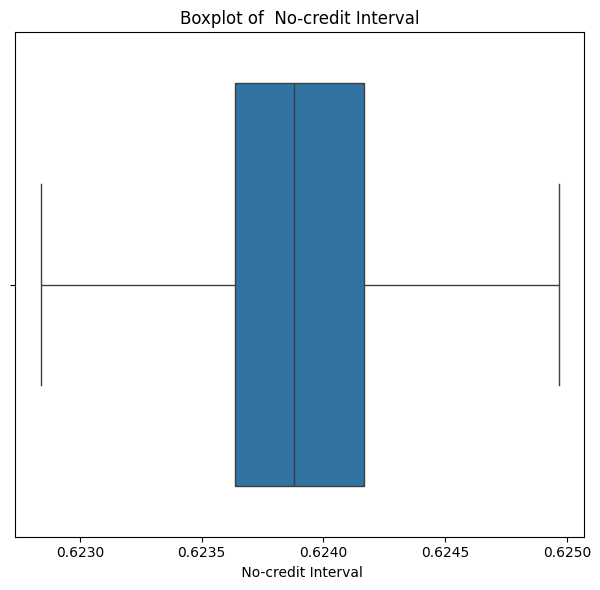

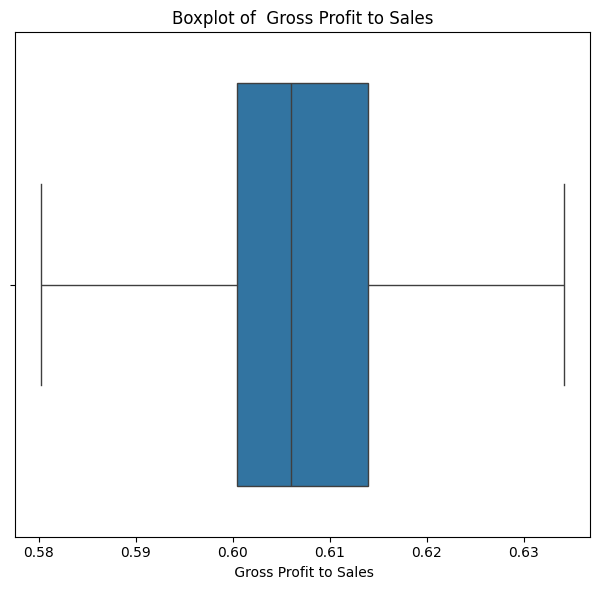

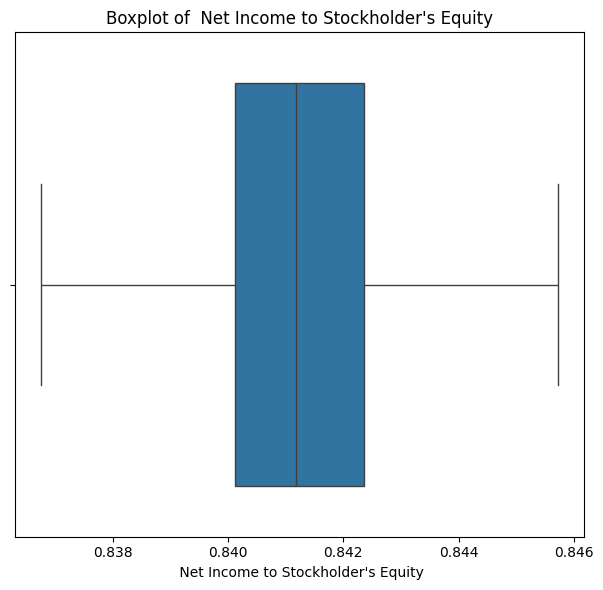

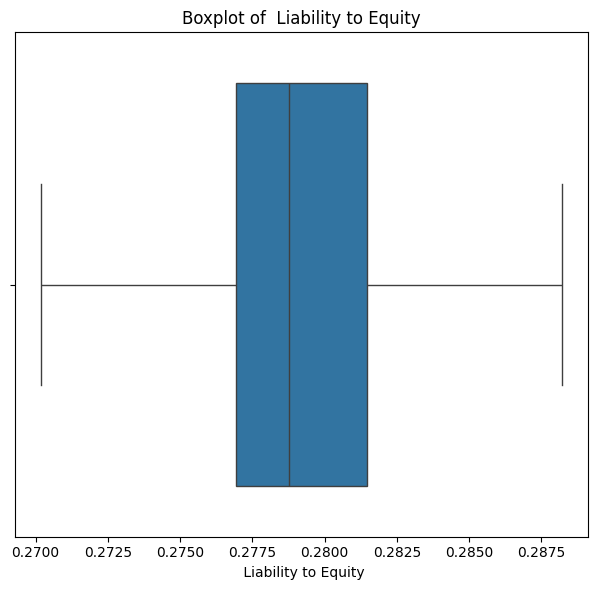

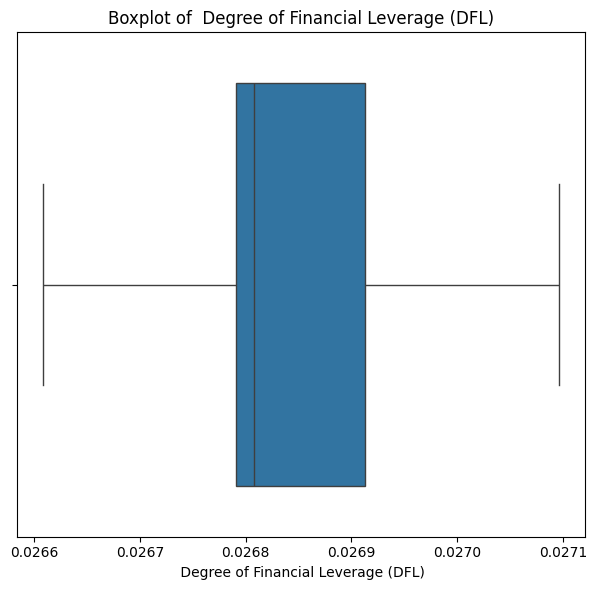

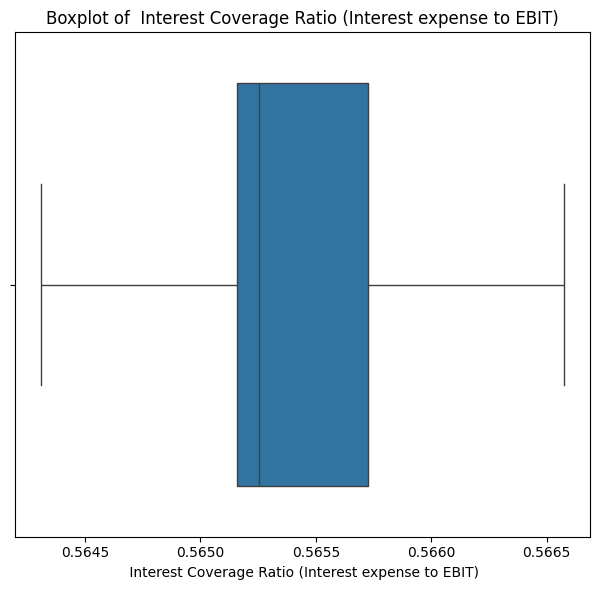

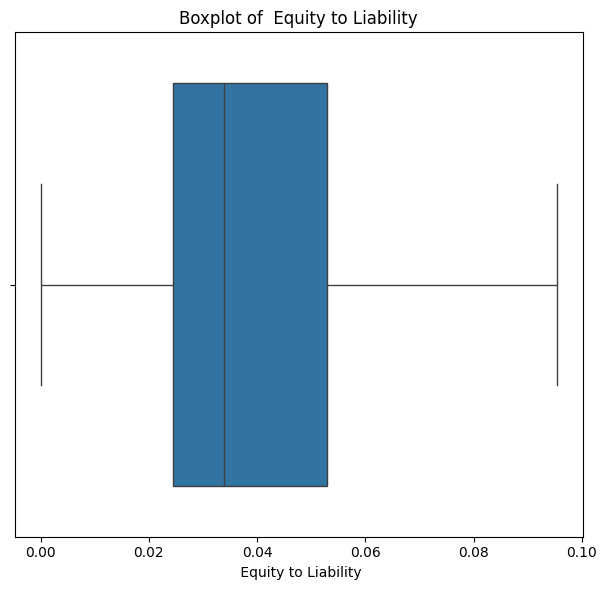

In [102]:
for col in columns:
    plt.figure(figsize=(12, 6))
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

    # we replaced all outliers with lower and upper bond

In [103]:
from scipy.stats import ttest_ind

# Hypothesis testing for feature selection
significant_features = []
for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'Bankrupt?':
        bankrupt = df[df['Bankrupt?'] == 1][column]          # seperated bankrupted data
        non_bankrupt = df[df['Bankrupt?'] == 0][column]       # seperated non bankrupted data
        t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)      # used two sample t test to check significant differece between two features
        if p_val < 0.05:        # if null hypothesis is rejected select that column
            significant_features.append(column)    # added columns in list
        print(f'{column}: t-statistic={t_stat}, p-value={p_val}')

print(f'Significant features: {len(significant_features)}')  # total no of columns who reject null hypothesis  {87}

significant_features.append('Bankrupt?')    # appeded bankrupt column in list

# if significance difference is present in the column then we can separate bankrupted and non bankrupted data

 ROA(C) before interest and depreciation before interest: t-statistic=-20.371000246550334, p-value=1.3480464196848798e-89
 ROA(A) before interest and % after tax: t-statistic=-20.36708962978169, p-value=1.453424003163958e-89
 ROA(B) before interest and depreciation after tax: t-statistic=-20.59226229040652, p-value=1.867512034084068e-91
 Operating Gross Margin: t-statistic=-11.677652430250529, p-value=3.2823739125123346e-31
 Realized Sales Gross Margin: t-statistic=-11.61220032059553, p-value=6.967922607227421e-31
 Operating Profit Rate: t-statistic=-16.315267033012436, p-value=9.863440509107752e-59
 Pre-tax net Interest Rate: t-statistic=-20.235075270990965, p-value=1.8306696788047566e-88
 After-tax net Interest Rate: t-statistic=-20.365632811201365, p-value=1.4947479061257782e-89
 Non-industry income and expenditure/revenue: t-statistic=-18.132844472521544, p-value=8.370733607811912e-72
 Continuous interest rate (after tax): t-statistic=-21.189549801114605, p-value=1.4678863402201738

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# null hypothesis : The mean of the feature is the same for bankrupt and non-bankrupt companies.
# alternate hypothesis : The mean of the feature is different for bankrupt and non-bankrupt companies.
# data is divided into two parts bankrupt and non bankrupt and then applied 2 sample t-test to check significance differance
# if both features mean are different then we can select that features so we can identify diff between bankrupt and non-bankrupt

In [ ]:
data = df[significant_features]   # feature selection    : select only relavent columns

In [74]:
columns=data.columns

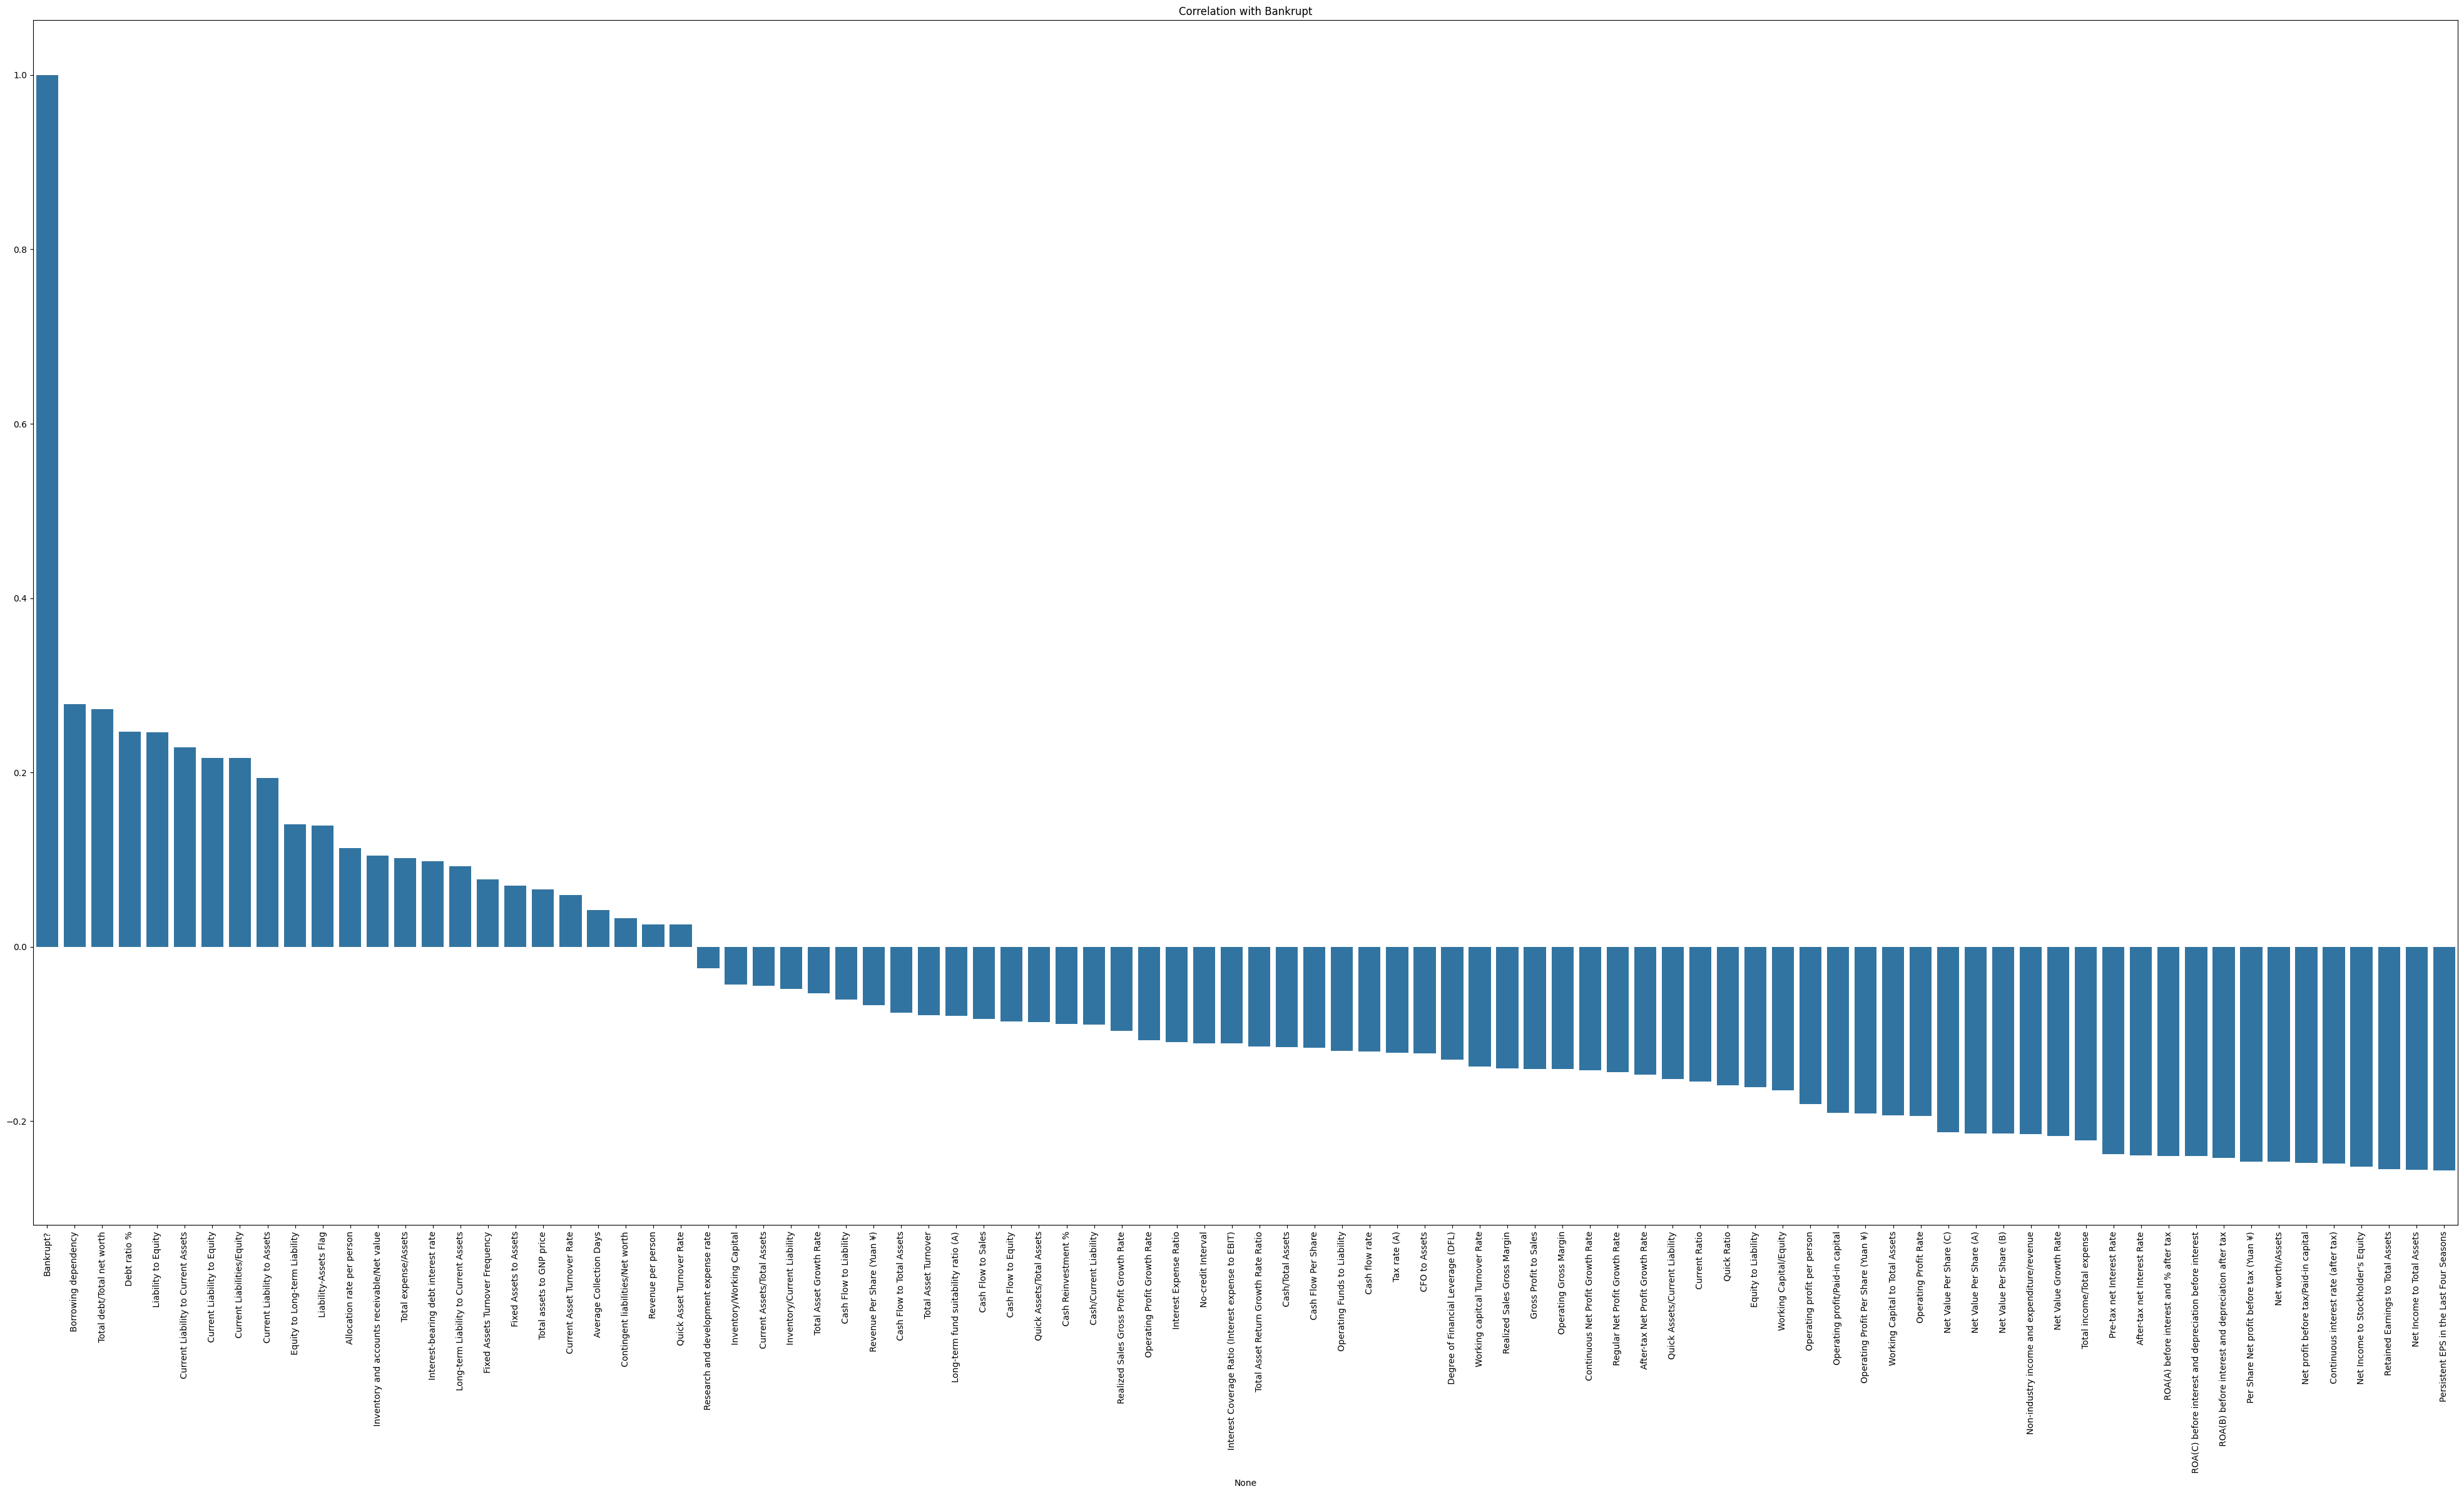

In [78]:
# Plot the correlations
plt.figure(figsize=(50, 25))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation with Bankrupt')
plt.show()

In [80]:
# aboue graph we can see the features correlation with target

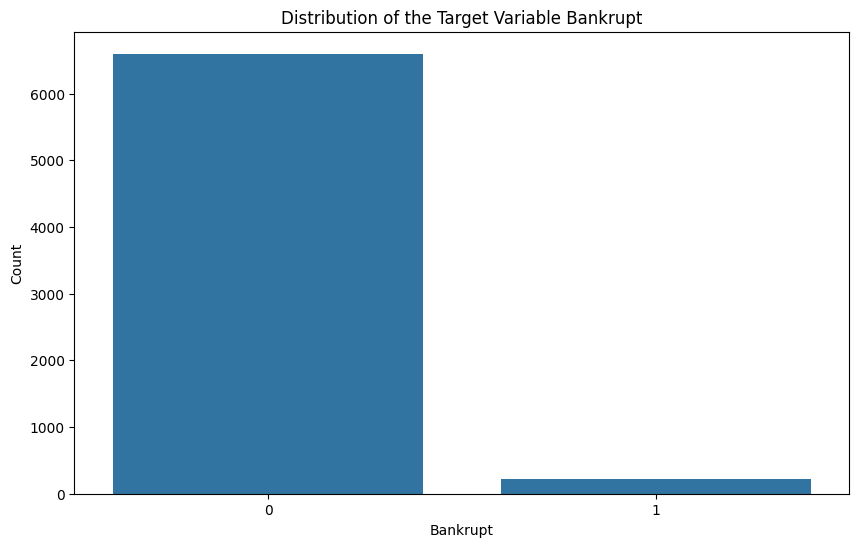

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of the Target Variable Bankrupt')
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.show()

In [ ]:
# we can see aboue plot our target column is imbalanced

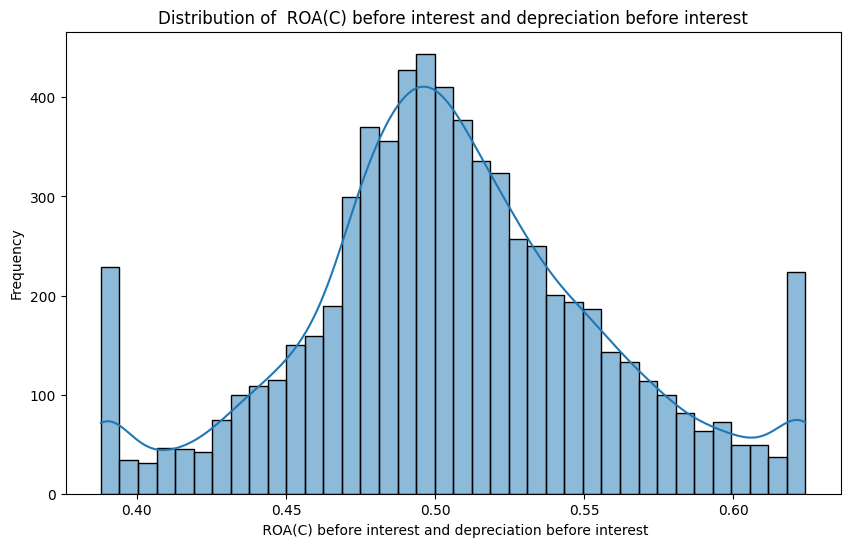

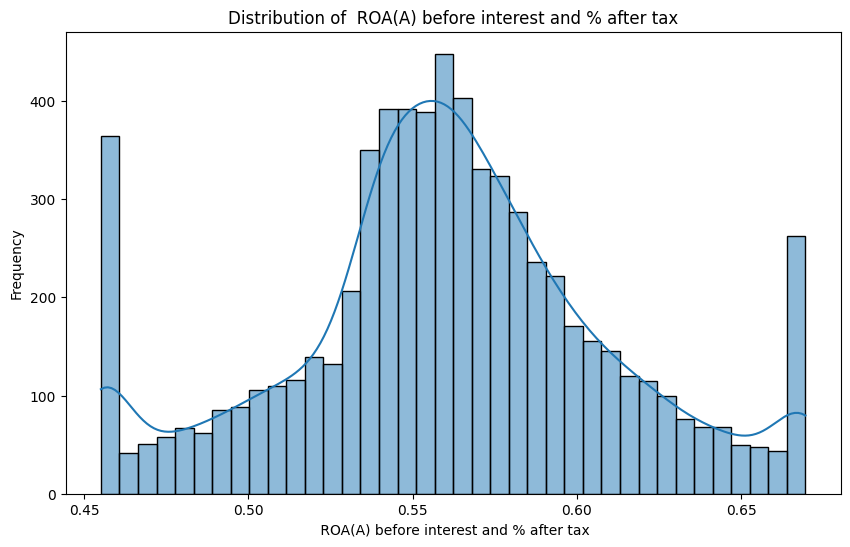

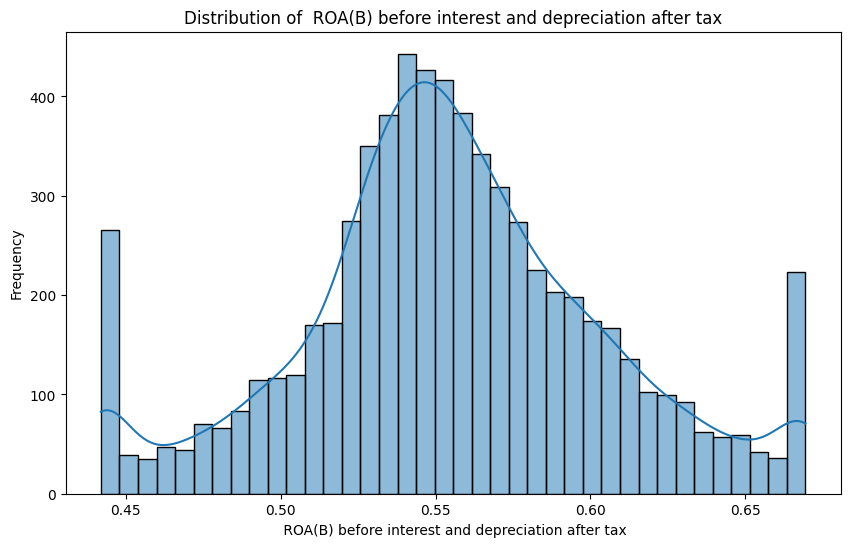

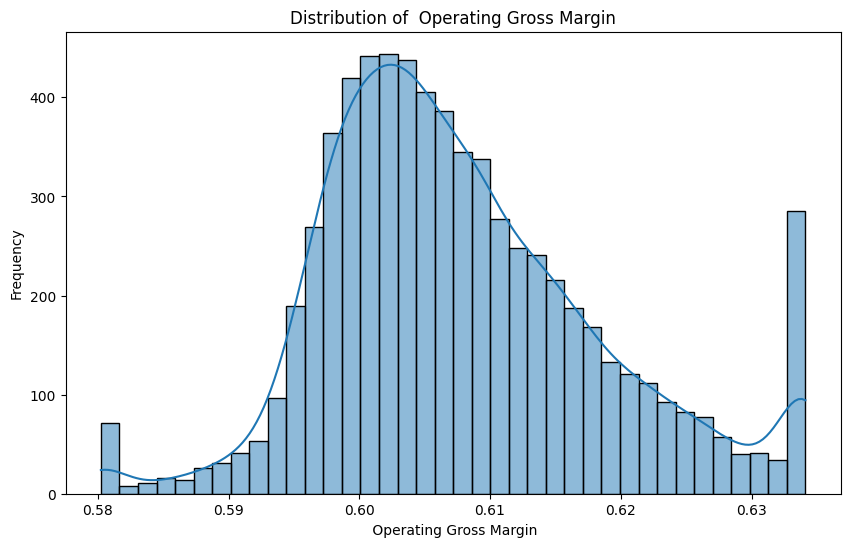

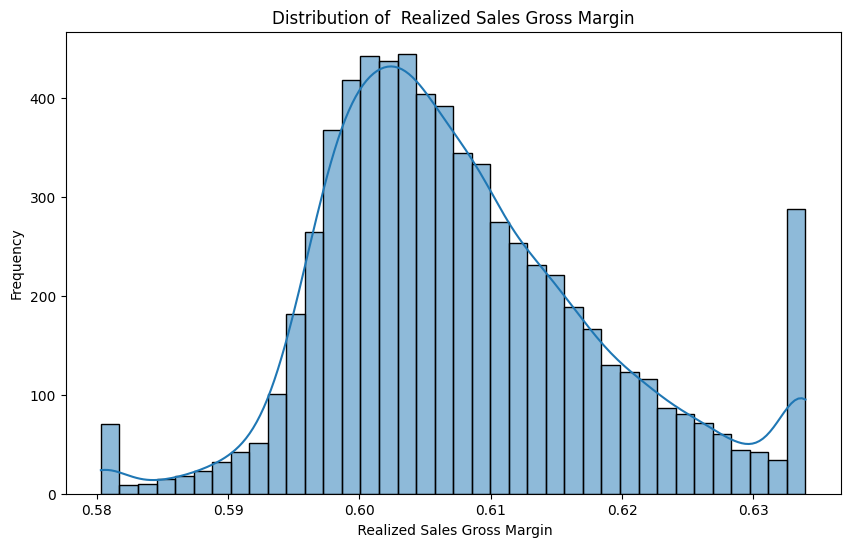

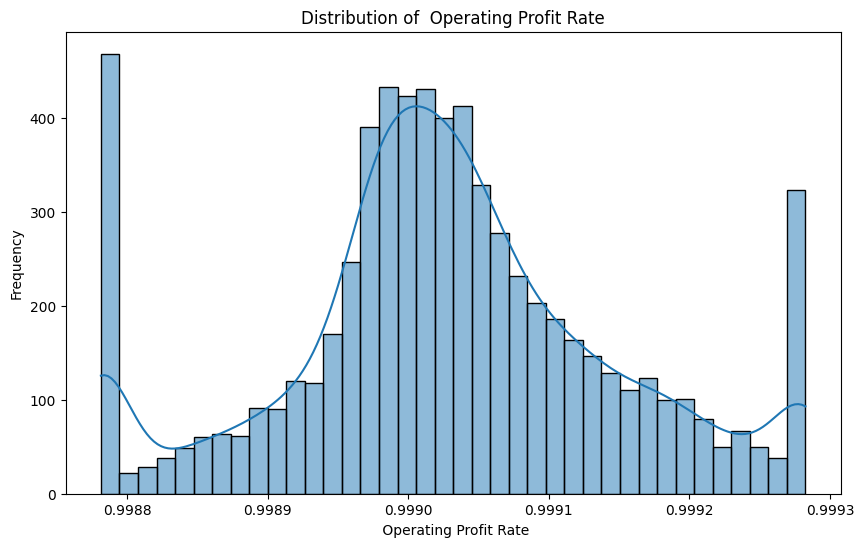

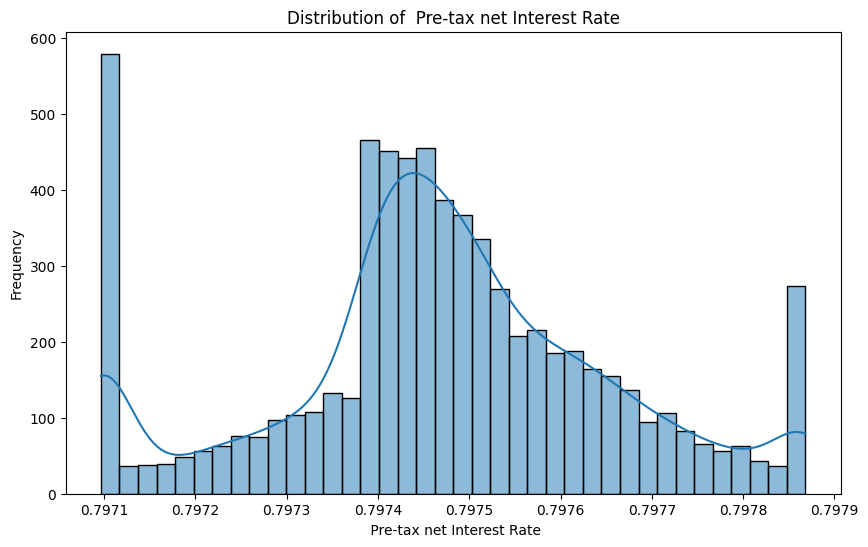

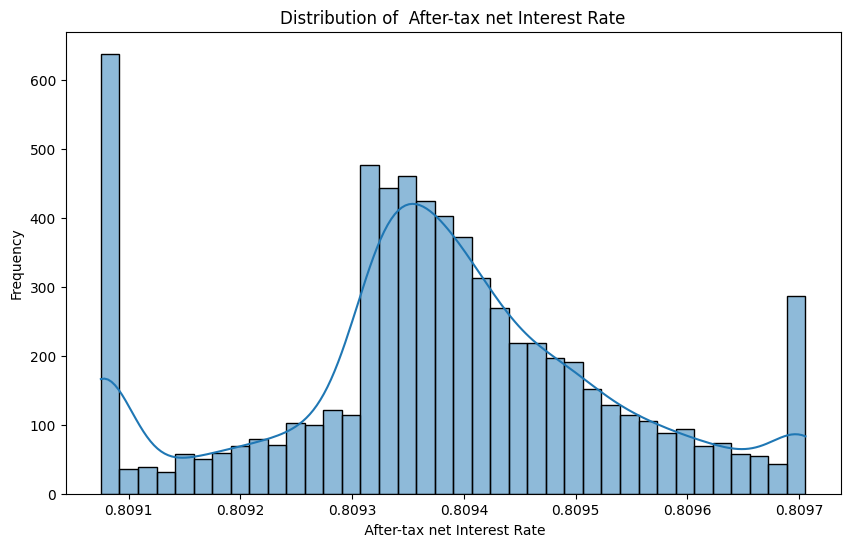

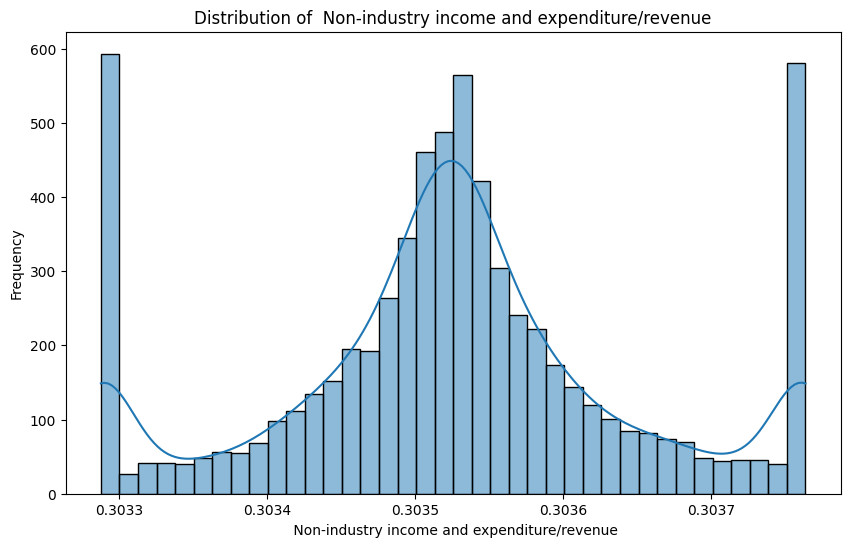

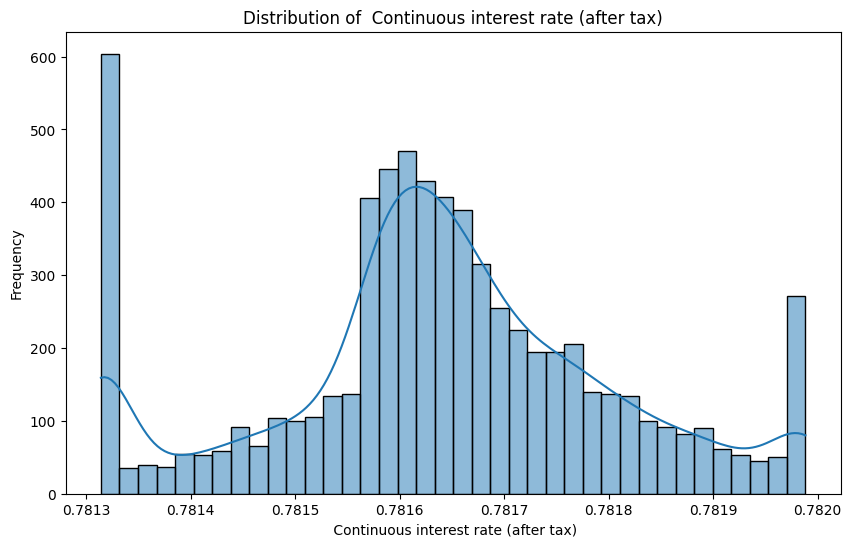

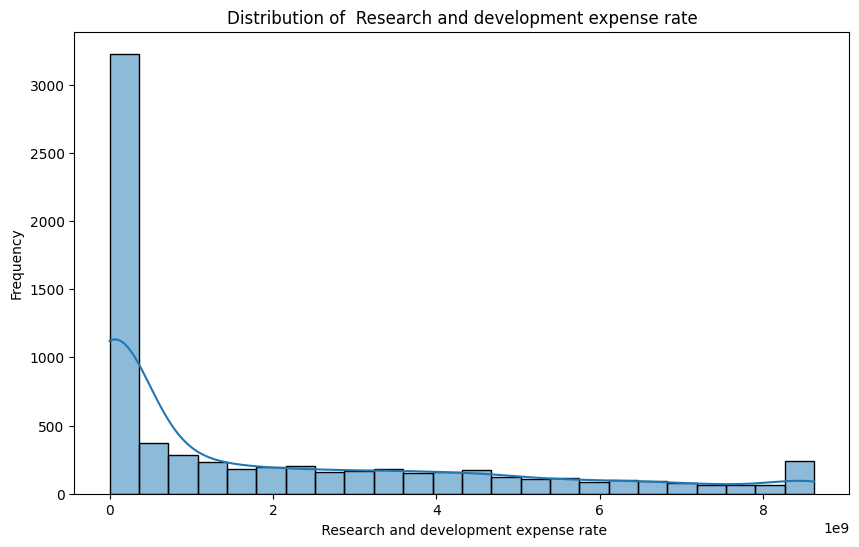

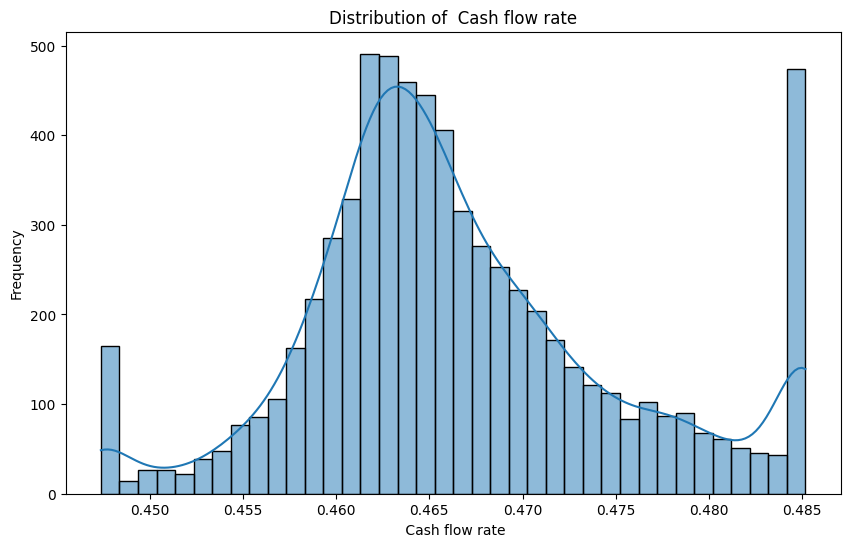

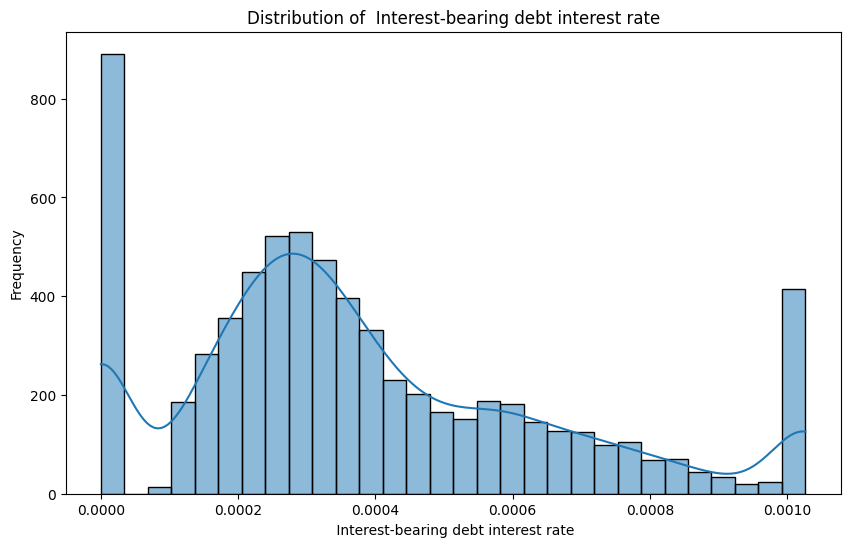

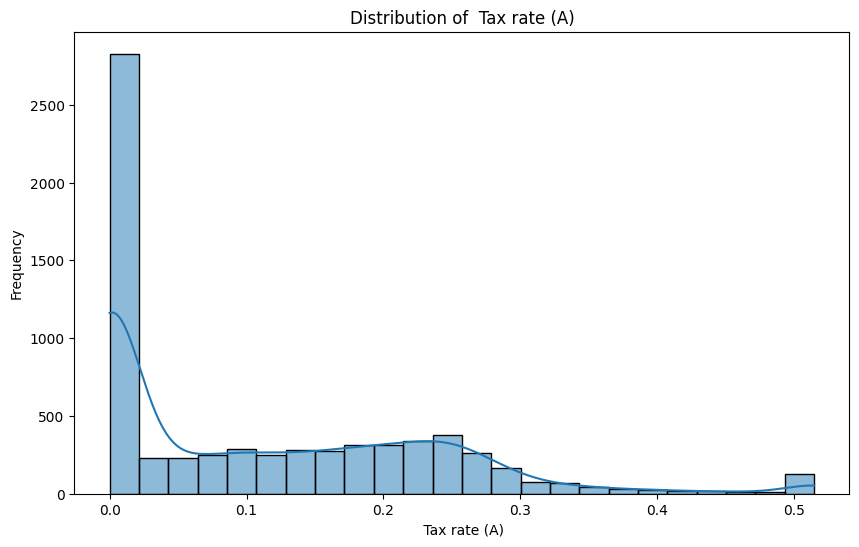

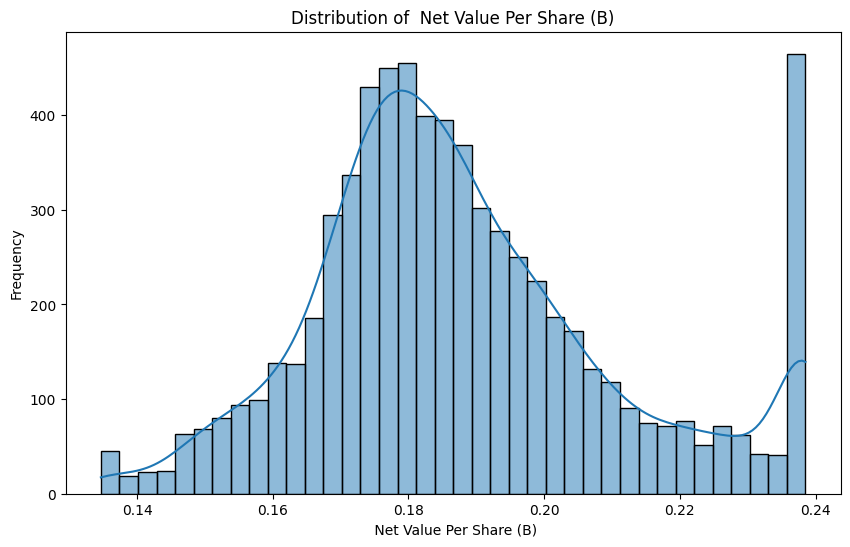

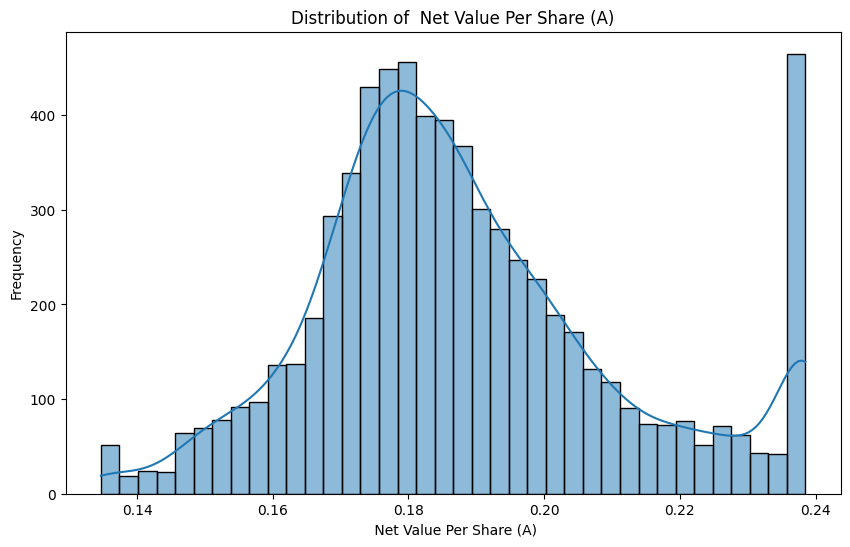

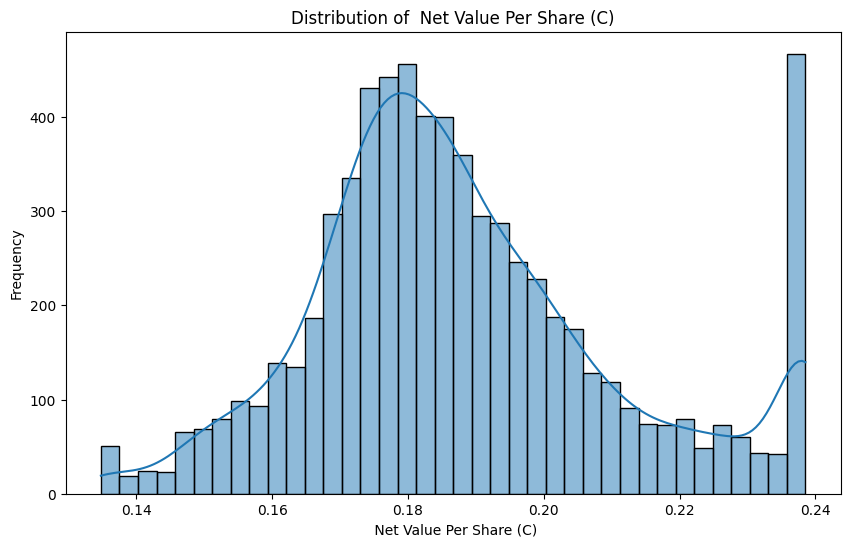

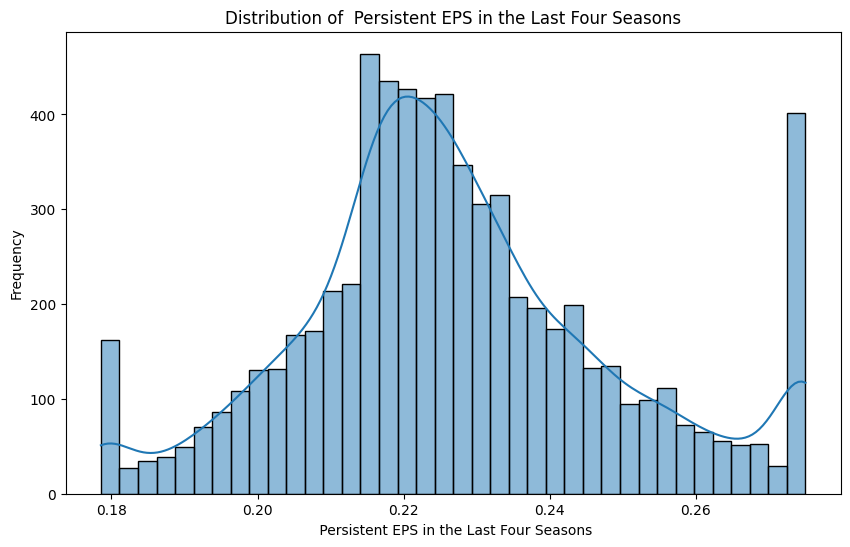

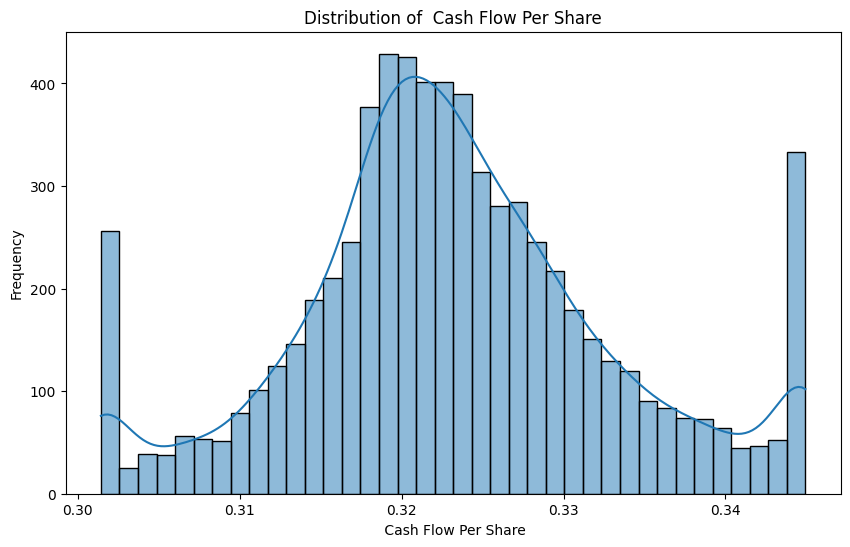

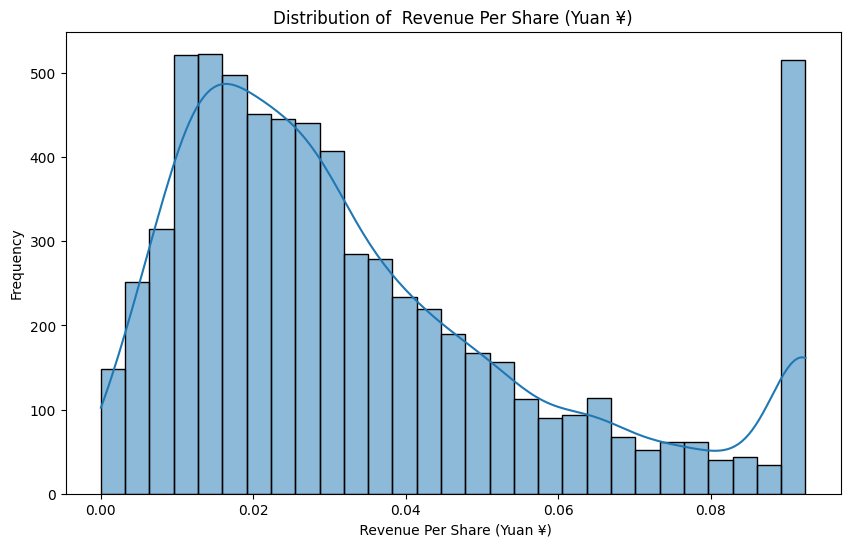

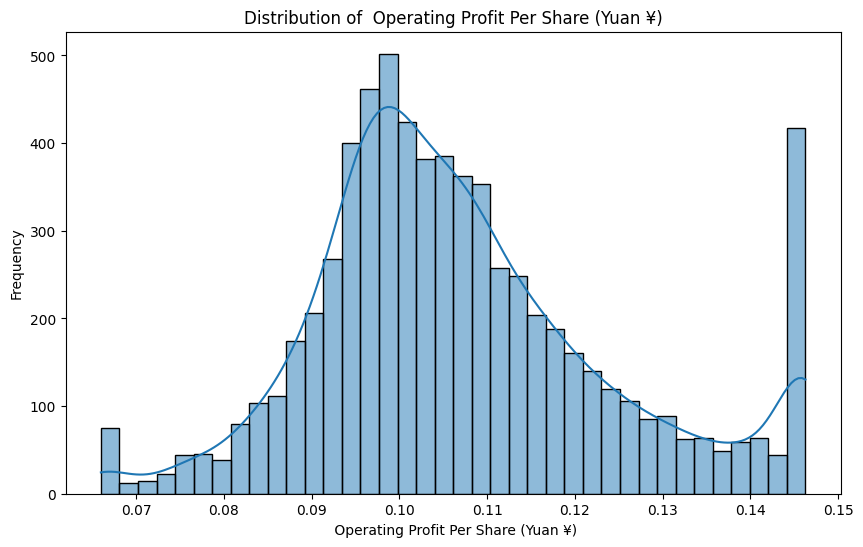

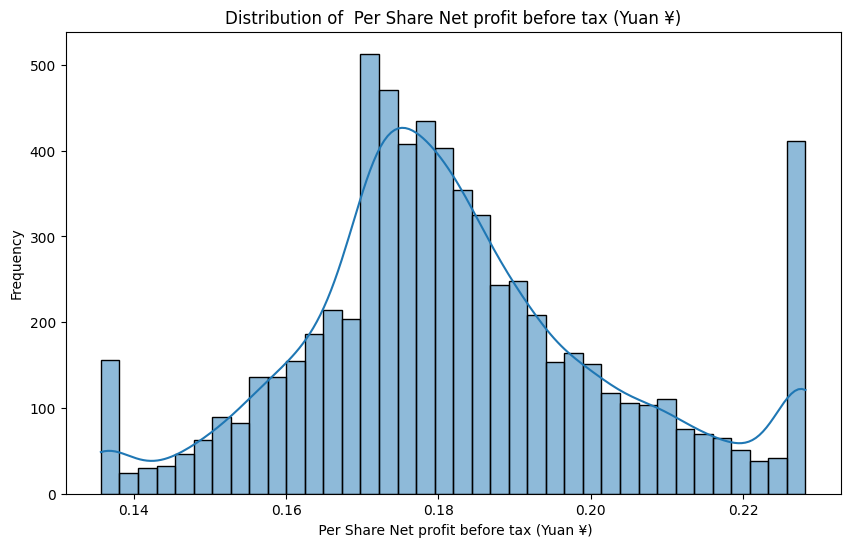

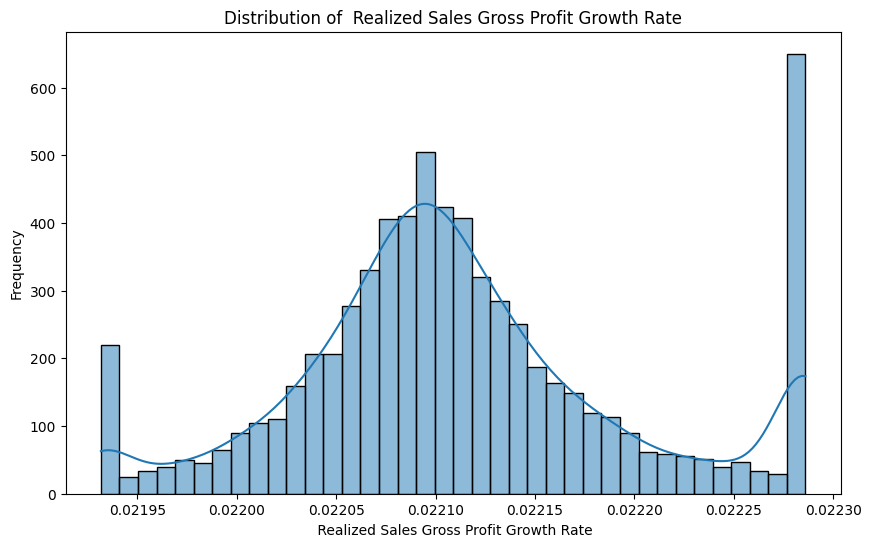

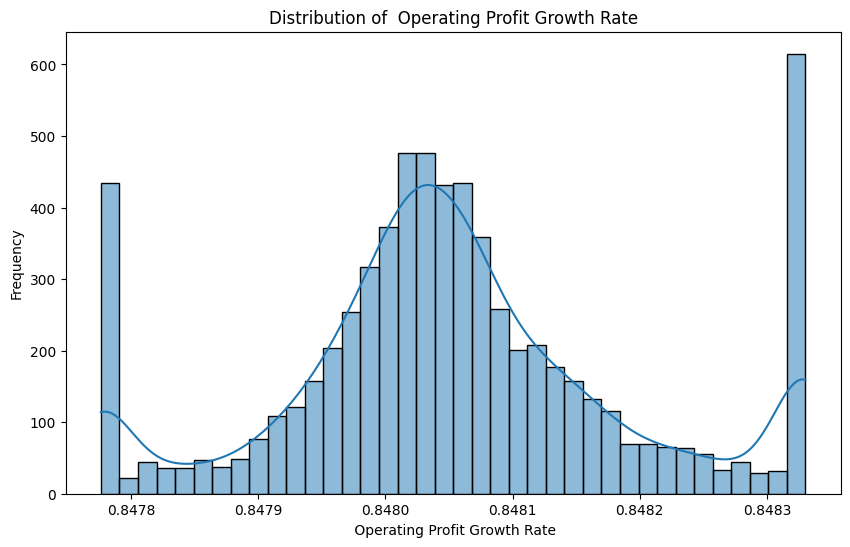

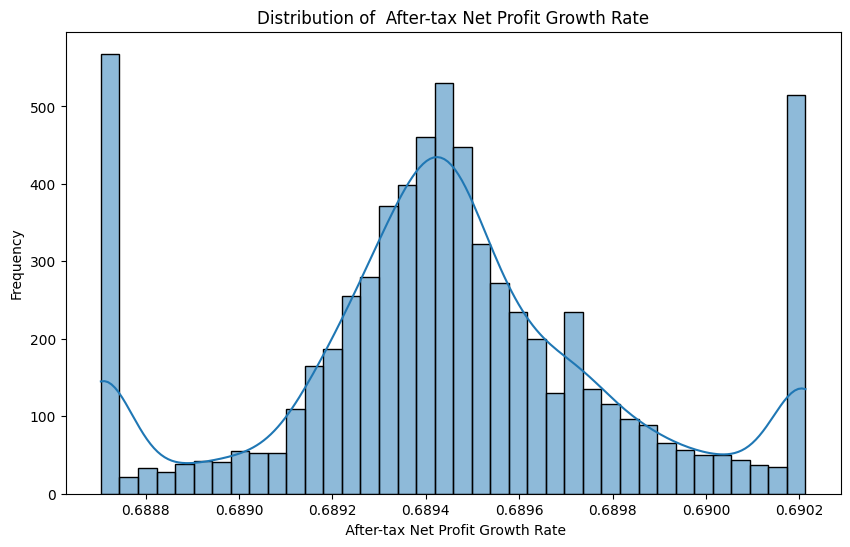

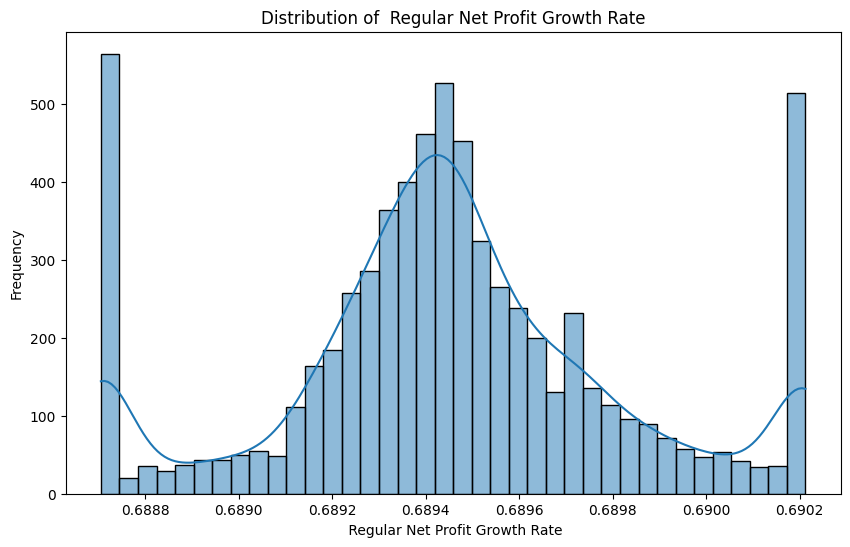

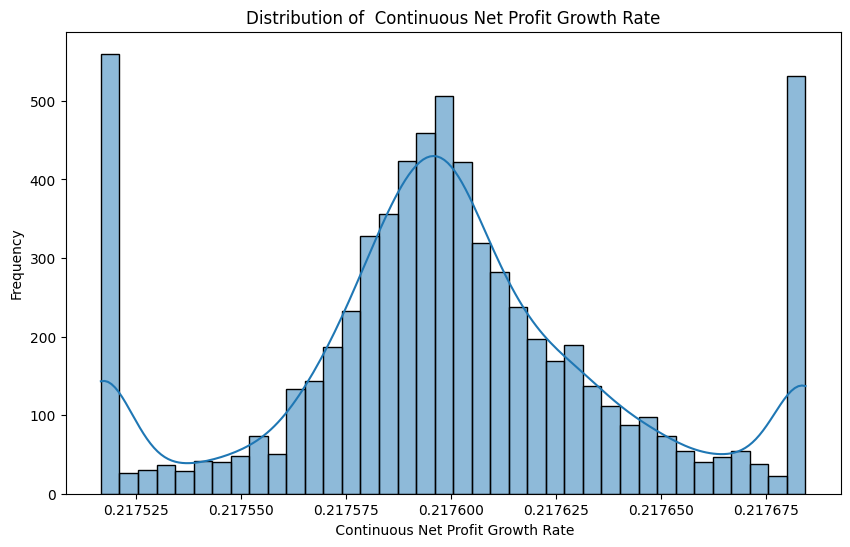

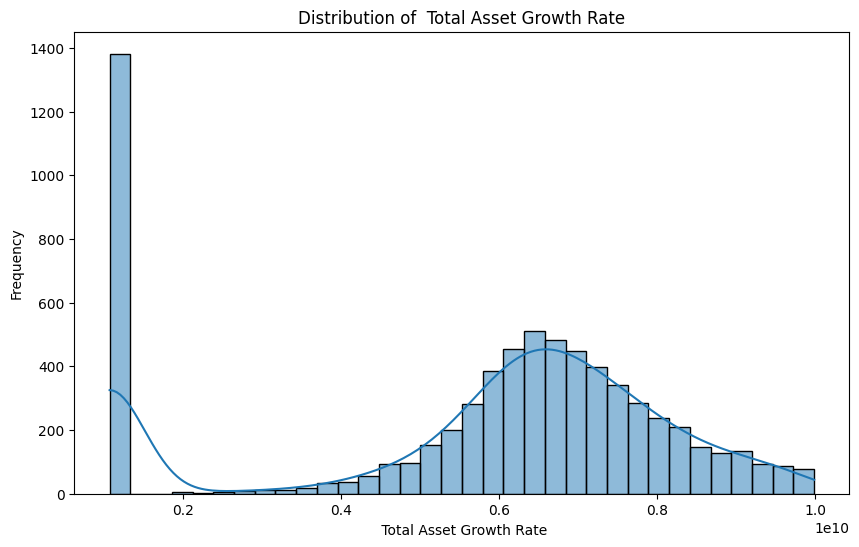

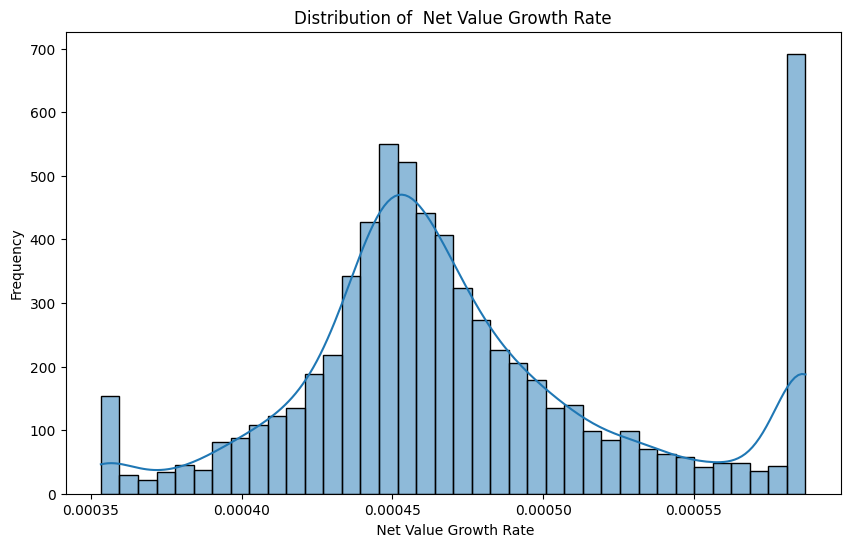

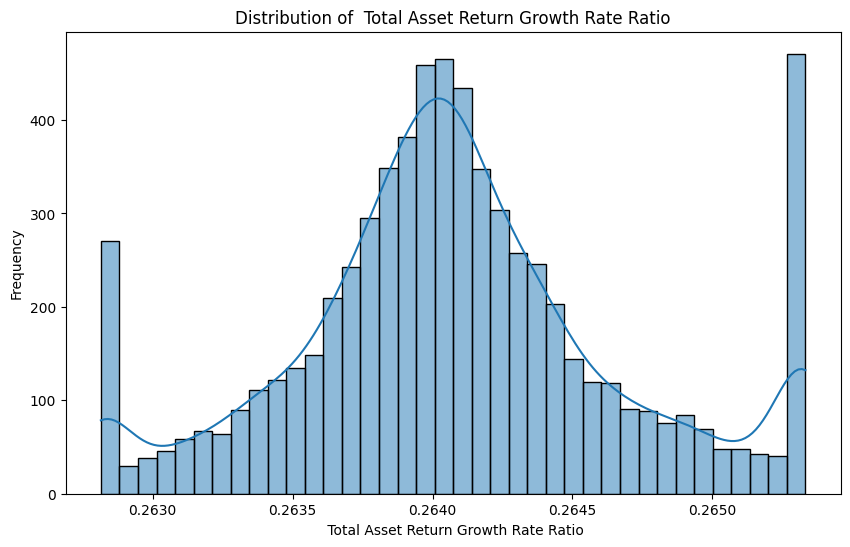

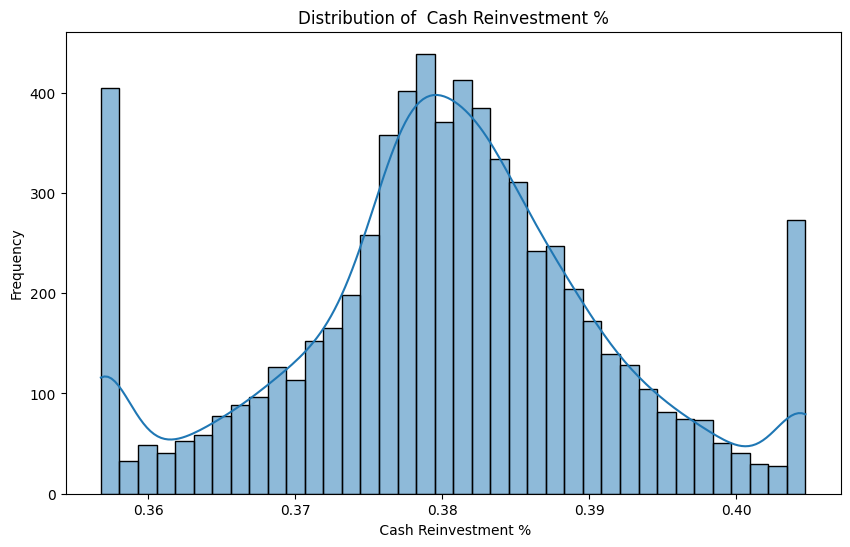

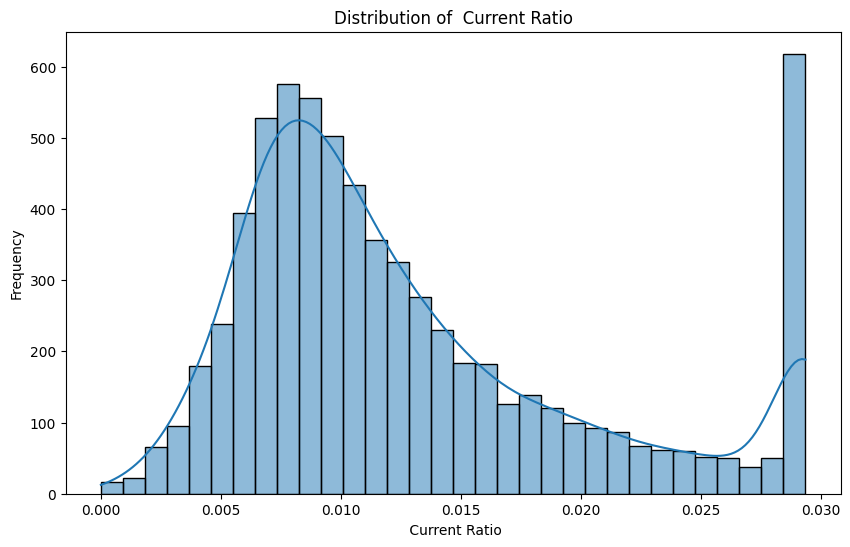

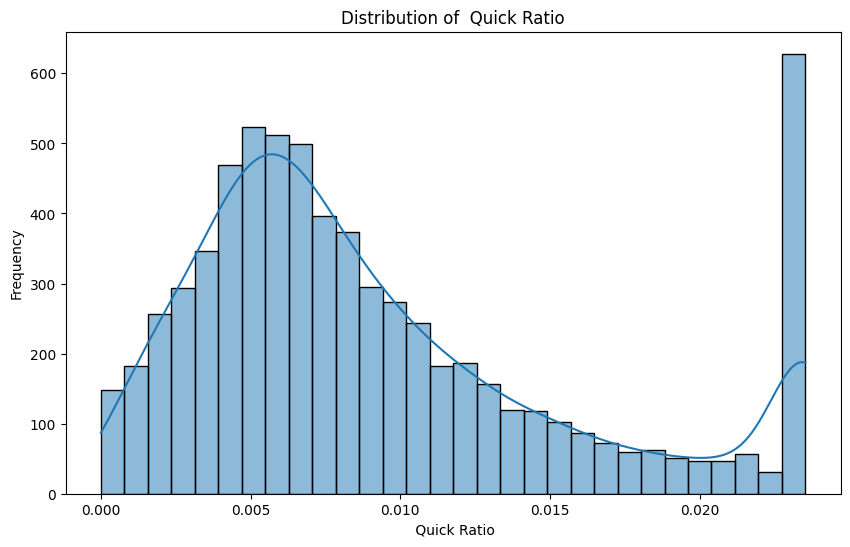

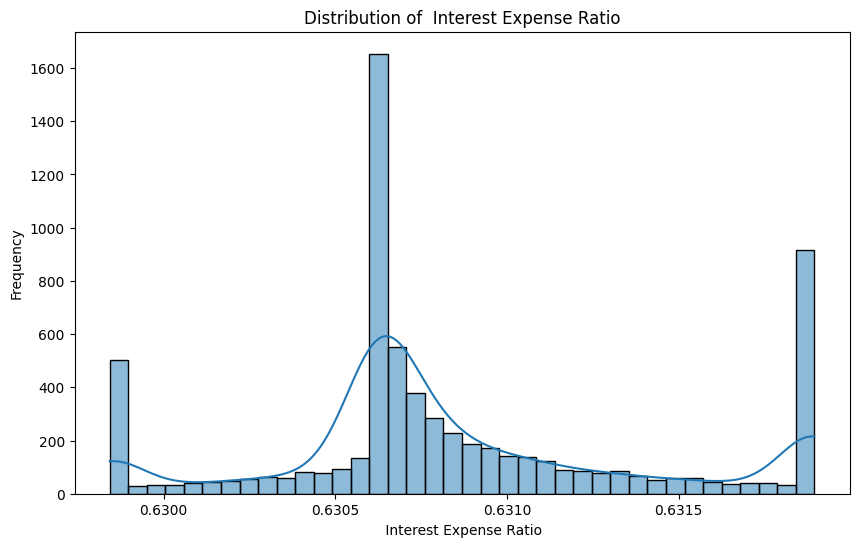

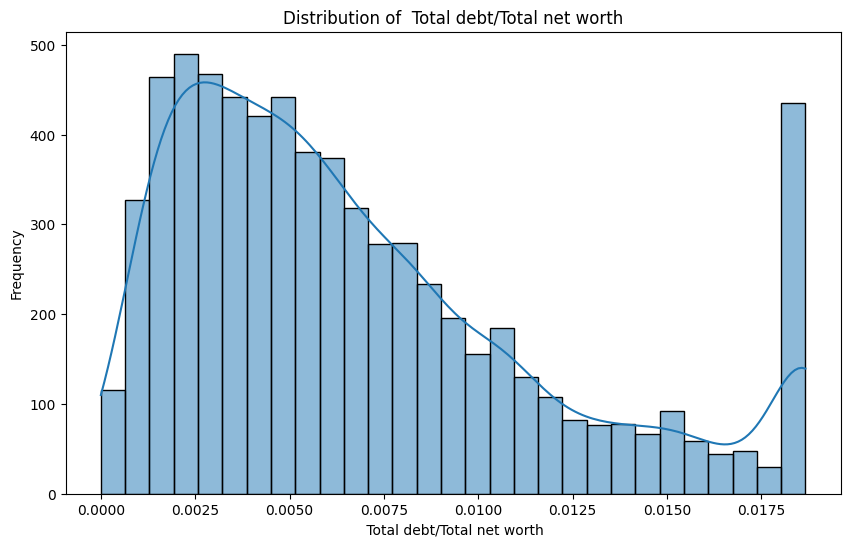

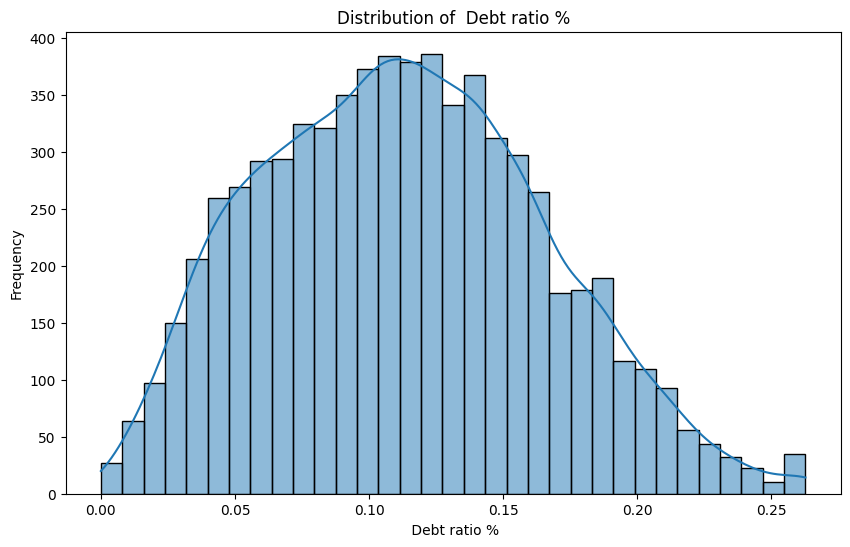

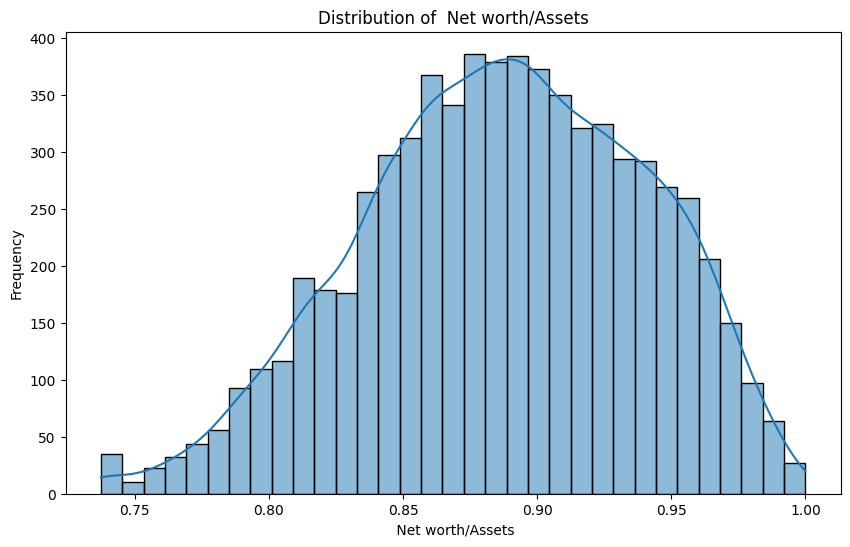

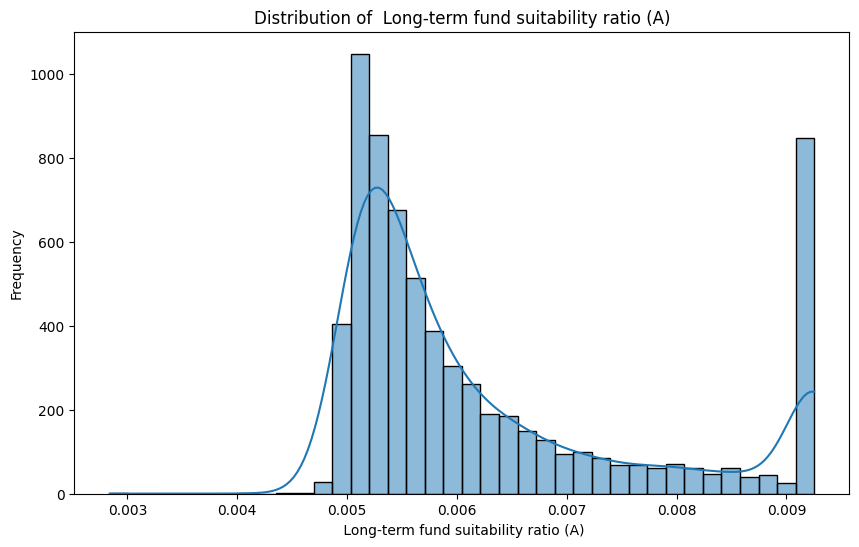

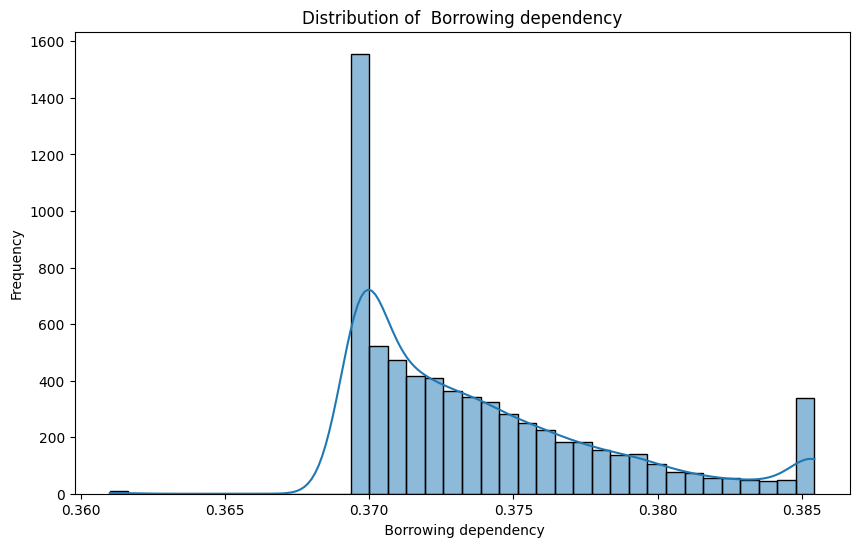

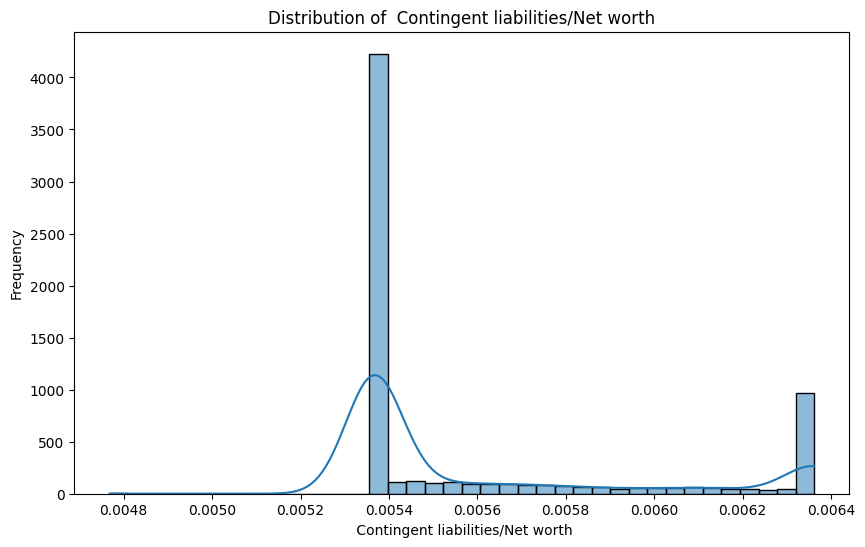

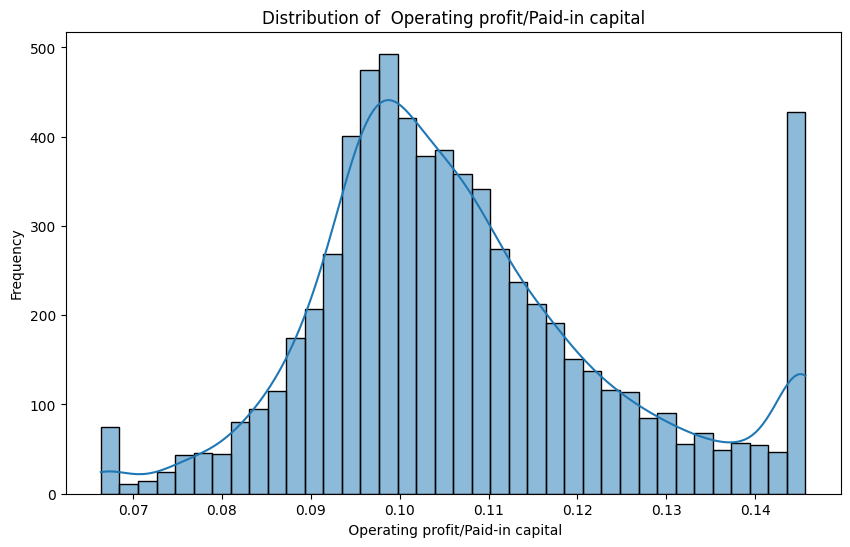

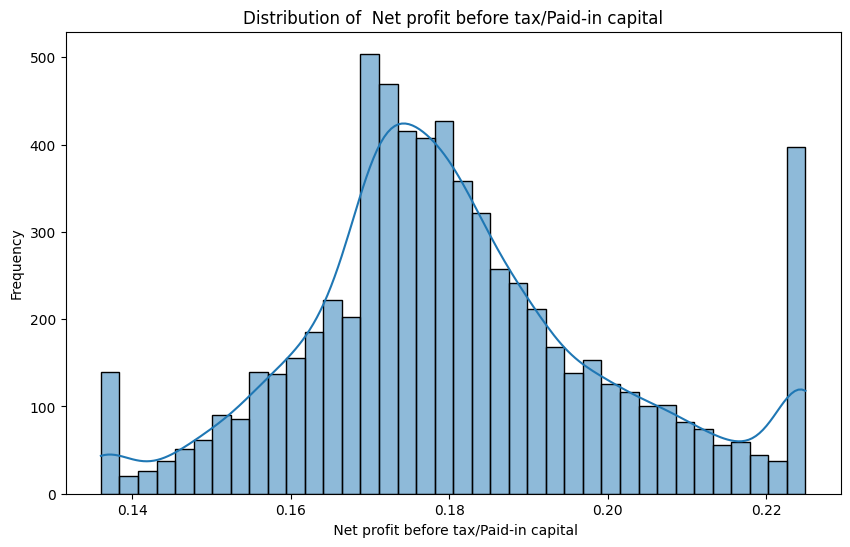

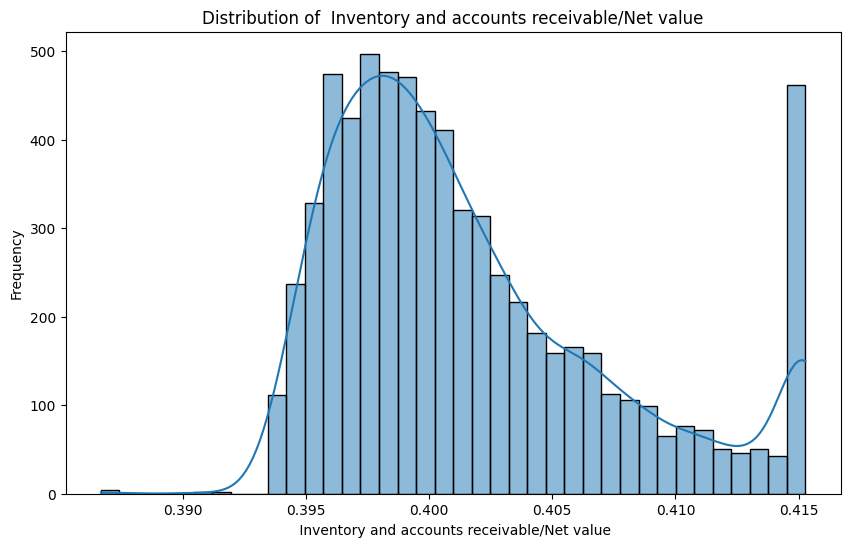

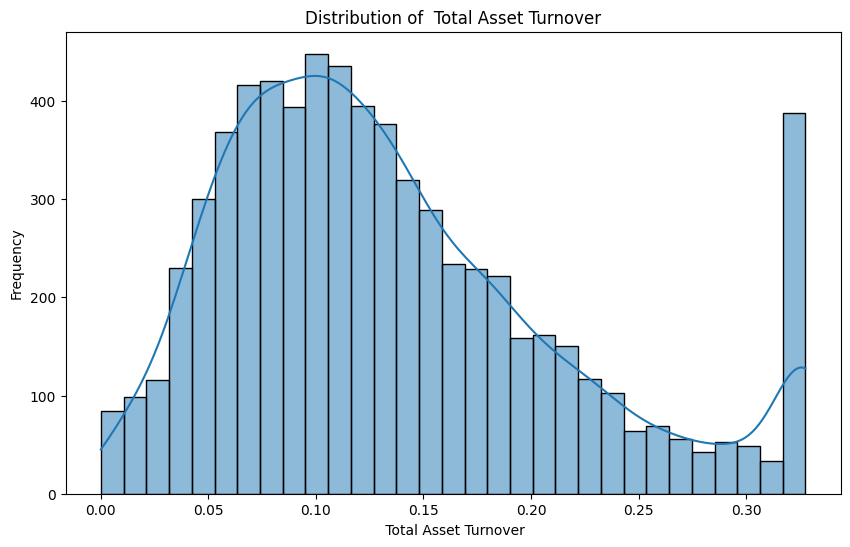

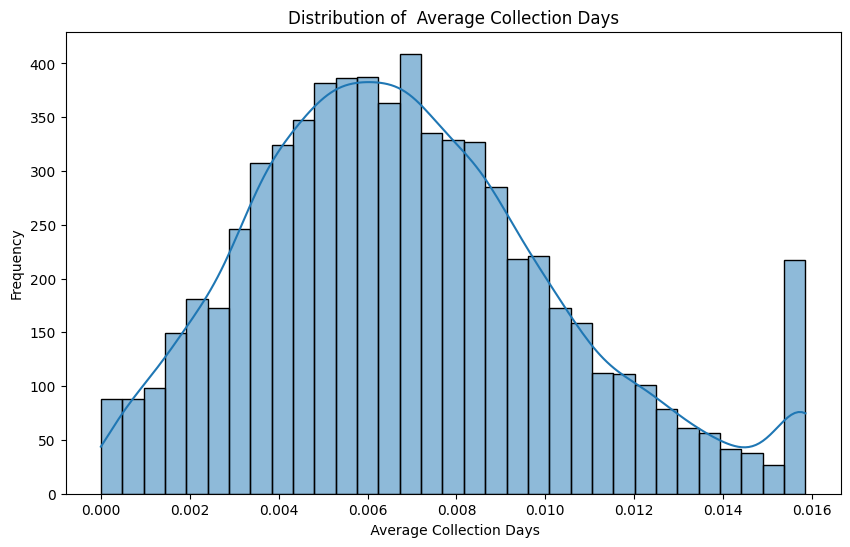

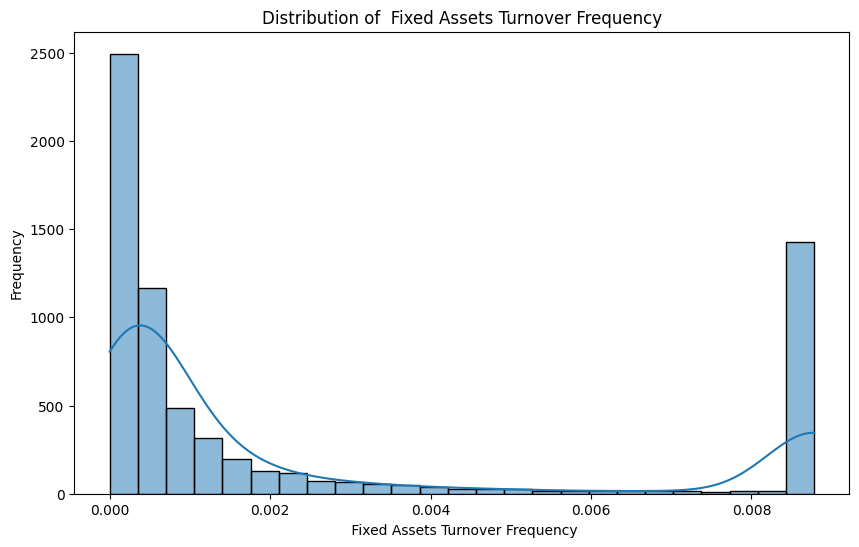

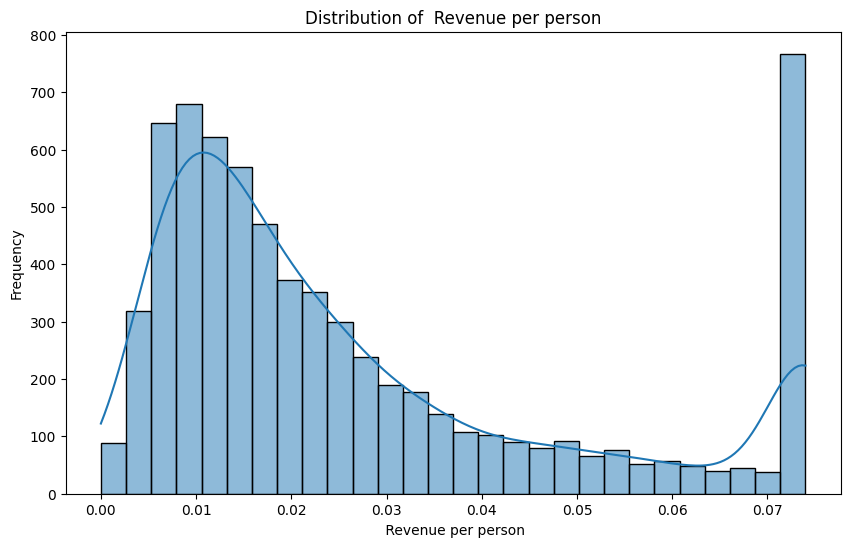

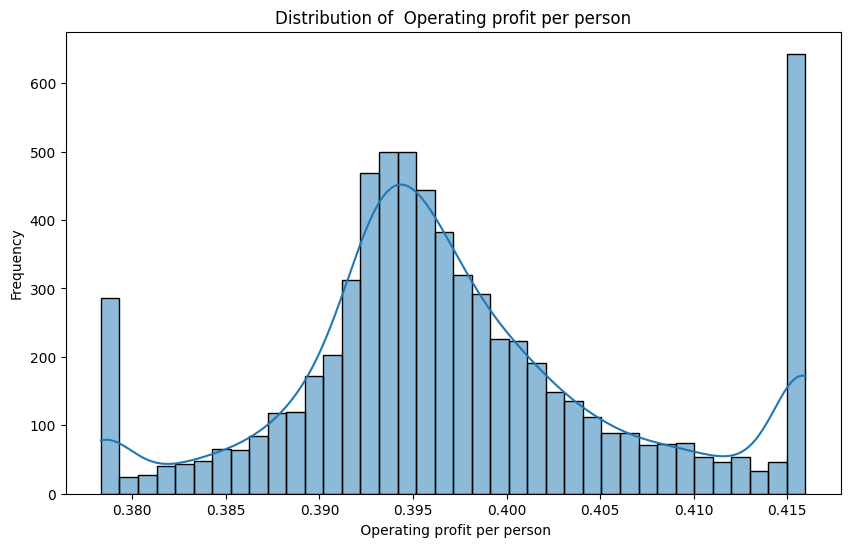

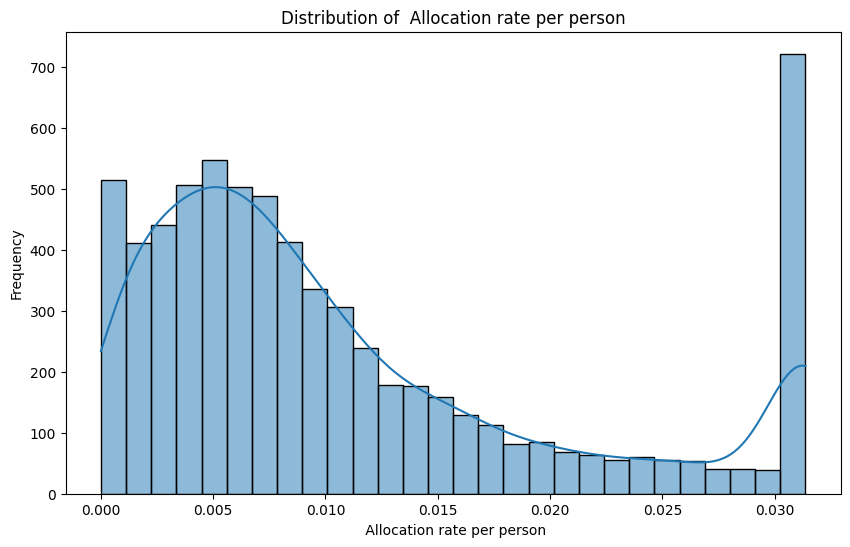

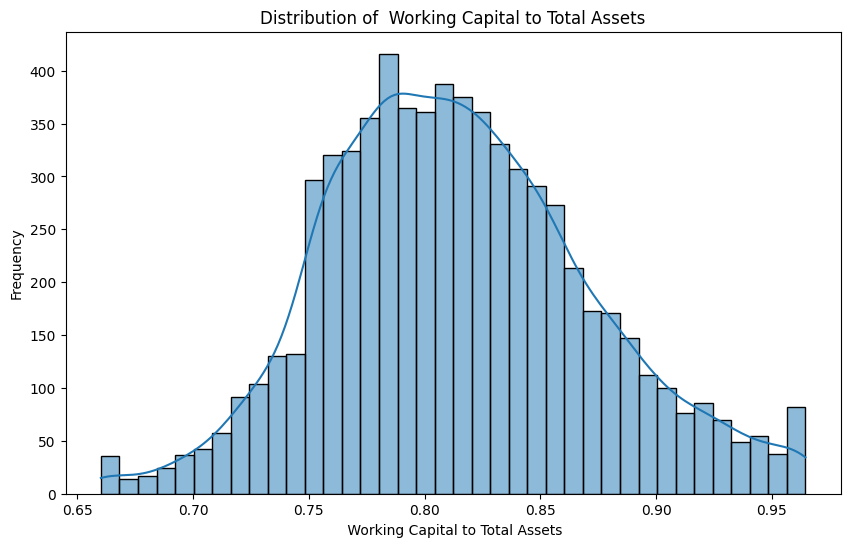

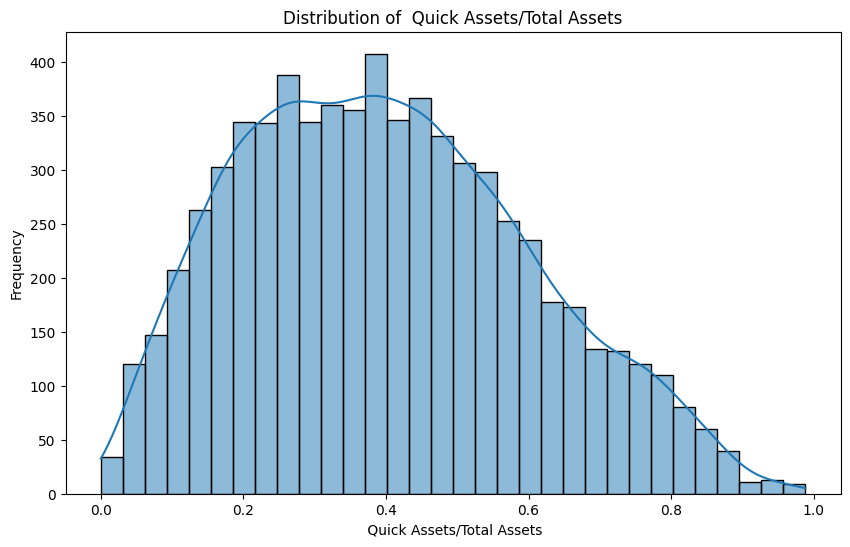

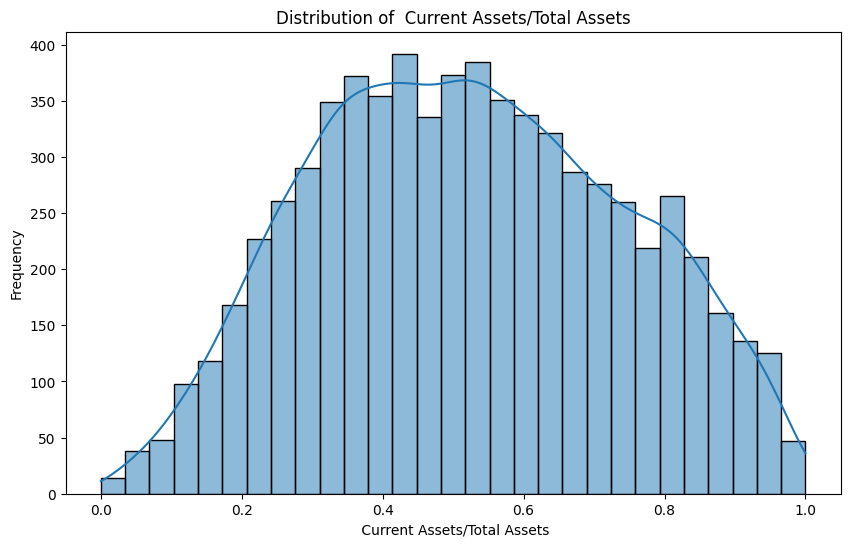

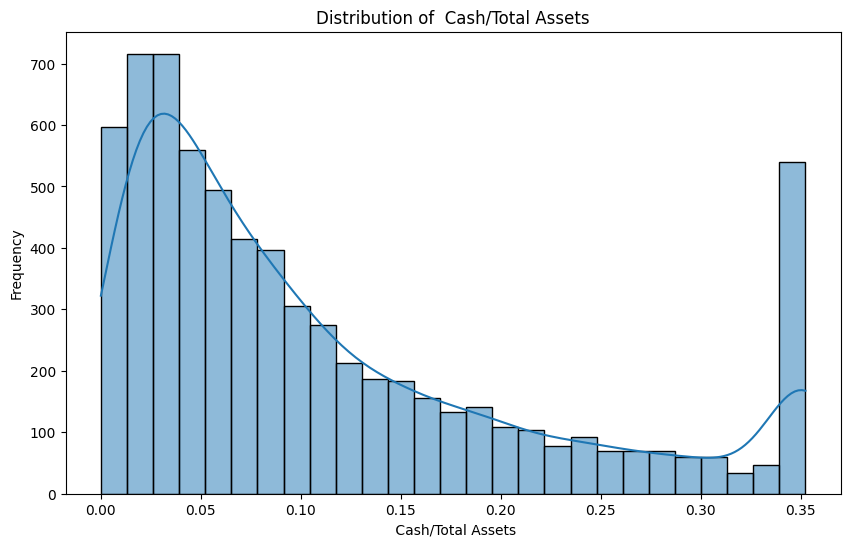

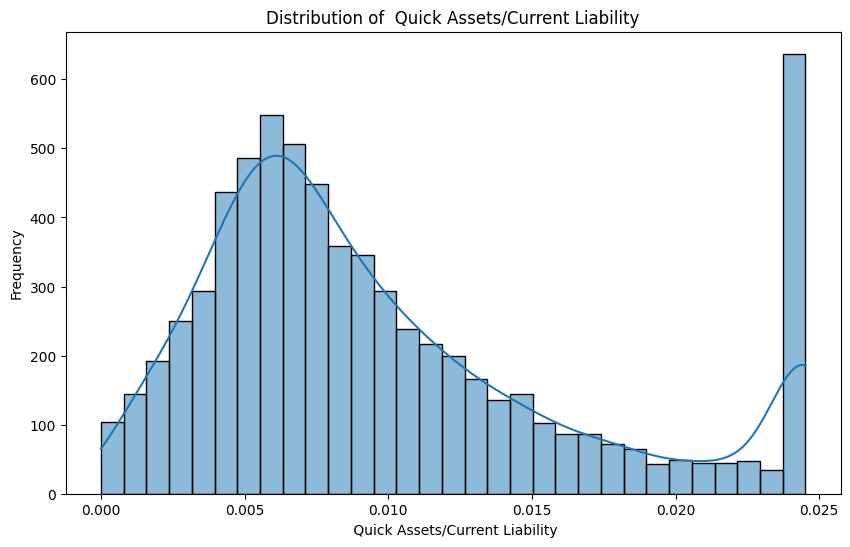

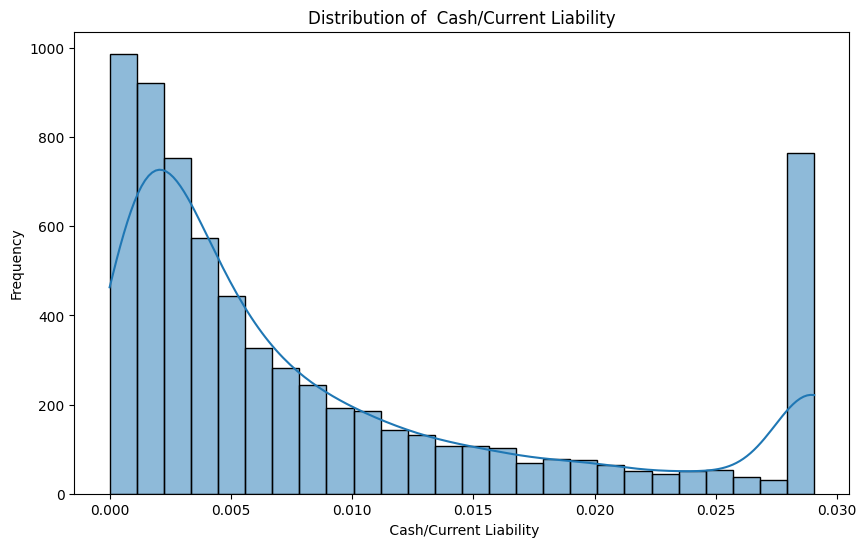

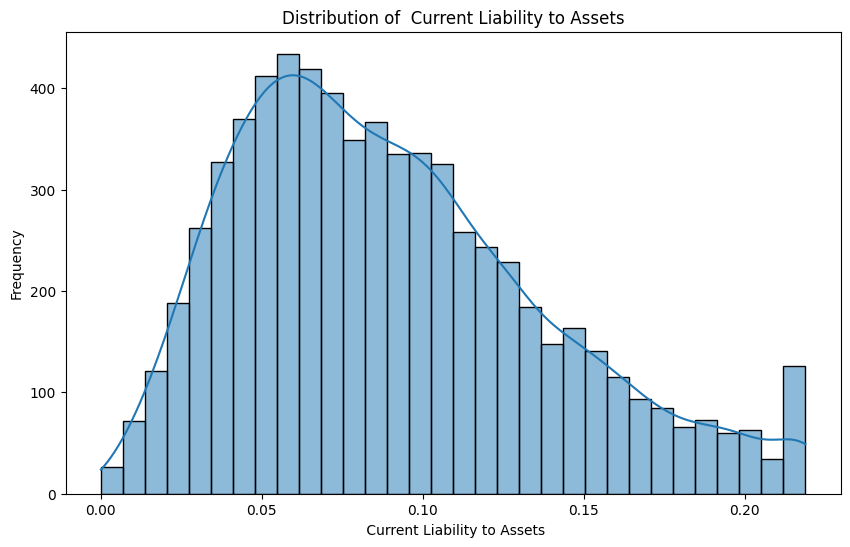

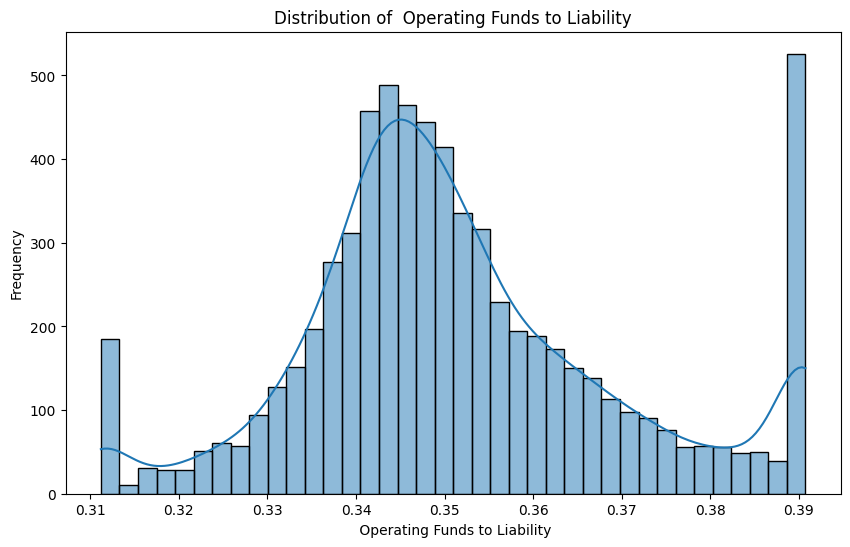

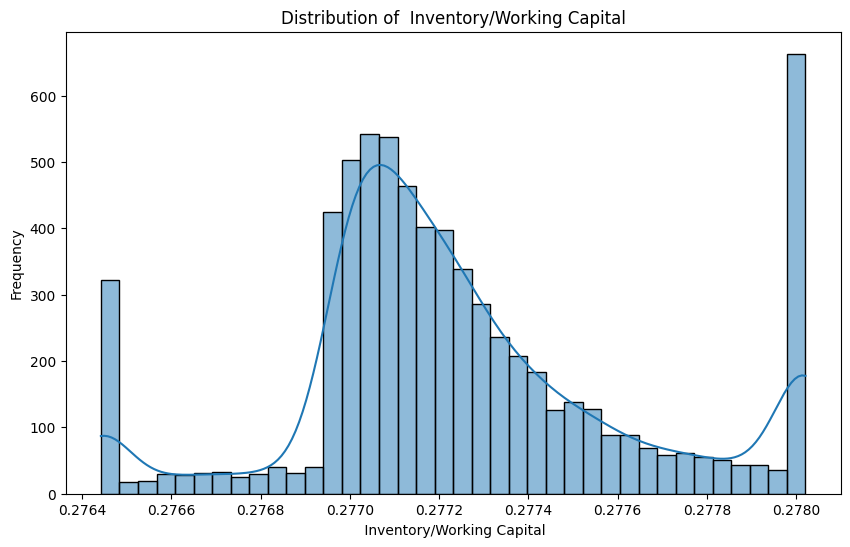

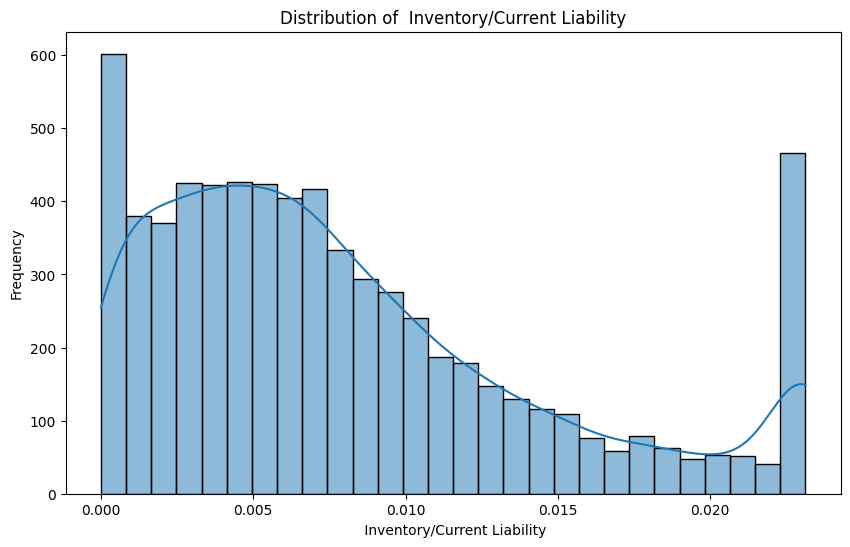

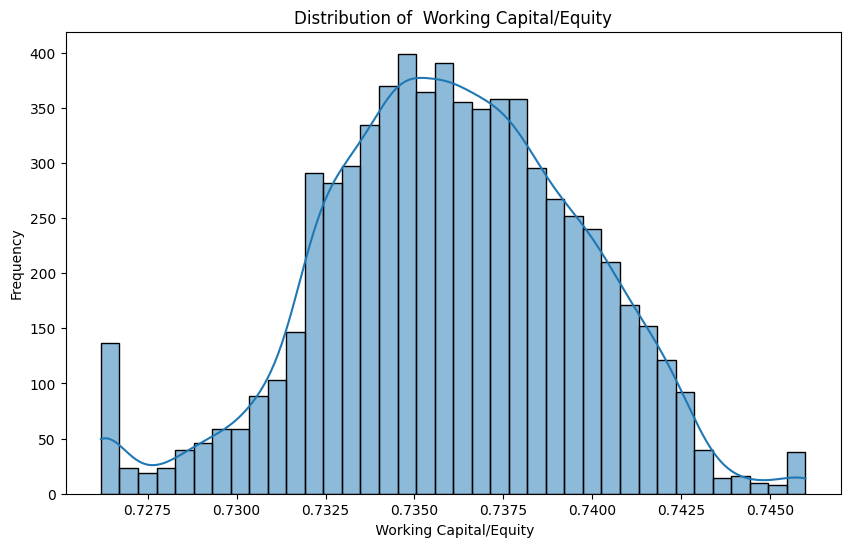

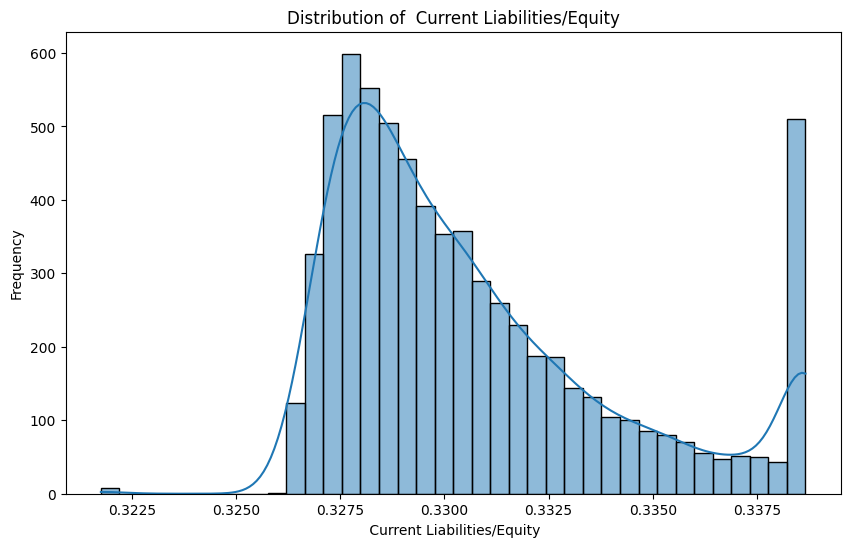

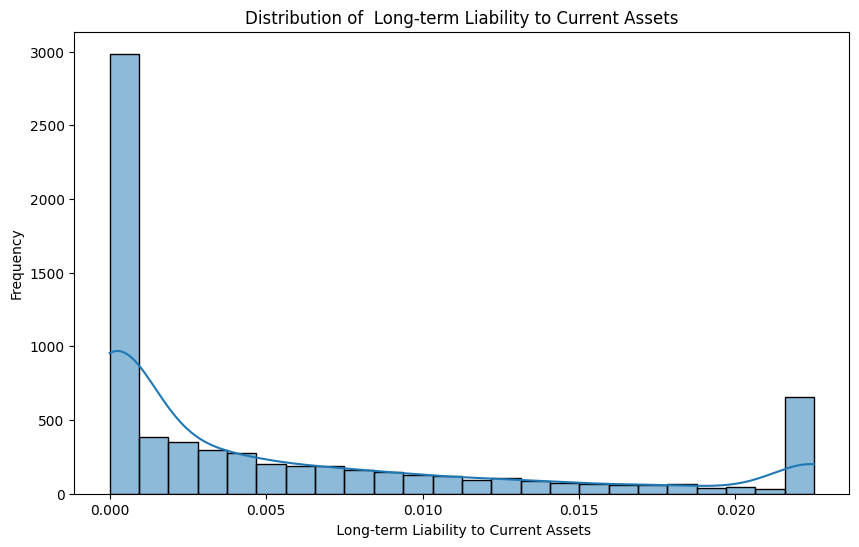

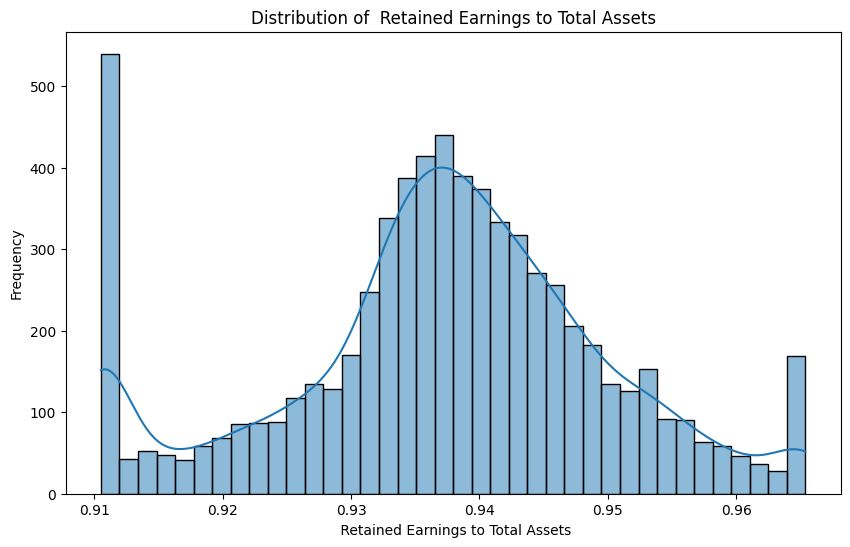

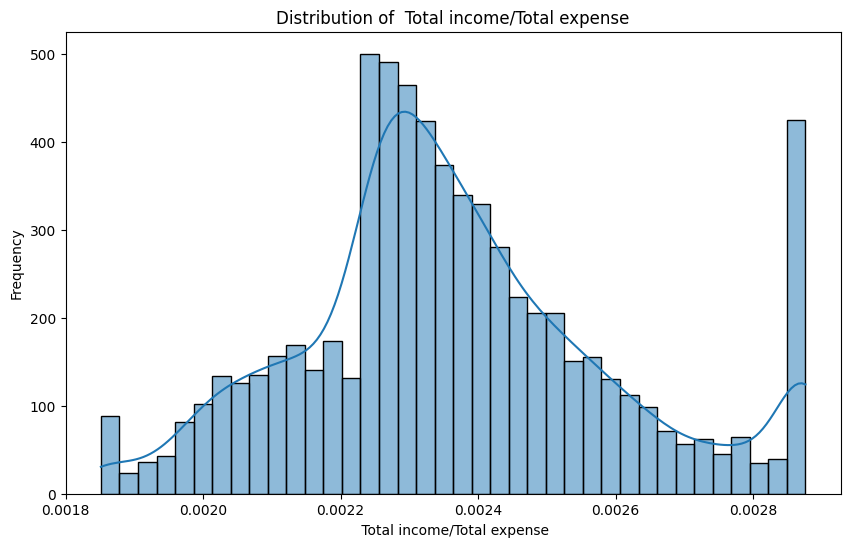

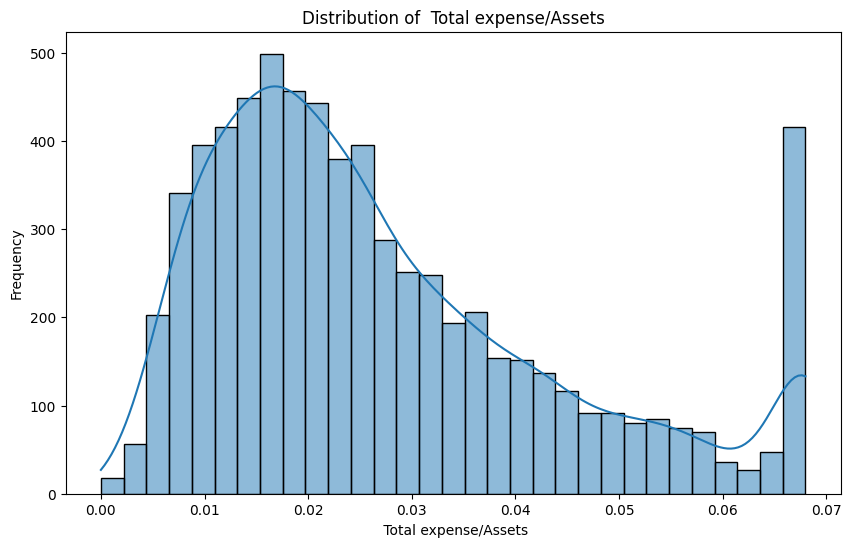

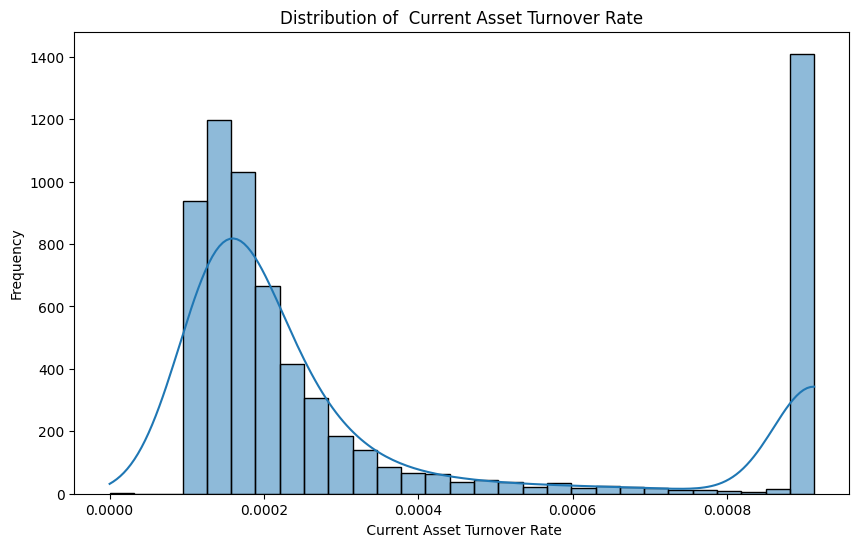

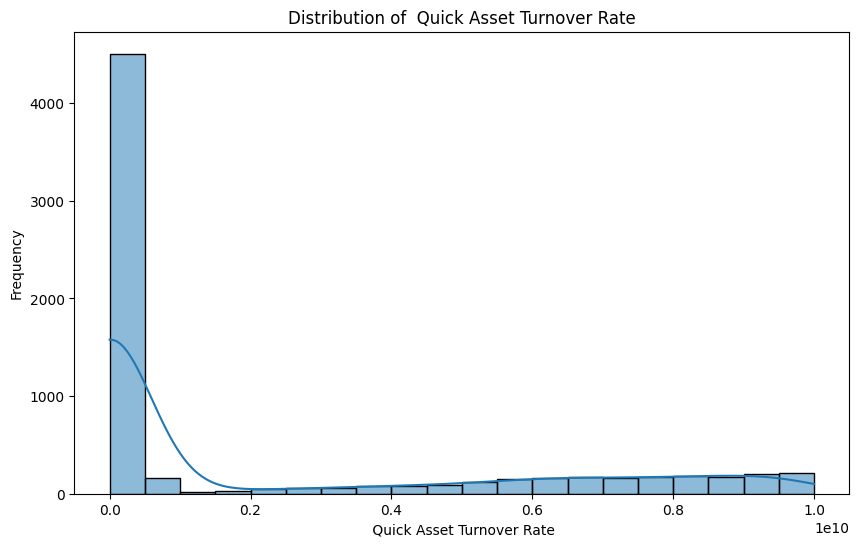

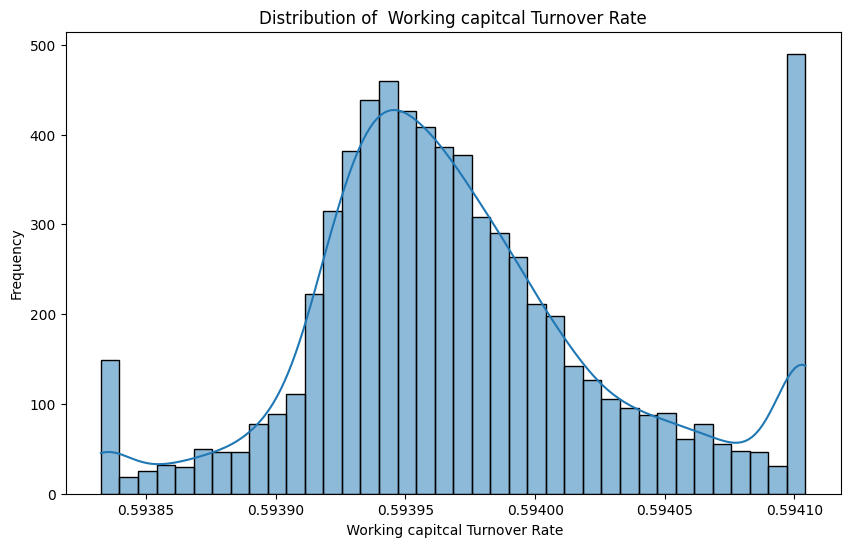

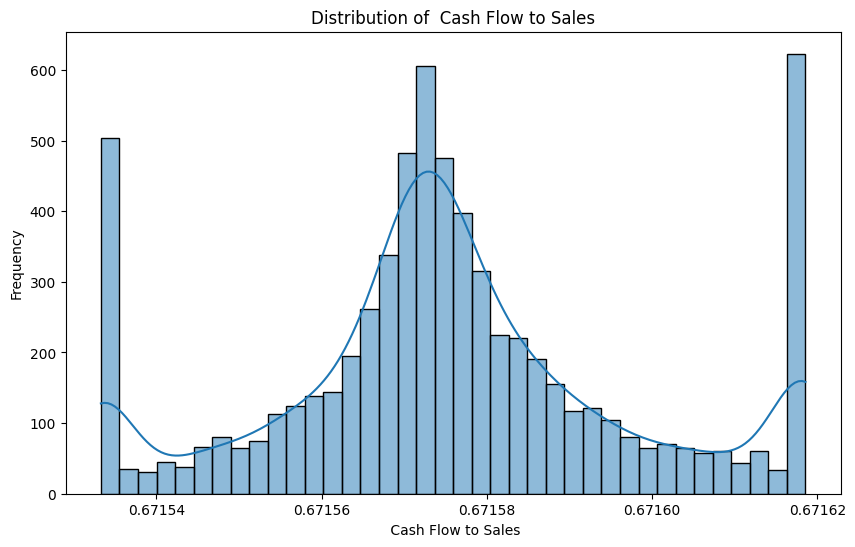

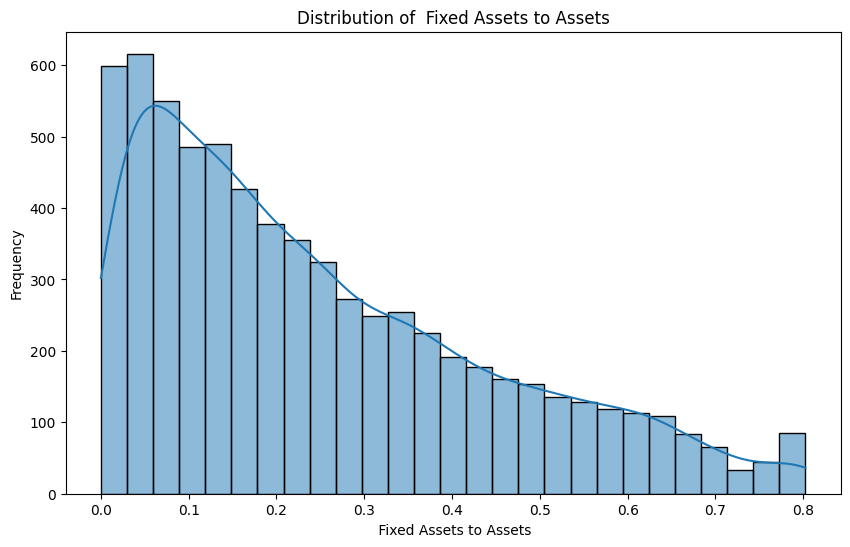

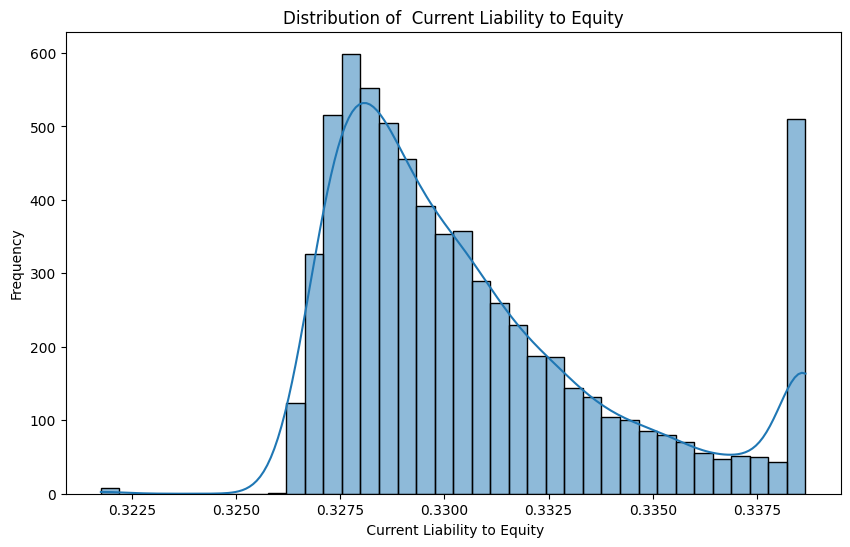

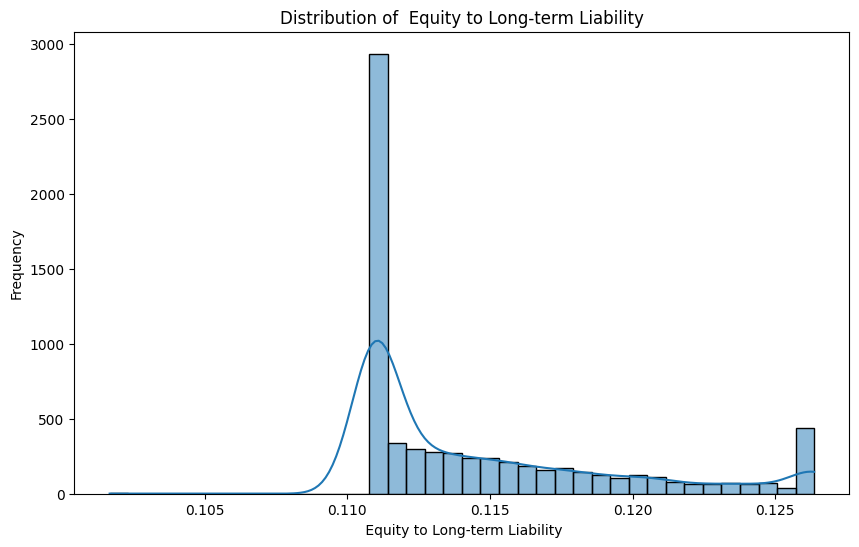

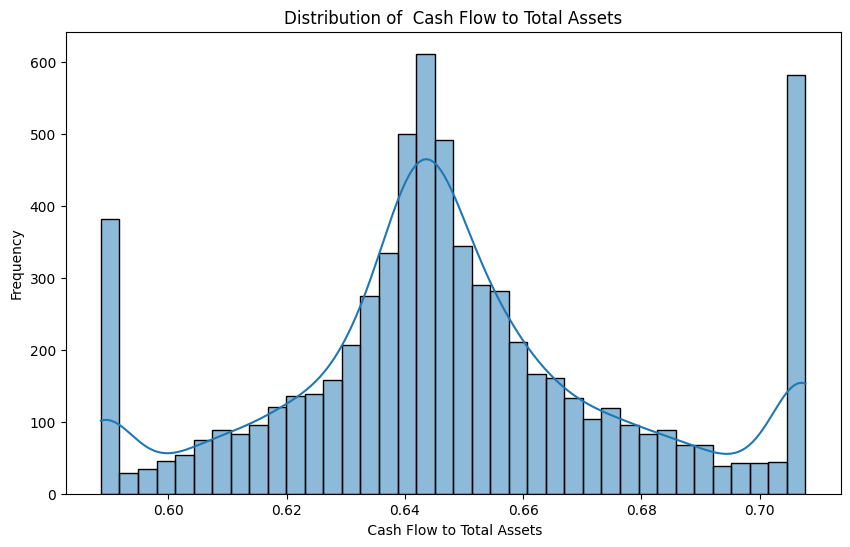

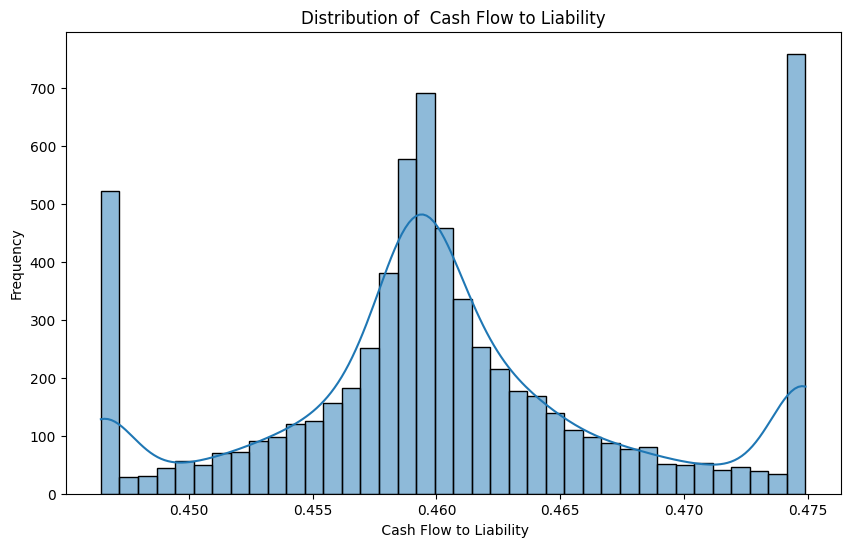

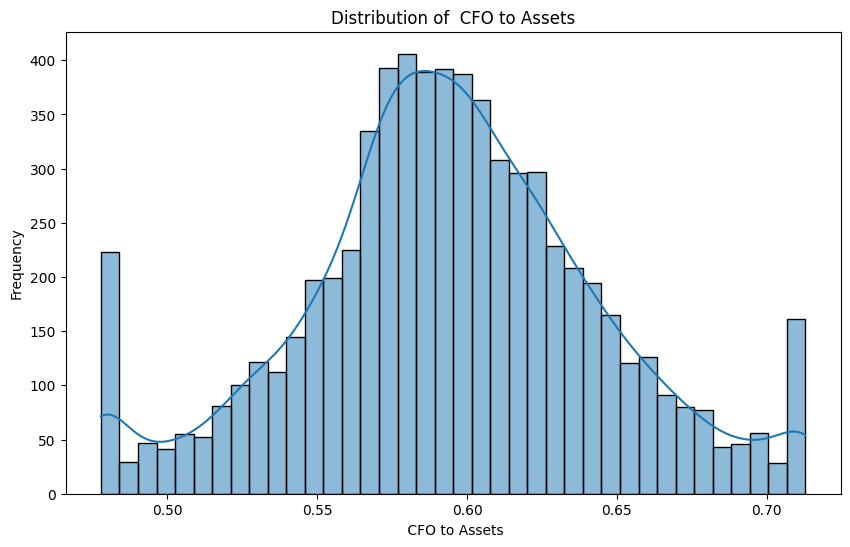

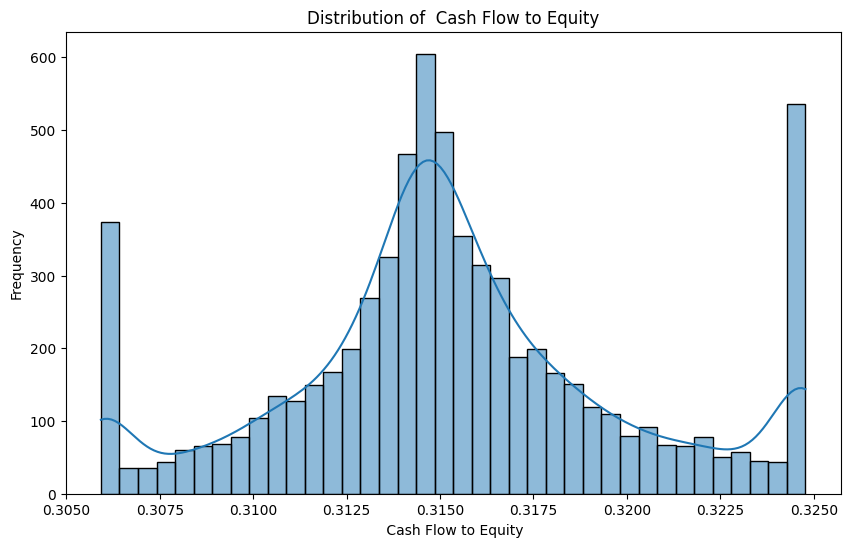

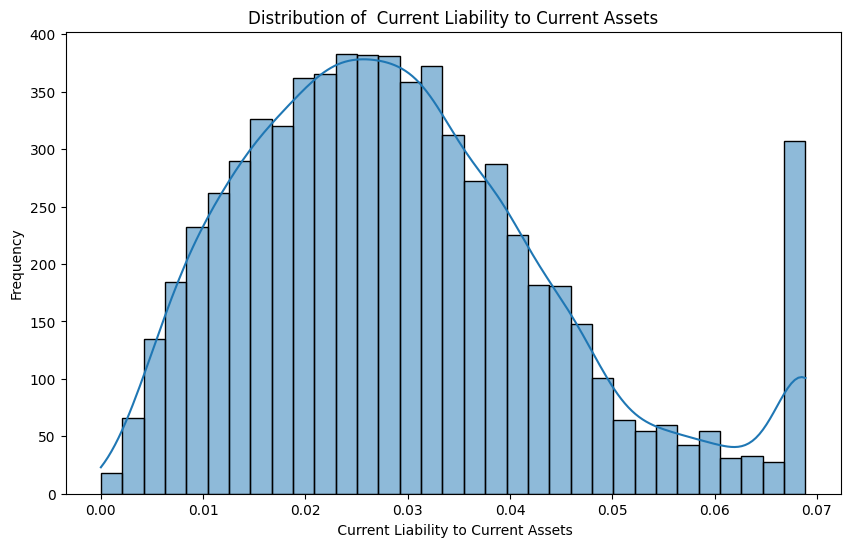

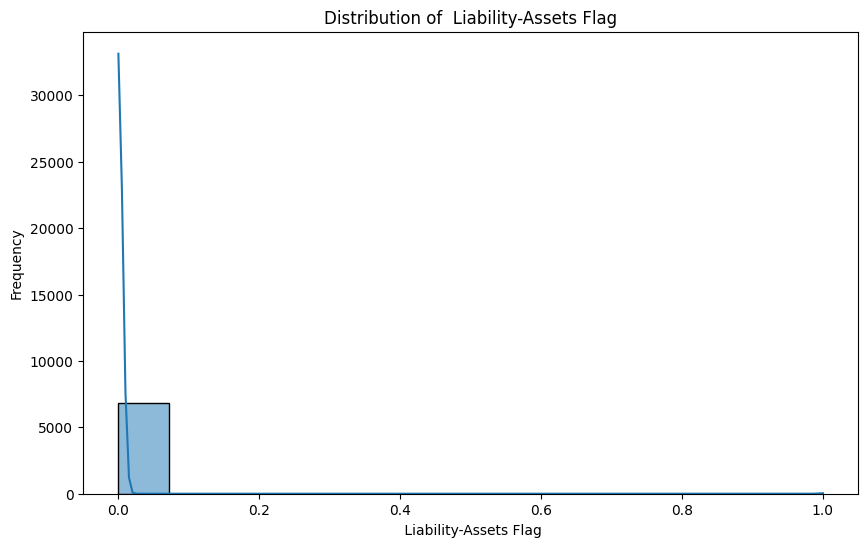

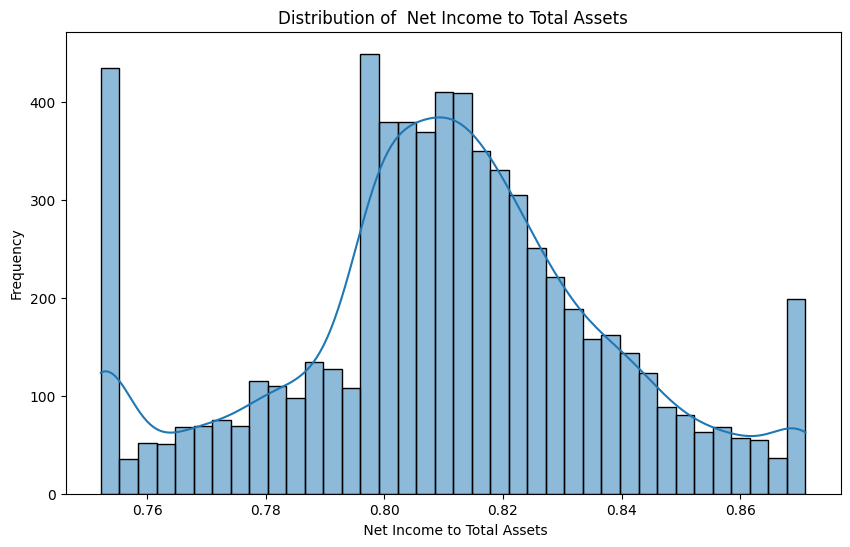

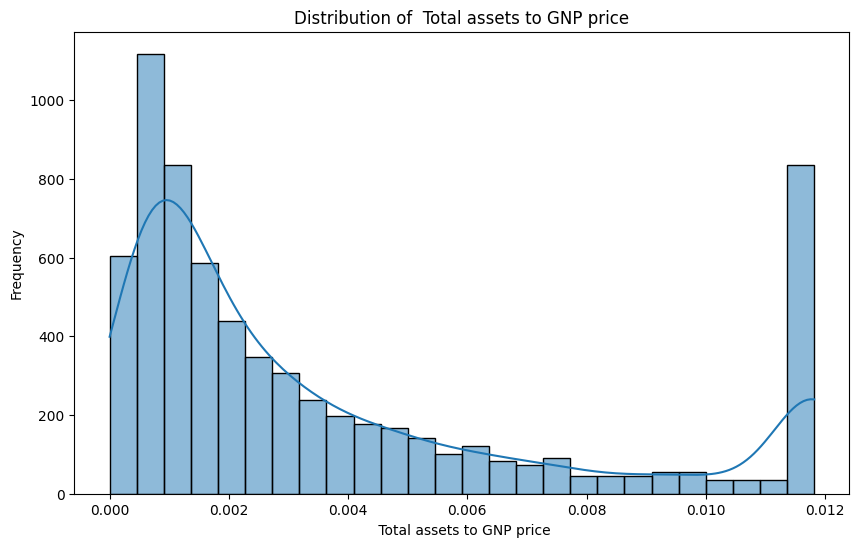

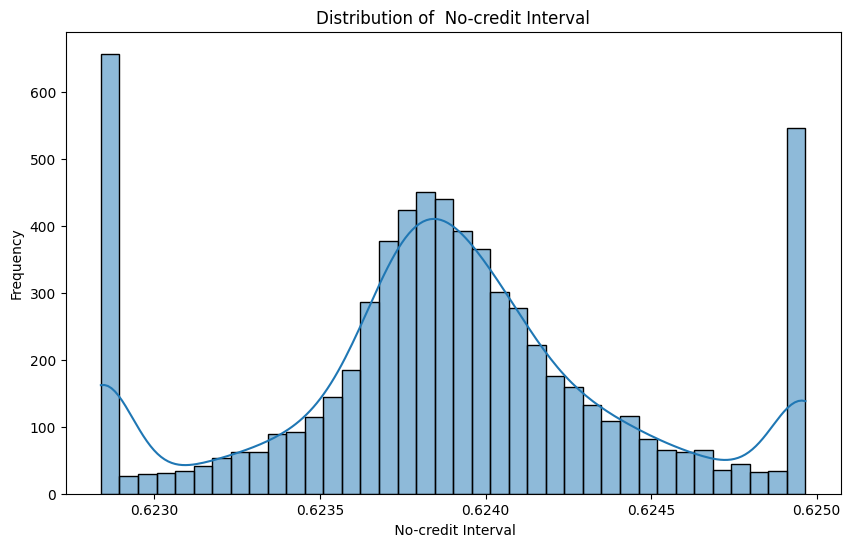

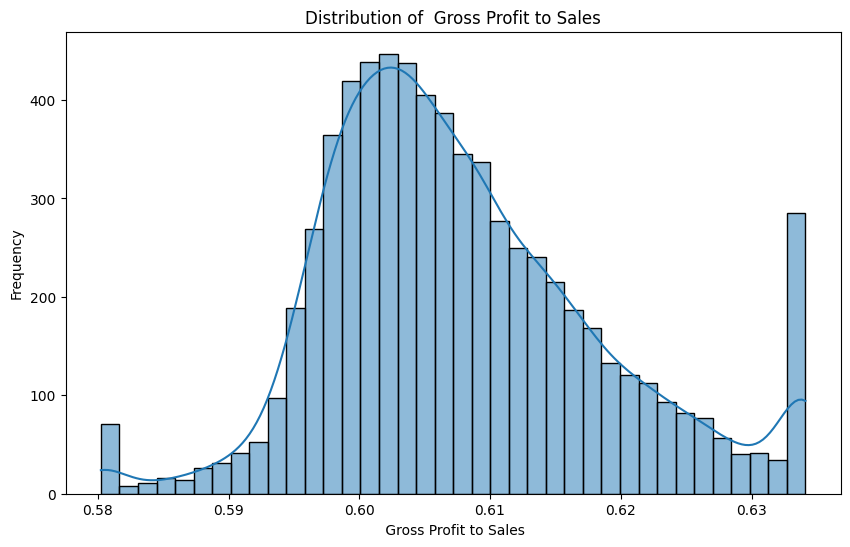

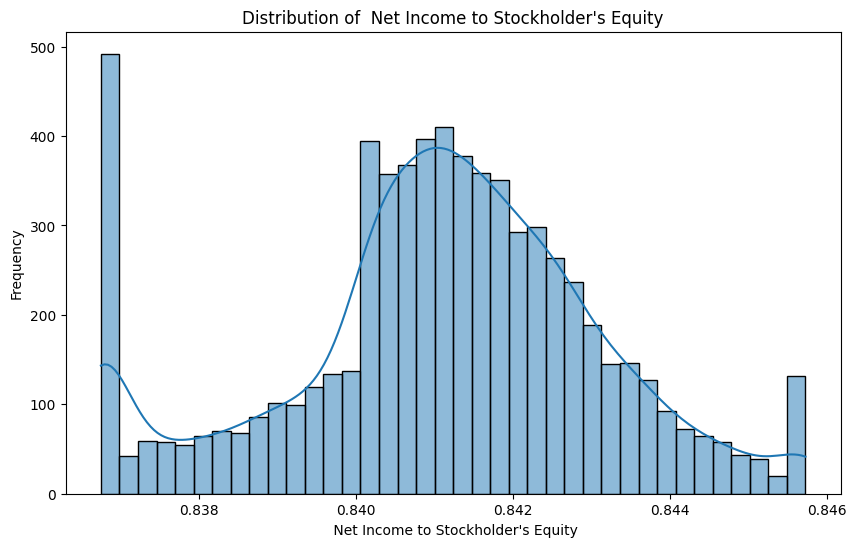

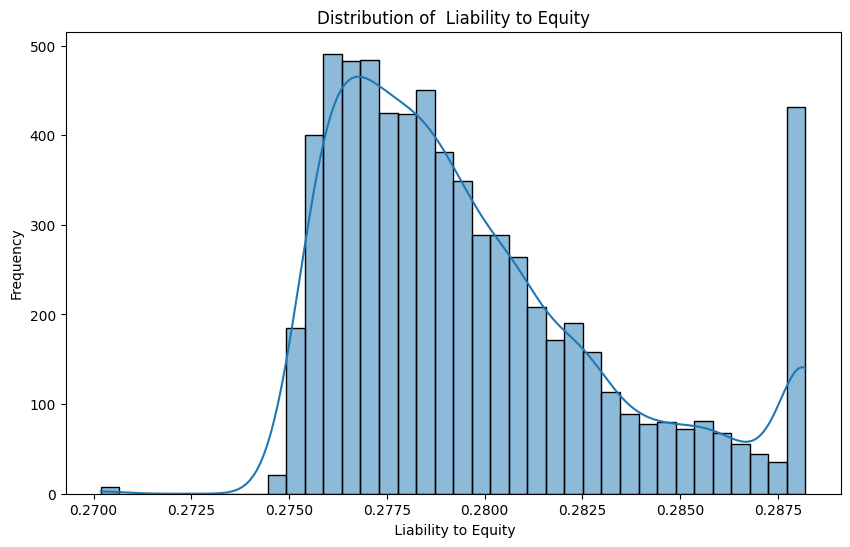

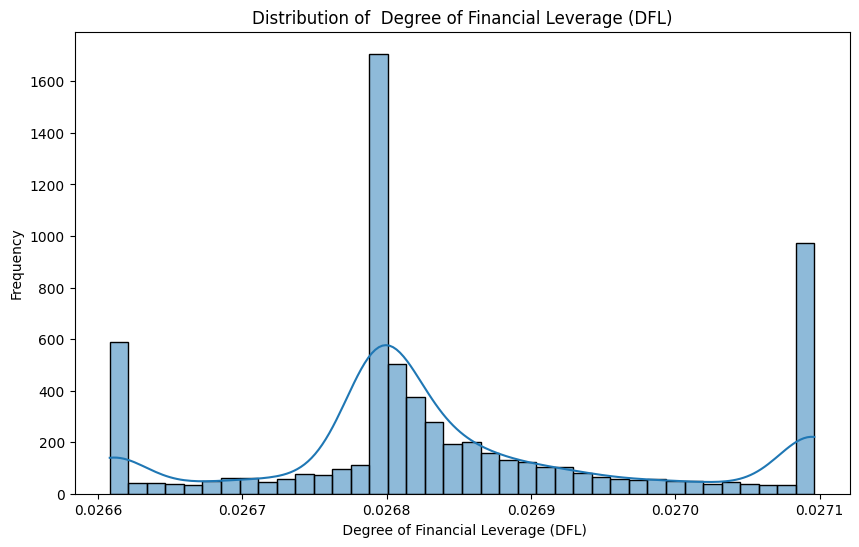

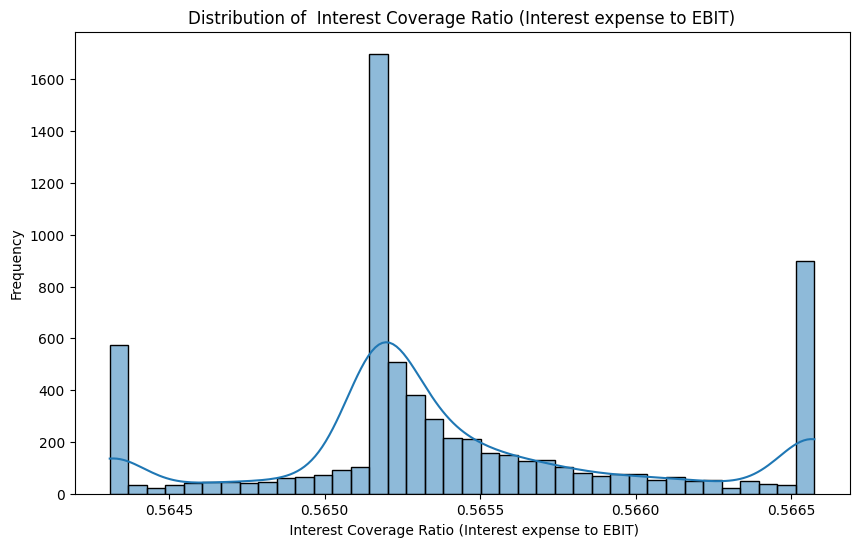

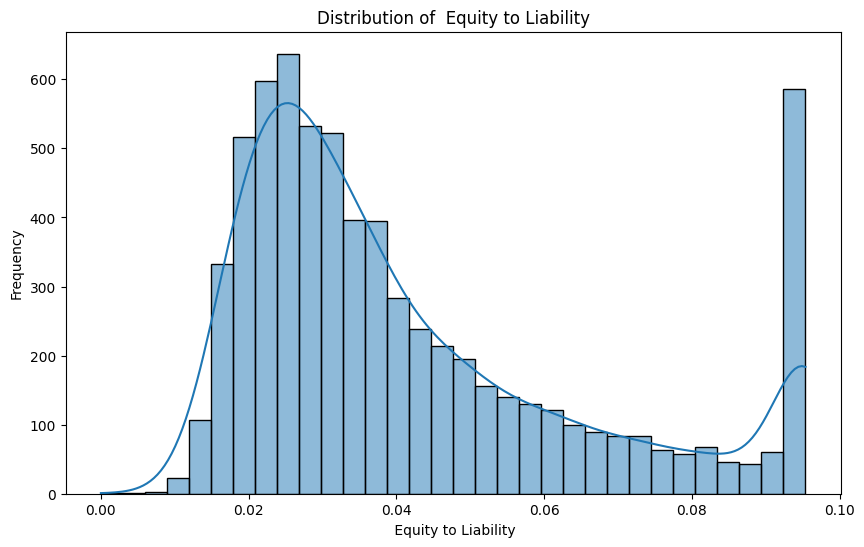

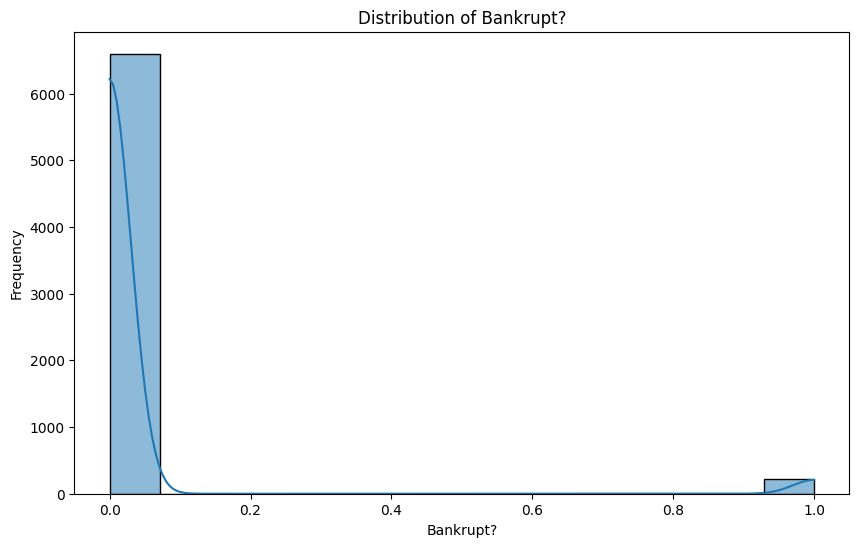

In [75]:
for col in columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [59]:
# Aboue graph we can see the distribution on all columns

In [49]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Dimensionality reduction
pca = PCA(n_components=10)
principal_components = pca.fit_transform(data.drop(['Bankrupt?'], axis=1))
data_pca = pd.DataFrame(data=principal_components)

# Feature selection
X = data.drop(['Bankrupt?'], axis=1)   # x our feature data
y = data['Bankrupt?']           # y is our target column [ Bankrupt? ]
model = LogisticRegression(max_iter=10000)
rfe = RFE(model)
fit = rfe.fit(X, y)
selected_features = X.columns[fit.support_]

print(f'Selected features: {selected_features}')

Selected features: Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Research and development expense rate', ' Cash flow rate',
       ' Cash Flow Per Share', ' Operating Profit Growth Rate',
       ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Cash Reinvestment %',
       ' Interest Expense Ratio', ' Net worth/Assets', ' Borrowing dependency',
       ' Inventory and accounts receivable/Net value',
       ' Operating profit per person', ' Working Capital to Total Assets',
       ' Quick Assets/Total Assets', ' Current Asset

In [66]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.25, random_state=42)
# Apply StandardScaler to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



 # our target column is imbalanced  This bias can lead to poor performance in predicting the minority class, which is often the class of interest.
 # to solve this problem we need to solve this issue using SMOTE


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Feature selection using RFE
num_features_to_select = 30  # select top 30 features
rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=num_features_to_select)
rfe.fit(X_train_resampled, y_train_resampled)   # fited the model

# Get selected feature indices
selected_indices = rfe.get_support(indices=True)

# Get the column names of the features
feature_names = X.columns

selected_feature_names = feature_names[selected_indices]   # List of best Features Selected Using RFE

# Model training
model.fit(X_train_resampled, y_train_resampled)

# Model evaluation
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy: 0.8697947214076246
Precision: 0.18702290076335878
Recall: 0.8448275862068966
F1 Score: 0.30625
ROC AUC Score: 0.8577507694240312


In [ ]:
# used logistic regression and we got accuracy of 86%
# Precision: 0.18702290076335878
# Recall: 0.8448275862068966
# F1 Score: 0.30625
# ROC AUC Score: 0.8577507694240312

In [67]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1434  213]
 [   9   49]]


In [56]:
# Confusion Matrix:
# [[1434  213]
#  [   9   49]]

#  TN (True Negative): Number of non-bankrupt companies correctly predicted as non-bankrupt. 1434
#  FP (False Positive): Number of non-bankrupt companies incorrectly predicted as bankrupt.  213
#  FN (False Negative): Number of bankrupt companies incorrectly predicted as non-bankrupt.   9
#  TP (True Positive): Number of bankrupt companies correctly predicted as bankrupt.          49




In [ ]:
"""
Key Insights:
Accuracy: The model achieves an accuracy of approximately 87%. While accuracy is important,
it might not be the most informative metric for imbalanced datasets where the minority class
(bankruptcy cases) is significantly underrepresented. However, it shows that the model is correctly
classifying a large portion of the dataset.

Precision: The precision for the minority class (bankruptcy) is quite low at around 18.7%. This means
that when the model predicts bankruptcy, it is correct only about 18.7% of the time. A low precision
indicates a high rate of false positives, which can be costly in financial risk management if resources
are misallocated due to false alarms.

Recall: The recall, or sensitivity, for the minority class is relatively higher at approximately 84.5%.
This indicates that the model is able to correctly identify about 84.5% of the actual bankruptcy cases.
A high recall is crucial in financial risk management to ensure that as many bankruptcies as possible are
correctly flagged to take appropriate actions.

F1 Score: The F1 score, which is the harmonic mean of precision and recall, is 0.306. This score balances
both precision and recall and provides a single metric to evaluate the model's performance on the minority
class. A higher F1 score indicates better performance in terms of both precision and recall.

ROC AUC Score: The ROC AUC score is 0.858, which measures the area under the Receiver Operating Characteristic
(ROC) curve. It provides an aggregate measure of performance across all possible classification thresholds.
A higher ROC AUC score generally indicates better discrimination between positive and negative classes.
"""

In [ ]:
"""
Implications for Financial Risk Management:

Early Warning System: The model's ability to achieve high recall (84.5%) suggests that it
can effectively identify companies at risk of bankruptcy. This is crucial for financial
institutions and investors who need early warning signs to mitigate financial losses and
manage portfolios more effectively.

False Positive Management: The low precision (18.7%) indicates a high rate of false alarms
(companies predicted as bankrupt but actually are not). This suggests the need for additional
strategies to verify and validate predictions before taking significant actions, such as divesting
or restructuring investments.

Model Refinement: Given the importance of precision in financial decision-making, further model
refinement is recommended. This may involve feature engineering to capture more relevant financial
 indicators, exploring different classification algorithms, or adjusting the decision threshold to
 optimize precision-recall trade-offs.

Portfolio Risk Assessment: Integrating such predictive models into portfolio risk assessment frameworks
can enhance risk management practices. By incorporating probabilistic bankruptcy predictions, financial
institutions can adjust portfolio allocations, monitor exposures more effectively, and implement timely
risk mitigation strategies.

Continuous Improvement: Financial risk management requires continuous model monitoring and refinement.
Regular updates to the model based on new data and market conditions can improve its predictive accuracy
and relevance in dynamic financial landscapes."""